In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import random
import seaborn as sns

In [39]:
sns.set()

In [40]:
data = pd.read_csv("data/datatraining.txt")

In [41]:
data.head()

date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1

In [42]:
data.drop(columns=['date'],inplace=True)

In [43]:
data.head()

Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy
1        23.18   27.2720  426.0  721.25       0.004793          1
2        23.15   27.2675  429.5  714.00       0.004783          1
3        23.15   27.2450  426.0  713.50       0.004779          1
4        23.15   27.2000  426.0  708.25       0.004772          1
5        23.10   27.2000  426.0  704.50       0.004757          1

In [44]:
data.iloc[:, :5]

Temperature  Humidity  Light         CO2  HumidityRatio
1           23.18   27.2720  426.0  721.250000       0.004793
2           23.15   27.2675  429.5  714.000000       0.004783
3           23.15   27.2450  426.0  713.500000       0.004779
4           23.15   27.2000  426.0  708.250000       0.004772
5           23.10   27.2000  426.0  704.500000       0.004757
...           ...       ...    ...         ...            ...
8139        21.05   36.0975  433.0  787.250000       0.005579
8140        21.05   35.9950  433.0  789.500000       0.005563
8141        21.10   36.0950  433.0  798.500000       0.005596
8142        21.10   36.2600  433.0  820.333333       0.005621
8143        21.10   36.2000  447.0  821.000000       0.005612

[8143 rows x 5 columns]

In [45]:
train, test = train_test_split(data, train_size=0.7, test_size=0.3)

In [46]:
bestAcc = 0
bestKern = ""
bestNu = 0
bestEpsilon = 0
iterations = 1000
kernList = ['linear', 'poly', 'rbf', 'sigmoid']

In [47]:
def fitness(k, n, e):
    classifier = SVC(kernel=k, C=n, gamma=e, max_iter= 1000, verbose=True)
    x_train = train.iloc[:, :5]
    y_train = train.iloc[:, 5]
    classifier.fit(x_train, y_train)
    print("Done")
    test1 = test.sample(random.randint(10, 20))
    x = test1.iloc[:, :5]
    y = test1.iloc[:, 5]
    pred_y = classifier.predict(x)
    acc = 0
    for i in range(len(pred_y)):
        if pred_y[i] == y.iloc[i]:
            acc += 1
    return acc/len(pred_y)*100

In [48]:
bests = []
accs = []
for i in range(10):
    temp = []
    bestAcc = 0
    bestKern = ""
    bestNu = 0
    bestEpsilon = 0
    for i in range(iterations):
        k = kernList[random.randint(0, 3)]
        n = random.random()
        e = random.random()
        acc = fitness(k, n, e)
        temp.append(acc)
        if acc > bestAcc:
            print("Accuracy Updated")
            bestKern = k
            bestNu = n
            bestEpsilon = e
            bestAcc = acc
    accs.append(temp)
    bests.append([bestKern, bestNu, bestEpsilon, bestAcc])

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1066.447157, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
Accuracy Updated
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -135.961654, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -709.614584, rho = 0.009045
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
Accuracy Updated
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.044320, rho = 521611.366215
nSV = 38, nBSV = 0
Total nSV = 38
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.519446, rho = -3.394210
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -541.683892, rho = -0.007541
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.047424, rho = 55593.287168
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.450113, rho = -17644271.350002
nSV = 35, nBSV = 0
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.709273
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -59.408251
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.656353, rho = 22.453664
nSV = 23, nBSV = 4
Total nSV = 23
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -644.531120, rho = 0.091830
nSV = 2000, nBSV = 1954
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.828661, rho = -5.670530
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.470868, rho = 0.196784
nSV = 38, nBSV = 15
Total nSV = 38
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1679.681784, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -64.566151
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.939036
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -706.761075
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -932.648574, rho = -0.017579
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -527.717166, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1387.096249, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.773346, rho = -5.150638
nSV = 32, nBSV = 14
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.613269, rho = -1.767807
nSV = 14, nBSV = 2
Total nSV = 14
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -344.796652, rho = -0.004021
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -425.435859, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.220351, rho = -2.117779
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.453980, rho = -9.162333
Done
nSV = 24, nBSV = 5
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.365872, rho = -1.292500
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1259.463191, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000008, rho = -0.348836
nSV = 74, nBSV = 0
Total nSV = 74
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1186.154274, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.753727, rho = -3.314088
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -783.438334, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -611.993062, rho = -0.006927
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.242266
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.039180
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.166095, rho = -1.191262
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1750.251801, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -159.212125, rho = 0.200454
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -192.318978, rho = -0.001830
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.514790, rho = -2.330539
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1439.400411, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 29.490820
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 10442.069605
Done
nSV = 46, nBSV = 0
Total nSV = 46
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1453.556680, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1764.028239, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1444.700736, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 6.744091
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.355855
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -747.599966, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -411.286503
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = 580.369598
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -210.118155, rho = -0.001183
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -905.910442, rho = 0.078350
nSV = 2000, nBSV = 1334
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -409.990871, rho = -0.005388
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.337760, rho = -2.046731
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -930.474088, rho = -0.017230
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -128.834523, rho = -0.000608
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.435215, rho = -4.275220
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -32.297815
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1140.416154, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1355.207754, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.551475, rho = -8.944235
Done
nSV = 21, nBSV = 6
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -190.609332, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.837782, rho = -3.304983
nSV = 37, nBSV = 13
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 191.947288
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1537.693120, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -671.140325, rho = 0.225554
nSV = 1873, nBSV = 1192
Total nSV = 1873
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -57.946766, rho = -0.000640
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000003, rho = -24054.187756
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -996.539520, rho = -0.001385
nSV = 2000, nBSV = 1894
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.059770, rho = -9.051796
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -646.628603, rho = 0.048585
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -625.502047, rho = 0.017683
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.038727, rho = -4.168502
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -444.890520, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.692906
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 310.294553
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -361.634156, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.128807, rho = -8.763970
nSV = 27, nBSV = 5
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.536044, rho = -4.341818
nSV = 14, nBSV = 2
Total nSV = 14
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.279594, rho = -0.315136
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -274.707529, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.003145, rho = -1188.144015
Done
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.831548, rho = -2.106362
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.794112, rho = -0.805678
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -820.396867, rho = -0.013722
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -5.604701, rho = -989192.534421
nSV = 36, nBSV = 0
Total nSV = 36
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -531.860293, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -920.496986, rho = 0.062288
nSV = 2000, nBSV = 1310
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 401.048191
nSV = 73, nBSV = 0
Total nSV = 73
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -98.855843, rho = -0.000920
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -904.756582, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -845.428824, rho = -0.014268
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -994.832682, rho = 0.000990
nSV = 2000, nBSV = 1876
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1277.360071, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -771.793285, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.904353, rho = -2.197573
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -28.282196
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 685.148932
nSV = 75, nBSV = 0
Total nSV = 75
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1953.892938, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -733.790567, rho = 0.192221
nSV = 1943, nBSV = 1366
Total nSV = 1943
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -756.002400, rho = 0.139065
nSV = 2000, nBSV = 1728
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8.319576
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.835239, rho = -3.108880
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.183057
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000003, rho = -736.125845
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7.054367
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -400.478327, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 23.161270
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -511.793872, rho = -0.005368
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -768.708807, rho = -0.009327
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -149.736835, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -378.303102, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.557554, rho = -0.805477
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -72.339829, rho = -0.000819
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1055.761627, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -754.419956, rho = -0.011746
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.001649, rho = -17126.081272
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.934417, rho = -3.929006
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.358089, rho = 289100.469334
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -15945.133691
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -969.509432, rho = -0.016607
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -81.537938, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -614.938366, rho = -0.006961
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.079143
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.218914
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.902390, rho = -0.778949
nSV = 26, nBSV = 4
Done
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 3213.615769
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -521.047617, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.339324, rho = -3.534957
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -255.569755, rho = -0.002892
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -16.808935
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -594.245201, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -515.467848, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -912.142519, rho = 0.007587
nSV = 2000, nBSV = 1962
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -540.276485, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -814.787784, rho = -0.006122
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -917.196949, rho = -0.012564
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -485.344297
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1895.963456, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 192.700110
nSV = 78, nBSV = 0
Total nSV = 78
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -892.753000, rho = 0.099359
nSV = 2000, nBSV = 1624
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.639653, rho = -3.872509
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.832905, rho = 22.592888
nSV = 33, nBSV = 4
Done
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -636.592303, rho = 0.235441
nSV = 1874, nBSV = 1249
Total nSV = 1874
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.135438, rho = -1.950837
nSV = 25, nBSV = 7
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1473.040269, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1054.948895, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -991.824429, rho = 0.005224
nSV = 2000, nBSV = 1834
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -126.682586
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.966529, rho = -1.451287
nSV = 14, nBSV = 2
Total nSV = 14
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -882.574087, rho = -0.015432
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -746.465991, rho = 0.046429
nSV = 2000, nBSV = 1990
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -508.762661, rho = 0.004839
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.451363, rho = -1.991132
nSV = 18, nBSV = 4
Total nSV = 18
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -947.749720, rho = -0.018542
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -360.573049, rho = -0.004658
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -907.119855, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -758.206254, rho = 0.005306
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1908.203380, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.962091, rho = -2.826919
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -574.696364, rho = 0.047486
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.706740, rho = -9.331779
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -981.108034, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.981147, rho = -3.759976
nSV = 20, nBSV = 4
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -51.194840, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -1089.616917
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -279.261277, rho = 0.262968
nSV = 1172, nBSV = 372
Total nSV = 1172
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -806.706514, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 34.158967
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1.952544
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.070703, rho = -8.757897
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -683.442859, rho = -0.010486
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.616126, rho = -9.174577
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.044765, rho = 6.716468
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 4.267329
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -708.036781, rho = -0.008702
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -778.958483, rho = 0.019434
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -888.069609, rho = 0.015325
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -156.306149, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.898371, rho = 22.912976
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -950.193580, rho = 0.012694
nSV = 2000, nBSV = 1918
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 41.169590
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -850.100648, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.024331, rho = -1.621181
nSV = 20, nBSV = 4
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -471.626843, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1539.241883, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -297.839474, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -37.814846, rho = -0.000145
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -280.922635, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -134.110782
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -479.738450, rho = -0.004495
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.302331, rho = -3.579886
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -858.659893, rho = 0.119538
nSV = 1992, nBSV = 1432
Total nSV = 1992
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.716799, rho = -4.610315
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -831.215584, rho = 0.115445
nSV = 2000, nBSV = 1732
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1974.616321, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -114.875959
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -898.844253, rho = -0.016885
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -8.024425
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -678.564895, rho = 0.186290
nSV = 1976, nBSV = 1560
Total nSV = 1976
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -905.340904, rho = -0.013642
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1082.499437, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1571.227160, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -446.424208, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1445.315328, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -604.720582, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -545.269282, rho = 0.209482
nSV = 1982, nBSV = 1659
Total nSV = 1982
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1165.526250, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1109.252896
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2803.509401
nSV = 36, nBSV = 0
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.855523, rho = -5.543534
nSV = 28, nBSV = 8
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -24.454445, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 249.009229
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -854.538569, rho = -0.014459
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -141.095953
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.603929, rho = -1.803667
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1064.749107, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1612.780953, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.927359, rho = -4.203237
nSV = 21, nBSV = 4
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.419792, rho = -0.739292
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1562.030149, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -235.487281
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.495910, rho = -2.536620
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.139748, rho = -0.549439
nSV = 21, nBSV = 2
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.283613, rho = -1.700664
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.197472, rho = -1.129853
nSV = 34, nBSV = 4
Total nSV = 34
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1979.167780, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -257.719692, rho = -0.003250
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 44.214816
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.007515, rho = -1852262.139182
nSV = 35, nBSV = 0
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -930.623758, rho = -0.014195
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.681727, rho = -3.255058
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -514.386749, rho = 0.029722
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -841.391093, rho = -0.010570
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000005, rho = -14.324382
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -634.885298, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -304.158555, rho = 0.259006
nSV = 1198, nBSV = 345
Total nSV = 1198
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -923.106538, rho = -0.015299
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -162.744762, rho = -0.001594
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.758422, rho = -4.983700
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -632.403988, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1112.729383
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.592989, rho = -0.966652
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -255.291565, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -384.644246, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -65.233364
nSV = 81, nBSV = 0
Total nSV = 81
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -429.954683, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -90.550903, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -300.636158, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.506156, rho = -4.325873
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -28.069041
nSV = 78, nBSV = 0
Total nSV = 78
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -906.044407, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -856.123109, rho = -0.014458
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1529.736466, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1.607131
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -734.104459, rho = 0.009474
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -864.007734, rho = -0.014786
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -145.635077, rho = -0.001589
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.791620, rho = -2.271374
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.394326, rho = -4.266445
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -833.072675, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.889056, rho = 21.416504
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -603.464793, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -502.839877
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.804032, rho = -0.527544
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1335.505354, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -23.552237, rho = -0.000203
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.015686, rho = -3.125222
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.603055
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -162.244806, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 24.705788
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 584.714343
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -871.494678, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -56.190287, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.750401
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -25.281514
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.004363, rho = -5.918536
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -55.368790, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.309478
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1325.399149, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -181.521432, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.321073, rho = 22.453567
nSV = 35, nBSV = 4
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.424437, rho = -1.133409
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.230713, rho = -4.930171
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.645034, rho = -8.986283
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -791.828625, rho = 0.009020
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -214.245175, rho = 0.287452
nSV = 1347, nBSV = 798
Total nSV = 1347
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.426371
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.710583, rho = -2.143957
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -305.142600, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -324.165191, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.344890, rho = 5.440995
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -217.132521, rho = 0.235405
nSV = 901, nBSV = 163
Total nSV = 901
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1897.461759, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1155.256392, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3731.708072
Done
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.674279, rho = 1.877022
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1894.254504, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -981.287336, rho = -0.015189
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.136540, rho = -9.461200
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -435.766775, rho = 0.139096
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1873.442318, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -0.000000, rho = -125.043168
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.338717, rho = -3.149291
nSV = 38, nBSV = 18
Total nSV = 38
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 9317.109494
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1180.070795, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.513549, rho = 22.138451
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -895.821016, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.835126, rho = -5.334258
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -872.584463, rho = 0.099968
nSV = 2000, nBSV = 1718
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.394695
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.260627, rho = -8.613875
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.353676
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -126.204335
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1815.590876, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -718.392811, rho = -0.010916
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -56.410836, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.365907, rho = -2.320401
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -10.173446
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -52.488022
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.394385, rho = -8.614178
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -990.930255, rho = -0.015650
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -34.450876
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -997.160341, rho = -0.013222
nSV = 2000, nBSV = 1982
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -826.759360, rho = 0.014663
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -969.903189, rho = -0.015360
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2598.980315
nSV = 39, nBSV = 0
Total nSV = 39
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1460.180867, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -253.381708, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1684.769136, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1973.272089, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 33.188998
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.647903, rho = -1.142214
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1950.862530, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -451.973087, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -894.068885, rho = 0.014334
nSV = 2000, nBSV = 1962
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -637.996865, rho = -0.008479
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -656.606441, rho = -0.009631
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -970.176535, rho = -0.015304
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 129.028290
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.021882, rho = 22.808008
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -777.105001, rho = 0.008978
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1570.951212, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -879.828314, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -188.244435, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 9.854569
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -582.080492
nSV = 73, nBSV = 0
Total nSV = 73
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -245.735310, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.078640, rho = -3.791549
nSV = 22, nBSV = 5
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000021, rho = -129052.920502
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.826905, rho = 4.700979
nSV = 31, nBSV = 5
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -24.406850
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -770.635725, rho = -0.012686
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -904.551264, rho = -0.014074
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -30.084992
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -304.727608, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 980.889885
nSV = 76, nBSV = 0
Total nSV = 76
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 10.659972
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.017200, rho = 22.334701
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -47.632931
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -715.562098, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.375073, rho = 19.514682
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -984.918764, rho = -0.016375
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 61.864987
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -876.025273, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -496.909284, rho = 0.196936
nSV = 2000, nBSV = 1800
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.597764, rho = 21.945553
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.161877, rho = -3.112292
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -437.261263, rho = 0.280238
nSV = 1803, nBSV = 1310
Total nSV = 1803
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.517565, rho = 22.143789
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1907.907416, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -121.679624, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.224659
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -991.076728, rho = -0.015493
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -853.430729, rho = -0.012402
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -29.610308
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.492192, rho = -5.490461
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1654.950743, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -20.453203
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.993132, rho = 2.302281
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -26632.673291
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -213.815493, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 103.519266
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10.231673
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.411541, rho = 22.465890
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -270.170948, rho = -0.002421
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -107.352243
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.143776, rho = -6.283799
nSV = 22, nBSV = 4
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.047043
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1023.371770, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -833.366672, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1571.686295, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1988.643524, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -132.332211, rho = 0.000966
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 268.527852
nSV = 76, nBSV = 0
Total nSV = 76
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.518227, rho = 20.542353
nSV = 27, nBSV = 4
Done
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -975.155985, rho = -0.017042
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.379303, rho = -0.675457
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -565.775301, rho = 0.005599
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -621.170431, rho = -0.007260
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -113.996097, rho = -0.000450
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.023349, rho = -5.148694
nSV = 32, nBSV = 7
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -663.120465, rho = -0.008178
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -612.646247, rho = 0.245963
nSV = 1760, nBSV = 963
Total nSV = 1760
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.768162, rho = 0.583492
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -968.160212, rho = 0.027936
nSV = 2000, nBSV = 1798
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1050.050970, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.154595, rho = 23.582839
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.073746, rho = 5.264219
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.434913, rho = -2.419842
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -871.024188, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -607.921297, rho = -0.007559
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1316.000674, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1165.547536, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.052499, rho = -9.077918
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -3.858399
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -826.177709, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.284212, rho = -1.700130
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.542897, rho = -5.745868
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1.064587
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -125.467825, rho = -0.001069
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1445.426786, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -4485.349435
nSV = 50, nBSV = 0
Total nSV = 50
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1063.542975, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -682.106269, rho = 0.214290
nSV = 1803, nBSV = 879
Total nSV = 1803
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -563.222512, rho = -0.006166
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -107.791016, rho = 0.009801
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 48.058849
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -197.601172
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -64.404961
nSV = 73, nBSV = 0
Total nSV = 73
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -94.799281
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -2.148083
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -723.057921, rho = 0.197876
nSV = 1851, nBSV = 961
Total nSV = 1851
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 120.502382
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000018, rho = 16589.959054
nSV = 45, nBSV = 0
Total nSV = 45
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -815.314858, rho = -0.009935
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1.670980
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.443897, rho = -2.390540
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.802307, rho = -0.529994
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -199.344303
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -122.470414, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -324.705622, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.279869, rho = 7.030618
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -944.505767, rho = -0.018193
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.770047, rho = -1.639761
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -74.972182
nSV = 78, nBSV = 0
Total nSV = 78
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -802.242965, rho = 0.010824
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 532.535269
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -99.598953, rho = 0.030919
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -338.905506, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.828900, rho = 20.440315
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -832.849761, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.705475, rho = -8.730561
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 4909.483678
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -238.217185, rho = 0.004586
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.766337, rho = -1.642719
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.859359, rho = -0.223908
nSV = 24, nBSV = 4
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.813934, rho = -3.151276
nSV = 26, nBSV = 5
Done
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 78.719740
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2118.182779
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -114.051820, rho = -0.001327
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.210610, rho = 22.587401
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -152.976431, rho = -0.001869
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -187.434749, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.973187
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -345.950193, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.869262, rho = -4.894591
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -966.792757, rho = -0.014726
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.111799, rho = 17.533244
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.858993, rho = 23.382828
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000009, rho = -515.760822
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.700804
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1802.982675, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -168.750022, rho = -0.001659
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1129.080722, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -386.162868, rho = -0.003519
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 145.982873
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.907493, rho = -10.884407
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -790.028953, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -300.100522, rho = -0.003051
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.475128, rho = -8.741800
Done
nSV = 11, nBSV = 2
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.608110, rho = -4.919047
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 111.359336
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.657705, rho = 2.702757
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -270.665043, rho = -0.002687
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.553631, rho = -4.350618
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.258702, rho = 6.967444
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -526.676411, rho = 0.177397
nSV = 2000, nBSV = 1818
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -570.173952, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000021, rho = 36607.468819
nSV = 36, nBSV = 0
Total nSV = 36
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -989.528510, rho = -0.018890
nSV = 2000, nBSV = 1990
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.195657, rho = -7.070697
nSV = 28, nBSV = 7
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.351600
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.645697, rho = -90.365869
nSV = 28, nBSV = 6
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1269.914784, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -30.887739
nSV = 82, nBSV = 0
Total nSV = 82
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.599592, rho = -8.495525
nSV = 19, nBSV = 6
Total nSV = 19
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.126982, rho = -2.293833
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -16.043039, rho = 0.002471
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -460.157225
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1254.535258, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1593.054734, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1867.498102, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -219.973382, rho = -0.001239
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.112864
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.708782, rho = 21.750409
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -480.734435, rho = -0.003271
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -567.322494, rho = -0.004708
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -641.650942, rho = -0.004155
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1258.797863, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -829.715031, rho = -0.006453
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -954.531943, rho = -0.015680
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -750.681382, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -124.680859
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 451.584436
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.218253, rho = -1.565165
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1816.534521, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -893.376585, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -469.011316, rho = -0.006494
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -784.616101, rho = -0.004366
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1182.600164, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -116.958143, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -436.551125
nSV = 53, nBSV = 0
Done
Total nSV = 53
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1015.438038, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.245327, rho = 2.296010
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 35.464955
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1292.924605, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1605.214569, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 84.589414
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -507.122350, rho = 0.079771
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.412279, rho = 18.571396
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.452365, rho = -0.252642
nSV = 20, nBSV = 6
Done
Total nSV = 20
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1703.949749, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -652.126620, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -481.402979, rho = -0.006605
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 90.620643
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -983.559015, rho = -0.014989
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -701.947290, rho = 0.077706
nSV = 2000, nBSV = 1944
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 875.810596
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.832229, rho = -3.353124
nSV = 34, nBSV = 14
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -227.674160, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.032384, rho = -1.403869
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -823.538695, rho = -0.010588
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -10826.517651, rho = -7619973362.997099
nSV = 28, nBSV = 0
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1851.238010, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.928572, rho = -1.128301
nSV = 35, nBSV = 4
Total nSV = 35
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -505.836316, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1665.867549, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1322.798072, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -698.199784, rho = 0.179552
nSV = 1980, nBSV = 1568
Total nSV = 1980
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.104863, rho = -2.249019
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 246.974680
nSV = 74, nBSV = 0
Total nSV = 74
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.251142, rho = -1.797694
nSV = 25, nBSV = 7
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1738.188231, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.233262, rho = -2.131021
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1949.236406, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1256.493756, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -162.959602, rho = 0.028634
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -96.196209
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.256996, rho = 24.235472
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -991.794612, rho = -0.012813
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 264.928503
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1626.255331, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -875.320056, rho = 0.111507
nSV = 1999, nBSV = 1565
Total nSV = 1999
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -332.498093, rho = -0.003906
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1990.486184, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.137281, rho = -10.316529
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.375096
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -835.082197, rho = -0.014060
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.919343
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -136.069214, rho = -0.001713
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -124.424747, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -308.580826, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.253773
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -954.990909, rho = 0.008976
nSV = 2000, nBSV = 1926
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -634.105034, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1824.261332, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -32.474705
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -40.760867
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.641977, rho = 2.647491
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -754.478190, rho = -0.012291
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -873.641323, rho = -0.006844
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -542.219175, rho = 0.000000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -638.224709, rho = -0.007264
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -971.663471, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -587.564728, rho = 0.107012
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -939.223355, rho = 0.061771
nSV = 2000, nBSV = 1652
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -585.784652, rho = 0.126132
nSV = 2000, nBSV = 1950
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -336.758637, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -523.599849, rho = 0.010382
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -407.977805, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -785.149950, rho = 0.090513
nSV = 2000, nBSV = 1856
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -906.359775, rho = 0.065481
nSV = 2000, nBSV = 1812
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -534.433510, rho = -0.003560
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.046395, rho = -9.389823
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.871184, rho = -1.560034
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -989.421225, rho = -0.014611
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -837.091730, rho = 0.078613
nSV = 2000, nBSV = 1840
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -255.769719, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -104.109633, rho = -0.001146
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 26.513107
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -317.472520, rho = 0.305181
nSV = 1716, nBSV = 1263
Total nSV = 1716
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1597.724816, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.562866
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -599.468690, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.756242, rho = -9.130327
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -976.345529, rho = 0.019405
nSV = 2000, nBSV = 1800
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.942716, rho = 1.968886
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -26.421081
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -214.464879, rho = -0.001673
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1346.105188, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -1.987631, rho = -1.475030
nSV = 24, nBSV = 5
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1585.500173, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.127890, rho = -2.001843
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.675098, rho = -0.584423
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -897.676095, rho = 0.082006
nSV = 2000, nBSV = 1760
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -578.236243, rho = -0.006245
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -1031.261043, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -774.980240, rho = -0.010028
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.000920, rho = 24.226400
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -834.645471, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -842.817738, rho = -0.009940
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.623817, rho = 21.568240
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.131914, rho = -8.963118
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -925.739024, rho = -0.014798
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.233414, rho = -3.667356
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1141.773396, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.668120, rho = -3.865156
nSV = 22, nBSV = 4
Done
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -67.026350, rho = -0.000265
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1825.661005, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.992915, rho = -8.824030
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1079.325605, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1794.966289, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -239.271816
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.124010, rho = 6.838510
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.284023, rho = -1.700298
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -373.680350, rho = -0.003845
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3700.047124
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1062.804521, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -647.333279, rho = 0.192118
nSV = 1708, nBSV = 494
Total nSV = 1708
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 55.624422
nSV = 78, nBSV = 0
Total nSV = 78
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -621.797387, rho = 0.075243
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -805.339204, rho = 0.147793
nSV = 1937, nBSV = 1057
Total nSV = 1937
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -624.902039, rho = 0.178498
nSV = 1994, nBSV = 1676
Total nSV = 1994
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -774.967641, rho = -0.012603
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -160.025040, rho = 0.269173
nSV = 1111, nBSV = 597
Total nSV = 1111
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -304.884905
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -682.585739, rho = -0.009195
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -914.397833
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -132.959672
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1711.091903, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.605769, rho = -9.074283
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 865.038550
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -426.114861, rho = 0.021066
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1025.765209, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -394.592842, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000135, rho = 112703.955014
nSV = 39, nBSV = 0
Total nSV = 39
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1646.796691, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -101.229225
nSV = 73, nBSV = 0
Total nSV = 73
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1729.628639, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 34.923199
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -672.673364, rho = -0.007263
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -88.734809, rho = -0.001019
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.979594, rho = -9.073847
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1.685096
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1878.429393, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 23.341373
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -575.254494, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -985.487255, rho = -0.014748
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -335.871242, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -217.644332, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -59.799709, rho = -0.000301
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -851.565364, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.930186, rho = -0.056565
nSV = 32, nBSV = 7
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1268.110239, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -372.818295, rho = 0.003448
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.303546, rho = -3.579000
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -15824.504913
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.654570, rho = -0.844713
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.754730, rho = -8.556505
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.170981, rho = -1.801254
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -1.871013, rho = -8.912219
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -323.690683, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -713.470640, rho = -0.008672
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -1148.606756, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -706.666793, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.548075, rho = 1.689500
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.702615, rho = 2.721690
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -564.953745, rho = -0.002375
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -646.742082, rho = 0.096392
nSV = 2000, nBSV = 1940
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -850.863467, rho = -0.011377
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2.433298
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 123.943369
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -547.078418, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -923.138200, rho = -0.012029
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 73.236670
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -728.296051, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 43.405526
nSV = 73, nBSV = 0
Total nSV = 73
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -17.361649
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.145085, rho = -6.249821
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1350.486062, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.339587, rho = -3.534723
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1314.968361, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -332.076159, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.129079, rho = -2.005764
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.139222, rho = -4.537034
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -217.104176, rho = -0.002229
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.677144, rho = 2.727072
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.250728, rho = -1.981687
Done
nSV = 30, nBSV = 4
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -71.701643
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -972.001518, rho = 0.017145
nSV = 2000, nBSV = 1850
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.220716, rho = -2.117491
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -521.924283, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -941.501973, rho = 0.059896
nSV = 2000, nBSV = 1644
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -21.861343
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -187.587397, rho = -0.001851
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.965084, rho = -2.206679
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -43.129454
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1231.101334, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -396.870273, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3009.296683
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1077.391072, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.347122, rho = 22.756120
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1332.317637, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.887984
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.343314, rho = -3.623908
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -724.673879, rho = -0.011259
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -296.978607, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.878671, rho = 22.043858
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.170967, rho = -1.368079
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1064.530614, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1185.605084, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -94.866068
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -685.848112, rho = 0.218579
nSV = 1892, nBSV = 1242
Total nSV = 1892
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000026, rho = -950329.402418
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 325.735578
nSV = 79, nBSV = 0
Total nSV = 79
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.946177, rho = -3.770634
nSV = 25, nBSV = 6
Done
Total nSV = 25
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -544.550092, rho = -0.000962
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -245.311921
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1197.825642, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -517.142978, rho = -0.005444
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1960.085250, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -916.860201, rho = -0.002415
nSV = 2000, nBSV = 1984
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -50.698621
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 12294.170322
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.955419
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1055.980526, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000015, rho = -17309.191293
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1877.643344, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -702.975992, rho = -0.008293
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1964.374429, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -864.249126, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -416.588677, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.592901, rho = -1.826935
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000009, rho = -1802.648991
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000013, rho = 31.456233
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.496558
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.623575, rho = 21.317473
nSV = 23, nBSV = 4
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.744766
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.737950, rho = -4.047345
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.296397, rho = -9.100620
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -500.263664, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -41.501257
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1114.819780, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -20.267624
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.578909, rho = -4.070817
nSV = 20, nBSV = 4
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -485.857528
nSV = 58, nBSV = 0
Done
Total nSV = 58
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -145047.355960
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -85.141475
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -385.361572, rho = 0.228698
nSV = 1292, nBSV = 212
Total nSV = 1292
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -702.745384, rho = -0.010672
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.942180, rho = -0.396974
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -308.102258
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -25.498071
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.258470, rho = 6.967281
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -480.646055, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.408775, rho = -2.189776
nSV = 30, nBSV = 7
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.195709, rho = -10.686015
nSV = 34, nBSV = 7
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -74.288436
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8119.729387
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -984.636826, rho = -0.013941
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.552838, rho = -4.351247
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.353231, rho = -7.788577
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.838000, rho = -5.426666
nSV = 31, nBSV = 8
Done
Total nSV = 31
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1798.589232, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1645.925098, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000021, rho = 42.601924
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1831.769006, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1.116012
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -136.475388, rho = 0.231310
nSV = 782, nBSV = 268
Total nSV = 782
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -461.465878, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.001446, rho = 331730.767639
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -954.535809, rho = 0.017937
nSV = 2000, nBSV = 1896
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1498.065913, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1363.975478, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000093, rho = 5869.025253
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.831649, rho = -5.491544
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -988.491139, rho = -0.016809
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.765401, rho = -6.282865
nSV = 29, nBSV = 8
Done
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -921.869507, rho = 0.050364
nSV = 2000, nBSV = 1848
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -872.559641, rho = -0.006665
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.924791, rho = -1.272609
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.350861, rho = -1.377009
nSV = 40, nBSV = 18
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -319.798013, rho = -0.003213
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.457001, rho = -1.948758
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 33.917614
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.092096, rho = 2.074184
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.754517, rho = -9.131319
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5345.581594
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 38.520382
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -259.197303, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.167869, rho = 0.216150
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.679960, rho = -4.347044
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -596.455548, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.732847, rho = -1.640140
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -618.667386, rho = 0.004927
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -629.598710, rho = 0.233720
nSV = 1747, nBSV = 840
Total nSV = 1747
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 220.717954
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.211305, rho = 22.591528
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.729691, rho = -3.290652
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -635.318090, rho = -0.009209
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.314878, rho = 5.400175
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1884.881082, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -25.664651
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -143.908321, rho = -0.001720
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = -14.564047
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -706.088614, rho = -0.008611
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.846180, rho = -4.227658
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1556.034919
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -807.778880, rho = 0.010746
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -133.103125, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -161.115918, rho = -0.001916
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -536.253506, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -78.649386, rho = -0.000763
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -616.739196, rho = 0.224397
nSV = 1692, nBSV = 689
Total nSV = 1692
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.590360, rho = 1.914452
nSV = 34, nBSV = 8
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -897.775954, rho = -0.011958
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -42.694778, rho = -0.000414
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -157.023752
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.856199, rho = -5.558352
nSV = 28, nBSV = 8
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -788.795117, rho = -0.009383
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.390062, rho = 21.200173
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000014, rho = 241.875195
nSV = 64, nBSV = 0
Done
Total nSV = 64
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.082963, rho = -2.219002
nSV = 34, nBSV = 7
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.658834, rho = -4.048035
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -882.019326, rho = 0.092966
nSV = 2000, nBSV = 1732
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1024.696628, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.726330, rho = -0.625528
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000015, rho = -2300.214115
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -391.240711, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 187.295174
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1731.001540, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -221.653273, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -209.239081, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000058, rho = -2039.444056
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.611118, rho = -9.472762
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1483.881946, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -211.200724, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -121.673912, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -113.646663, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.927909, rho = 25.075431
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 39.919162
nSV = 74, nBSV = 0
Total nSV = 74
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1274.488030, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1593.794426, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -263.550043, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.937550, rho = -0.330740
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -382.269515, rho = -0.005131
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 3232.328598
nSV = 36, nBSV = 0
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -105.003923
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -75.902833, rho = 186817.358141
nSV = 59, nBSV = 1
Done
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -192.006674, rho = 0.011147
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -598.850100, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -322.401251, rho = 0.005115
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -719.241449, rho = 0.021071
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 972.464627
nSV = 50, nBSV = 0
Total nSV = 50
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.775152, rho = -13048937.453704
nSV = 37, nBSV = 0
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.280416, rho = -4.340025
nSV = 19, nBSV = 4
Total nSV = 19
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -446.148850
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.764847, rho = -4.263721
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -202.521690, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.338857, rho = -9.123207
nSV = 17, nBSV = 4
Total nSV = 17
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -190.358547, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1018.395330, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -608.622176, rho = 0.032198
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10.338435
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 397.287032
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -44.233978
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -29.979752
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.052236, rho = -1.539881
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1004.364064, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -4.487516, rho = 22.697250
nSV = 33, nBSV = 4
Total nSV = 33
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 828.008662
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1779.720634, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -151.078273, rho = -0.001160
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1680.355764, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -959.935392, rho = -0.015059
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -406.048631, rho = -0.004259
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -618.315219, rho = -0.004388
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -263.870837, rho = -0.003034
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -949.484925, rho = -0.012836
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1661.058906, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000089, rho = -2111.480757
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1931.245672, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.687813, rho = -0.689147
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1241.070503, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -916.445580, rho = -0.011473
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.141411, rho = -10.873072
nSV = 47, nBSV = 20
Total nSV = 47
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -58.825297, rho = 0.000424
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -988.405322, rho = -0.014324
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1366.058724, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.755616, rho = -3.182868
nSV = 34, nBSV = 14
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1775.980290, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.149744, rho = -60.029583
nSV = 68, nBSV = 1
Total nSV = 68
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -1220.224535
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1354.431487, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -464.036355, rho = -0.004920
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -745.498186, rho = -0.004073
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -83.179448, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.364408, rho = 23.998372
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -464.612339, rho = -0.005197
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -792.673143, rho = 0.084267
nSV = 2000, nBSV = 1862
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.802570
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -623.024336, rho = 0.053303
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -411.441557, rho = -0.005414
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.826936, rho = -0.877036
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.658897, rho = 2.663189
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -47.670747
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -854.161902
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.218363, rho = -3.575009
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -290.750291
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -248.331076, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -449.308613, rho = -0.004542
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.589132, rho = -0.868181
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.423121
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.645805, rho = 5.064651
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.747227, rho = -0.091407
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.098032
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.795873, rho = 4.888014
nSV = 33, nBSV = 5
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -734.060376, rho = -0.011559
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -994.783496, rho = -0.017106
nSV = 2000, nBSV = 1994
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -774.829240, rho = -0.008685
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000007, rho = -54283.627139
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1790.427885, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.209333, rho = 22.589292
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1506.674210, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.958234
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1554.150399, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.689286, rho = -3.361112
nSV = 37, nBSV = 14
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000003, rho = 430.290619
nSV = 50, nBSV = 0
Total nSV = 50
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.719950, rho = 2.023792
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -484.283243, rho = -0.005839
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 10.013718
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.324234
nSV = 74, nBSV = 0
Total nSV = 74
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.031626, rho = -1.404473
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -664.849647, rho = -0.008839
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 823.284870
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.626793
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -88.584583
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.496542, rho = -5.483958
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.411885, rho = 22.499134
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -323.034228, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -197.635287, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -570.663568, rho = 0.007452
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.980953, rho = -4.805087
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -283.067709, rho = -0.003540
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -213.686535, rho = -0.002613
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -972.026385, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.696574
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -873.304646, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 134.528611
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -937.722009, rho = -0.015175
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 38.309937
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -981.814676, rho = -0.013845
nSV = 2000, nBSV = 1966
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 24.636620
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -267.087105, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1093.458558, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -665.257844, rho = 0.089483
nSV = 2000, nBSV = 1948
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 27.376561
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000007, rho = -11362.530678
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -71.303373
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.225494, rho = 2.337807
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -951.213063, rho = -0.018818
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.025436
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -150.922066, rho = -0.001784
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.096329, rho = -2.246990
nSV = 20, nBSV = 4
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.855017, rho = -9.037756
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -653.451284, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -833.716999, rho = 0.107459
nSV = 2000, nBSV = 1766
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -95.815059, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.497772, rho = -5.482335
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.841948
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -786.864578, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -963.859211, rho = -0.016956
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1061.770895, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 73.745594
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -30.066183, rho = -0.000175
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -228.493501
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -828.246762, rho = -0.010052
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
Accuracy Updated
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1056.655046, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -870.244952, rho = 0.042585
nSV = 2000, nBSV = 1912
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.402235, rho = -2.594936
nSV = 33, nBSV = 4
Total nSV = 33
Done
Accuracy Updated
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -278.430571, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1497.037144, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -487.821424, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 29.428703
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -552.444326, rho = -0.006101
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -110.844159, rho = -0.001055
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -28.109287
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -788.658863, rho = 0.172179
nSV = 1949, nBSV = 1274
Total nSV = 1949
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000025, rho = -5687.565453
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.644951
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.806992, rho = -5.402924
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.914505
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.850763, rho = -5.908192
nSV = 19, nBSV = 2
Total nSV = 19
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -792.189532, rho = 0.138199
nSV = 1996, nBSV = 1678
Total nSV = 1996
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1810.114608, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -609.629274, rho = -0.008786
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.779008, rho = -0.393269
nSV = 26, nBSV = 4
Done
Total nSV = 26
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -778.953272, rho = 0.008436
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.461691
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -505.991005, rho = -0.006209
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -175.421221, rho = 0.044842
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -26.756558
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.733093, rho = -2.892170
Done
nSV = 41, nBSV = 7
Total nSV = 41
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -229.920009, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -462.859683, rho = 0.035254
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.204067, rho = 18.831032
nSV = 22, nBSV = 4
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -24.179040
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.754872, rho = -2.790384
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -957.157782, rho = -0.013075
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -483.600168, rho = -0.005292
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -571.953004
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -6.065239
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -734.252969, rho = 0.180186
nSV = 1836, nBSV = 821
Total nSV = 1836
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -681.999332, rho = 0.219399
nSV = 1904, nBSV = 1279
Total nSV = 1904
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -11.150890, rho = 0.000086
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.371314, rho = -4.322938
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -337.351523, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.408429, rho = 21.648750
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.648746, rho = -5.072154
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -890.781021, rho = -0.010735
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -73.875799, rho = 0.008120
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1325.971600, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -981.363231, rho = 0.003752
nSV = 2000, nBSV = 1892
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -478.554714, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.332442, rho = -3.284695
nSV = 44, nBSV = 16
Done
Total nSV = 44
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.073657, rho = 6.768025
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 669.293455
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.984100, rho = -6.282024
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -817.446078, rho = -0.011958
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -408.355955, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -999.605558, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 495.927002
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.301347, rho = -2.122567
Done
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1262.941515, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1768.615083, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = 75.959121
nSV = 81, nBSV = 0
Total nSV = 81
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000007, rho = -25365.262345
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.550167, rho = 1.828829
nSV = 24, nBSV = 4
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2.450051
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -745.706462, rho = 0.188187
nSV = 1875, nBSV = 998
Total nSV = 1875
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.562265, rho = -6.328774
nSV = 39, nBSV = 13
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -78.617073
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -741.153671, rho = -0.012098
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.645586, rho = -90.366003
nSV = 28, nBSV = 6
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.115335, rho = 6.854658
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.096996, rho = -26088.753041
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -614.003701, rho = 0.222957
nSV = 1684, nBSV = 668
Done
Total nSV = 1684
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1705.087633, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -277.533439, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -26.724935
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -749.373262, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -252.061151, rho = -0.002983
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -983.965992, rho = 0.015254
nSV = 2000, nBSV = 1734
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1367.032246, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.500093, rho = -6.212479
Done
nSV = 37, nBSV = 14
Total nSV = 37
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -895.256676, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -528.033140, rho = 0.081725
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -8774.176231
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.615521, rho = -9.101680
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.399043, rho = -52629766.383684
nSV = 33, nBSV = 0
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -930.295537, rho = -0.015085
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -222.998464
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -77.960384, rho = -0.000296
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1120.701587, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -683.634043, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.845690, rho = 1.428282
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -1413.724334, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -564.732612
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.458200, rho = -2.585809
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.489636
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.704771, rho = -5.139547
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -627.988973, rho = 0.034812
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -64.023941, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -880.096816, rho = -0.007476
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.806569, rho = -16.226107
nSV = 186, nBSV = 121
Total nSV = 186
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -254.112833, rho = -0.002158
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -666.569156, rho = 0.028741
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6832.283657
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -673.760936, rho = 0.225138
nSV = 1872, nBSV = 1188
Total nSV = 1872
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.578733
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.236711, rho = -9.416941
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -753.587420, rho = -0.010430
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1479.601018, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.430667, rho = -2.496530
nSV = 27, nBSV = 4
Done
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -24890.852764
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 197.034343
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.487220, rho = -0.870386
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -866.187447, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -587.744829, rho = -0.008544
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.911706, rho = -3.366650
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000070, rho = 1555.223333
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -869.900060, rho = -0.011276
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -214.894342, rho = -0.002599
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -362.288078, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -315.606764, rho = 0.007019
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.205813, rho = -3.047182
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -401.793565, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 29.918729
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -94.869918
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.664811, rho = -9.010188
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.010906, rho = -1038076.168747
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -781.980084, rho = 0.052602
nSV = 2000, nBSV = 1944
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2244.921188
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000003, rho = 598.801608
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1465.881757, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -5.773146, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -474.090209, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.032058, rho = 2.026716
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1956.031716, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -758.656098, rho = -0.012102
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.419619, rho = 22.436361
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 181.247013
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1581.590587, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.260300, rho = -8.676909
nSV = 27, nBSV = 5
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -256.298667, rho = 0.013813
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -903.863195, rho = -0.016778
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1389.354264, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.820183, rho = -2.762471
nSV = 30, nBSV = 8
Total nSV = 30
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -980.807797, rho = -0.017430
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.780760, rho = -4.098076
nSV = 20, nBSV = 6
Total nSV = 20
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -415.106445
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.018404, rho = -9.036806
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -266.907744, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -71.604157, rho = 0.012288
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.675335
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -210.576364, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -4.008007, rho = 2.094992
nSV = 31, nBSV = 4
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -39.982690, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -797.714843, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -567.482811, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.360538, rho = -8.815442
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.169473, rho = 2.193559
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.247608, rho = -4.055668
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -784.102455, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.864794, rho = 22.760067
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.763877, rho = -0.007587
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.581834, rho = -9.016107
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1630.955314
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -128.605754, rho = 0.011841
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -75.140493
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -186.428843
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1572.054025, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 25.679001
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -871.938403, rho = -0.012696
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1476.264060, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.830942, rho = -3.881181
nSV = 24, nBSV = 5
Total nSV = 24


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1864.213395, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.668758, rho = -4.260149
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -0.000000, rho = 25.900636
nSV = 44, nBSV = 0
Total nSV = 44
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -287.950610
nSV = 74, nBSV = 0
Total nSV = 74
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 873.340353
Done
nSV = 50, nBSV = 0
Total nSV = 50
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -660.536742, rho = 0.005773
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -593.000252, rho = -0.008690
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.168400, rho = -3.691236
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -724.249485, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -1.117288, rho = -5.101267
nSV = 33, nBSV = 7
Total nSV = 33
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.627840
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -675.782947, rho = -0.009173
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -896.560714, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -37.335146, rho = -0.000290
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.902867
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -834.862428, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000503, rho = 5826.403287
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.847753, rho = -4.226539
nSV = 23, nBSV = 6
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -923.501232
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -902.315352, rho = 0.078659
nSV = 2000, nBSV = 1762
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 25.859588
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.274558, rho = -4.301512
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1542.784885, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = -612.141350
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -876.140927, rho = -0.015118
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -949.595524, rho = -0.013627
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -16.116162
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.561751, rho = -0.165654
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1889.997166, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.583050, rho = -4.123978
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -14.848379
nSV = 76, nBSV = 0
Total nSV = 76
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.233853, rho = -4.132799
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -773.127505, rho = -0.011388
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.478711, rho = 22.608253
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -922.434251, rho = -0.004538
nSV = 2000, nBSV = 1982
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.773033, rho = -4.021093
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.377669, rho = -9.321504
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.501027, rho = -2.465471
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1569.229126, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.002280, rho = -1556.080742
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -895.958957, rho = -0.015114
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -170.932279, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1890.955038, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.831054, rho = -8.483684
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.698531, rho = -3.702489
nSV = 77, nBSV = 42
Total nSV = 77
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -692.516317, rho = 0.007332
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -991.710951, rho = -0.017122
nSV = 2000, nBSV = 1996
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.977778, rho = -10.831924
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -39.682100
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -896.076927, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.093388, rho = -4.715277
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -620.227551, rho = -0.008881
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -991.234927, rho = 0.005356
nSV = 2000, nBSV = 1832
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -805.245334, rho = 0.023601
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.339046
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -388.107942, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -968.362621, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -11.096755
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -725.783589, rho = -0.006668
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -924.718650, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -892.100461, rho = -0.010563
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1893.020658, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.460431, rho = -5.630689
nSV = 25, nBSV = 4
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -592.919680, rho = -0.000952
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -277.139734, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -223.123511
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1336.464191, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -478.967218, rho = 0.052411
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -805.503517, rho = -0.009879
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -962.635762, rho = -0.014960
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -803.676434, rho = -0.011554
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -693.279619, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1.742563
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -31.707883
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -774.093424, rho = 0.180415
nSV = 1933, nBSV = 1236
Total nSV = 1933
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1660.075571, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -95.060400
nSV = 73, nBSV = 0
Total nSV = 73
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -72.575440
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Done
obj = -1425.115052, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -669.542143, rho = 0.210872
nSV = 1762, nBSV = 780
Total nSV = 1762
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -40.875147
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -228.244031, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -937.022716, rho = -0.015196
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -115.026670, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1061.384452, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 339.505548
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 17.655496
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.031562, rho = -8.442558
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -430.588564, rho = -0.005758
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -27.478535, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 528.464232
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 37.306153
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -325.455003, rho = -0.004196
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -154.324798, rho = -0.001864
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -768.182142, rho = -0.012404
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1158.731564, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1186.779184, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1094.045605, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1804.881553, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.512207, rho = -2.397608
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -363.025782, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -980.881789, rho = -0.015185
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -186.852796, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.010293, rho = -10.382044
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -833.520297, rho = -0.012228
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 410.169703
nSV = 63, nBSV = 0
Done
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -509.023735, rho = 0.276545
nSV = 1728, nBSV = 1048
Total nSV = 1728
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -28.965712
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -942.126626, rho = -0.018117
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.232459, rho = 6.912998
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.682526, rho = 1.889670
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1552.395355, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -984.912865, rho = 0.011902
nSV = 2000, nBSV = 1552
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -415.516682, rho = 0.220869
nSV = 1334, nBSV = 197
Total nSV = 1334
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -990.387062, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1130.957427, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -422.398121, rho = 0.018756
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -655.567382, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -43.781617
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.543549, rho = 23.047804
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -564.610982, rho = 0.213827
nSV = 1592, nBSV = 453
Total nSV = 1592
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -487.930591, rho = 0.006311
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -893.715216, rho = -0.012695
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -886.153738, rho = -0.002347
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 35.430793
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -978.956088, rho = -0.020931
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -11.360764, rho = 0.000796
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -731.198800, rho = 0.010448
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.603879, rho = -7.095216
nSV = 38, nBSV = 16
Total nSV = 38
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -156.114451
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -546.645381, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1156.461589, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 24.181925
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1008.819627, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -4.028270, rho = -2.136946
nSV = 23, nBSV = 4
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -658.077615, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.673897, rho = 1.876472
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -17.754342
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -51.474479
nSV = 71, nBSV = 0
Done
Total nSV = 71
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -991.470345, rho = 0.001469
nSV = 2000, nBSV = 1878
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.797720
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1425.444386, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1417.314417, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.680026
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.741343, rho = 21.369853
nSV = 29, nBSV = 4
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -142.597283, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -641.350304, rho = -0.008211
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.382323, rho = -1.258215
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -431.447922, rho = 0.004334
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -4.593026, rho = -1.206305
nSV = 34, nBSV = 4
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1763.167404, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -0.000000, rho = -27.206057
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -430.931582, rho = -0.003811
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.579230, rho = -4.070591
nSV = 20, nBSV = 4
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -89.100852
nSV = 82, nBSV = 0
Total nSV = 82
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -658.209551, rho = -0.008976
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -570.402691, rho = -0.007080
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1784.309998, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 111.921639
nSV = 77, nBSV = 0
Total nSV = 77
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.634237, rho = -4.064374
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -95.895729, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -997.835089, rho = -0.010816
nSV = 2000, nBSV = 1970
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.980410, rho = -9.380129
nSV = 22, nBSV = 4
Done
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -378.625930, rho = 0.094582
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.576522, rho = -6.220561
nSV = 37, nBSV = 13
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.676144, rho = 2.724929
nSV = 27, nBSV = 6
Done
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -595.103095, rho = -0.003927
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.165295, rho = -4.380983
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1233.632361, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -1.700845, rho = -3.989106
nSV = 24, nBSV = 5
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.454963, rho = -5.642756
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1137.154098, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.893990, rho = -6.519732
nSV = 38, nBSV = 13
Total nSV = 38
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.334665, rho = 0.022606
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -352.916471, rho = -0.004132
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1670.190447, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -42.457037
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000013, rho = -76.953928
nSV = 55, nBSV = 0
Done
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1171.203223, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.234496, rho = -3.702101
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -876.309339, rho = -0.007669
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -967.548368, rho = -0.014370
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -811.103660
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -543.523599, rho = -0.007487
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.537251
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.579970, rho = -11.011694
nSV = 35, nBSV = 14
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -707.825145, rho = -0.010741
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.732818
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 904.600586
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -928.985794, rho = -0.015228
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7.208233
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -39.445003
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.652572, rho = -1.423001
nSV = 33, nBSV = 8
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.232800, rho = 6.912828
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.329519
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -54.531260, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.083278, rho = -7882445.194922
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -87.245418, rho = 0.000265
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1169.869636, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -759.993869, rho = -0.005649
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -487.951759, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -510.461841, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1691.786865, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -691.969193, rho = 0.148776
nSV = 1998, nBSV = 1714
Total nSV = 1998
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.078105
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -50.090442
nSV = 72, nBSV = 0
Total nSV = 72
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -941.986255, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -236.271082, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -59.670426
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000035, rho = 694.602193
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -625.429317, rho = -0.009074
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1366.037396, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -998.430296, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -790.142178, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -230.128455
nSV = 65, nBSV = 0
Total nSV = 65
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.459491, rho = -3.947887
Done
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -516.162675, rho = 0.032903
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -342.130761, rho = 0.302200
nSV = 1734, nBSV = 1266
Total nSV = 1734
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.104809, rho = 2.180835
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.794866
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -442.601832, rho = 0.005083
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.687349, rho = -0.094549
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -520.278475, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -356.691699, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.052864, rho = 2.360569
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -156.309299, rho = -0.001516
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -867.762181, rho = -0.011276
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -922.245304, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -30.806129
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -955.775392, rho = -0.019193
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.537106, rho = -8.912801
nSV = 19, nBSV = 4
Total nSV = 19
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -217.466793, rho = -0.002753
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -597.265573, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -0.000000, rho = 3.467118
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -809.239950
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -622.113053, rho = 0.105295
nSV = 2000, nBSV = 1940
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -711.228106
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1568.003713, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1522.123504, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1259.170420, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1162.572814, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1460.497274, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000080, rho = -40704.613092
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -3427.379735
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.846167
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.186779, rho = -4.505626
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.403391, rho = 22.999666
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -722.460881, rho = 0.138166
nSV = 1999, nBSV = 1745
Total nSV = 1999
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -688.487432, rho = 0.194458
nSV = 1954, nBSV = 1463
Total nSV = 1954
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.856787, rho = -5.557809
nSV = 28, nBSV = 8
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -986.329343, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.717931, rho = 20.541026
nSV = 25, nBSV = 4
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.576581, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.091522, rho = 2.073427
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 43.816193
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1735.080961, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -568.869191, rho = -0.003978
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -521.654779, rho = -0.003467
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1405.661245, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000003, rho = -382.398241
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -484.429335, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.034600, rho = -1.888547
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.392232, rho = -3.500975
nSV = 23, nBSV = 5
Total nSV = 23
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -228.626974, rho = -0.001952
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 111.017973
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -521.834396, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1343.348195, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.610583, rho = -2.306592
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 179.065528
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4556.494398
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -6.182922, rho = -0.000064
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -568.276506, rho = -0.005817
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.587992, rho = -0.944770
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.165321, rho = -1.160153
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1909.306009, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -9.184460
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 62.279229
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13137.744468
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -179.631719, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1167.074614, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 240.383908
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.445564, rho = -8.919980
nSV = 20, nBSV = 6
Total nSV = 20
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -533.933683, rho = 0.203209
nSV = 1523, nBSV = 281
Total nSV = 1523
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1781.512571, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -99.026315, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -503.715932, rho = -0.005884
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.300577, rho = -3.581165
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000003, rho = 1043.017509
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11446.005977
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -428.614042, rho = -0.005644
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -483.165352, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.769688, rho = -4.151462
nSV = 14, nBSV = 2
Total nSV = 14
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -360.028726, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -152.015765
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -722.748778, rho = 0.034305
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -63.155797
nSV = 86, nBSV = 0
Total nSV = 86
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -724.314627, rho = -0.011174
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.569555, rho = 21.237719
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.983738, rho = -5.720862
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Done
obj = -1176.865203, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.441117
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.795707, rho = -4.267256
nSV = 24, nBSV = 6
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Doneobj = -1700.987461, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -909.957905, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -564.711985, rho = 0.004238
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.208216, rho = -0.547103
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.191044, rho = -1.995611
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -262.979709, rho = 0.220212
nSV = 943, nBSV = 115
Total nSV = 943
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -642.175532, rho = -0.004192
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -2271.278323
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 53.016806
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 555.769515
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -61.899757
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -988.995795, rho = -0.007332
nSV = 2000, nBSV = 1938
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -877.296430, rho = -0.015049
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -542.078665, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.133209, rho = -0.966531
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -841.756377, rho = -0.012491
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -805.113618, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1350.258096, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -235.883005, rho = -0.002951
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.838584, rho = -2.891026
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -72.208631, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1186.275797, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -941.494920, rho = 0.043350
nSV = 2000, nBSV = 1278
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -818.481378, rho = 0.145490
nSV = 1962, nBSV = 1239
Total nSV = 1962
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.600656, rho = -4.161491
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -105.019814, rho = -0.000556
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -66.520968
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -794.528787, rho = 0.157455
nSV = 1927, nBSV = 1059
Total nSV = 1927
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.712457, rho = 1.874239
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -29.258950
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -4.095484, rho = 2.078074
nSV = 31, nBSV = 4
Total nSV = 31
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1742.452805, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.550451, rho = 23.549096
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 685.313369
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 89.381944
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.270772, rho = -9.095182
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -794.677070, rho = 0.030355
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7.582011
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -159.343449, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.202408, rho = -4.974848
nSV = 32, nBSV = 7
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -339.947254, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 280.816411
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.676248, rho = 2.751603
nSV = 28, nBSV = 6
Done
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -762.517475, rho = -0.011074
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -620.559288, rho = -0.007248
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.619386, rho = 7.467053
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -186.431204, rho = -0.001194
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.706351, rho = -4.780192
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1747.328657, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -25.649323
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -0.013538
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.294428, rho = -10.041460
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.312476, rho = -0.043051
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -292.203746, rho = 0.006494
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.920987
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -626.890528, rho = -0.008387
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -415.148868, rho = -0.005552
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.587724, rho = 3.609114
nSV = 186, nBSV = 130
Total nSV = 186
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -1863.765203, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -71.227931
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -55.322008
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.133865
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -755.327470, rho = 0.051443
nSV = 2000, nBSV = 1964
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.322530, rho = -1.130434
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -950.436700, rho = 0.041998
nSV = 2000, nBSV = 1432
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -929.194098, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -602.101692, rho = -0.008620
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1293.816566, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.950584, rho = -0.823369
Done
nSV = 21, nBSV = 4
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1644.897130, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -718.839739, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.131694, rho = -8.653522
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.529588, rho = -4.209804
nSV = 23, nBSV = 5
Total nSV = 23


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.334982, rho = 0.022681
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -754.543032, rho = -0.009199
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.056230, rho = -1.904070
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -327.826103, rho = -0.001225
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -110.739155, rho = 0.022258
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -904.948476, rho = -0.016522
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -761.695677, rho = -0.012176
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.978561, rho = -0.717422
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.079408, rho = -6.580957
nSV = 28, nBSV = 7
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.331490
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -29.664827, rho = -0.000322
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000646, rho = -15.895441
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -579.868180, rho = 0.015842
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -563.860260, rho = 0.238736
Done
nSV = 1634, nBSV = 652
Total nSV = 1634
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1358.417322
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000420, rho = -482512.827424
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1159.759617, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.122315
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.706976, rho = -5.134976
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.211518, rho = 23.309754
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.562492, rho = -1.886343
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -893.228586, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1326.204946, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1094.719482, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.751511, rho = -0.495591
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1542.641881, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1907.505918, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -842.593554, rho = -0.009245
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -998.598638, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -537.179239, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1865.043207, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.237649, rho = 6.910412
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1042.879622, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -102.180463, rho = 0.056232
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1840.151970, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -243.132297, rho = -0.002715
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.962777, rho = -2.810295
nSV = 24, nBSV = 4
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 20.961678
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -69.879169
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1625.092679, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -29.856274
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -135.062552
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.700318, rho = -3.479373
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.144005, rho = 4.792180
nSV = 175, nBSV = 117
Total nSV = 175
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -85.570112
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter 

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1666.245676, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 39.587634
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -905.362610, rho = -0.014756
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 61.331080
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.207963, rho = -1.489169
nSV = 37, nBSV = 4
Total nSV = 37
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -204.518857, rho = -0.001152
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -972.504329, rho = -0.021017
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.589888, rho = 1.649641
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1599.691477, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 65.805733
nSV = 77, nBSV = 0
Total nSV = 77
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -140.837194, rho = -0.001378
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 18.113132
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -134.325098
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.246530
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.248054, rho = 2.365383
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.667874, rho = -0.595589
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -978.483670, rho = -0.015874
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -647.369528, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -615.367628, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -265.962706, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -651.358171, rho = -0.009668
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -442.539242, rho = 0.284979
nSV = 1762, nBSV = 1212
Total nSV = 1762
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.857536, rho = 21.846586
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.001151, rho = -6176238.802726
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.736258, rho = -0.173994
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 77.329132
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -957.627962, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.326285, rho = 0.045651
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -450.630142, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1874.015123, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = -3649.727929
Done
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -507.647507, rho = -0.005355
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 231.823932
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -380.300827, rho = -0.004334
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -150.538234, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -519.025327, rho = -0.007214
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 277.896474
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.756919, rho = 22.166939
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -407.738554, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -560.055619, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8.831131
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -455.142729, rho = -0.002118
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.520731
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.153582, rho = -8.972266
nSV = 24, nBSV = 6
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.806402
nSV = 79, nBSV = 0
Total nSV = 79
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -20.953387
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -268.048190, rho = 0.011761
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.451146, rho = -4.050758
nSV = 23, nBSV = 6
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -725.465881, rho = 0.175469
nSV = 1979, nBSV = 1553
Total nSV = 1979
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -26.373463
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -28.470105
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -416.844739, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.398661, rho = -1.598243
nSV = 11, nBSV = 2
Total nSV = 11
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -977.168491, rho = 0.014414
nSV = 2000, nBSV = 1376
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000012, rho = 285.821173
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.531935, rho = -4.364958
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.531345, rho = 1.862619
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.466645, rho = 22.163199
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000012, rho = -10.434558
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -471.879614, rho = -0.005052
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1701.988392, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -135.320742, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -517.298065, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -693.492060, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.661913, rho = -9.659471
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.845940, rho = -8.617540
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1478.654957
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.133860, rho = -2.930769
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1027.013367, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.804155, rho = -0.527370
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.351810, rho = -1.999314
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -194.952863, rho = 0.294578
nSV = 1396, nBSV = 917
Total nSV = 1396
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -74.237745
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -840.111808, rho = 0.125360
nSV = 1998, nBSV = 1644
Total nSV = 1998
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -697.835024, rho = -0.007322
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.579630, rho = -1.956258
nSV = 24, nBSV = 6
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -965.456835, rho = 0.012061
nSV = 2000, nBSV = 1894
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -346.905721, rho = 0.006975
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1667.702821, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -4.189531, rho = -1.990642
nSV = 30, nBSV = 4
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.788782, rho = -5.037951
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -281.821676, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2213.331986
nSV = 37, nBSV = 0
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -62.967334
nSV = 37, nBSV = 0
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 112.485150
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -37.209794
nSV = 76, nBSV = 0
Total nSV = 76
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -949.615499, rho = -0.013998
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.988208, rho = -8.447112
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.422939, rho = -5.207992
nSV = 32, nBSV = 7
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -972.294054, rho = -0.013622
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.773580, rho = 21.382253
nSV = 32, nBSV = 14
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -242.980941, rho = 0.188268
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1887.284834, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 266.880868
nSV = 72, nBSV = 0
Total nSV = 72
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -956.455094, rho = 0.039053
nSV = 2000, nBSV = 1782
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -574.643315, rho = 0.013926
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1.976504
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.567165, rho = -1.303313
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000004, rho = 1403.279946
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1501.799074, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.026629, rho = 24.034981
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.850557, rho = -9.040037
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.401008, rho = -8.770745
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -196.064378, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -105.914716
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -994.344410, rho = 0.005557
nSV = 2000, nBSV = 1738
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -269.371630
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.170363, rho = -1.801807
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -27.239932
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -942.335323, rho = -0.012666
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2025.049117
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.721671, rho = -2.205766
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.254389, rho = -4.059921
nSV = 25, nBSV = 7
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.004663, rho = -12.487857
nSV = 172, nBSV = 122
Total nSV = 172
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.637330
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter 

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -916.739528, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.905148, rho = -3.374941
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -467.237193
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -938.852575, rho = -0.010446
nSV = 2000, nBSV = 1986
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -32.067629
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -800.349150, rho = 0.153143
nSV = 1936, nBSV = 1080
Total nSV = 1936
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -58.569229
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1731.688826, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000045, rho = -519.964707
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -363.382861, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1980.911130, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.144173, rho = -4.457261
Done
nSV = 21, nBSV = 6
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -266.675408
nSV = 47, nBSV = 0
Total nSV = 47
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -159.561239, rho = -0.001489
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -717.187868, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -986.821637, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.717108, rho = -1.682205
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -25.193249
Done
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -800.228655, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.510417
nSV = 39, nBSV = 0
Total nSV = 39
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -971.067057, rho = -0.019917
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -739.188450, rho = -0.011458
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.003081, rho = -235.590155
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -939.063177, rho = 0.016685
nSV = 2000, nBSV = 1918
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.714403, rho = -8.204987
nSV = 21, nBSV = 6
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.131285
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -679.087489, rho = -0.009793
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -43.147137
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.887760
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -155.871041, rho = -0.001467
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.221034, rho = 2.343291
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -789.086890, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.407593, rho = 22.460843
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.649214, rho = 3.170886
nSV = 34, nBSV = 8
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 47.105275
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -36.535499, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -3788.086439
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1588.212495, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -782.687101, rho = -0.009686
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -16.513939
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 12.165901
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -844.665798, rho = -0.007736
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1049.033407, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -700.480340, rho = -0.009293
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1171.201232, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -442.123254, rho = -0.003913
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -937.632263, rho = -0.014092
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1417.384006, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.317288, rho = -2.023687
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1802.694852, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.851021, rho = -0.772566
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -143.741173
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.771152, rho = -2.933567
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.430045, rho = -2.497409
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -348.571736, rho = 0.015784
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -668.208296, rho = -0.006893
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -716.314754, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -828.361690, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.600329, rho = -9.051209
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -384.854776, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000023, rho = -1660877.281227
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.342805, rho = 0.045696
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1729.132217, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -134.571114, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -382.232893, rho = -0.005060
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.560817, rho = -4.072008
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1786.765955, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -957.126565, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 143.074490
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 37.304536
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.455030, rho = -5.546107
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.993407, rho = -3.125791
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1170.384636, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.806841, rho = 0.069544
nSV = 33, nBSV = 10
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -300.827646, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -39.831242
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000113, rho = -2173.893935
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -949.420181, rho = 0.048337
nSV = 2000, nBSV = 1522
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.869330, rho = -4.894536
Done
nSV = 11, nBSV = 2
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -636.358733, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.528679, rho = -2.377846
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -211.163895, rho = 0.024524
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.401494, rho = 1.301606
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.068076, rho = -9.324023
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1231.290890, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.730668, rho = -1.713346
nSV = 18, nBSV = 4
Done
Total nSV = 18
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.796489, rho = -8.842793
nSV = 24, nBSV = 6
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.448761, rho = -3.678462
nSV = 42, nBSV = 16
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -460.515259, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -634.089589, rho = -0.009071
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.185954, rho = -1.978896
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1825.116158, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.926955, rho = 25.083968
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 654.906856
nSV = 83, nBSV = 0
Total nSV = 83
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -533.704476, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.211626, rho = -4.804371
nSV = 212, nBSV = 164
Total nSV = 212
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -679.174981, rho = -0.010086
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -56.761873
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -535.760614, rho = -0.000161
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000362, rho = -12305.748969
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -962.350750, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -982.758008, rho = -0.016906
nSV = 2000, nBSV = 1978
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -519.845915, rho = 0.004352
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.574739, rho = 22.930278
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1062.453629, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -857.222004, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.448417
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -625.500452, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -727.629392, rho = -0.008916
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -806.512181, rho = 0.019631
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.433455, rho = -2.492594
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.065743, rho = -5.828410
nSV = 49, nBSV = 20
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.307700, rho = -4.276425
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 39.126020
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -939.371113, rho = 0.011440
nSV = 2000, nBSV = 1928
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 34.734866
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -690.371047, rho = 0.029413
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.652788, rho = 5.097665
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -846.170776, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1010.549661, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.599338, rho = -3.170280
nSV = 38, nBSV = 13
Done
Total nSV = 38
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -92.179764, rho = 0.014149
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -742.861024, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.488166, rho = -2.645144
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.504321, rho = -2.308794
nSV = 26, nBSV = 4
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.183140, rho = -8.941107
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.054939, rho = 2.363474
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -32.264819
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.360745, rho = -4.981738
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.610214, rho = 2.653811
nSV = 28, nBSV = 6
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.8

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -1.032404, rho = -5.415965
nSV = 26, nBSV = 6
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.657449, rho = 22.537548
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 38.953443
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -910.155606, rho = -0.008051
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.304167, rho = -3.578547
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -256.218405, rho = 0.174616
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1793.751226, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1314.348770, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -625.962028, rho = 0.233243
nSV = 1736, nBSV = 817
Total nSV = 1736
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.836160, rho = -2.950028
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.026453, rho = 6.756704
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -33.656849
nSV = 77, nBSV = 0
Total nSV = 77
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.340399, rho = 23.206314
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1037.582581, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -701.416450, rho = 0.053019
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1886.872926, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1685.634179, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1383.953374, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.078089, rho = -3.752856
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.067409, rho = -6.162803
nSV = 21, nBSV = 4
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.057576, rho = -10.353835
nSV = 32, nBSV = 7
Done
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -623.126069, rho = 0.008626
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -657.390464
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -301.693239, rho = 0.259387
nSV = 1202, nBSV = 342
Total nSV = 1202
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.656749, rho = -3.302301
nSV = 39, nBSV = 14
Total nSV = 39
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -1082.525127, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -858.595814, rho = 0.119721
nSV = 1992, nBSV = 1442
Total nSV = 1992
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -972.025803, rho = -0.000303
nSV = 2000, nBSV = 1920
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.181960, rho = -9.365200
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Done
obj = -1398.123148, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.252326, rho = -6.968315
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.610873, rho = -2.306327
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -19.274519
Done
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.493888, rho = -2.475369
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -290.221148, rho = -0.002911
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -744.544562, rho = -0.011837
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1641.418354, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.741628, rho = -6.199783
nSV = 36, nBSV = 13
Done
Total nSV = 36
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 20.809757
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1806.995488, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -401.994072, rho = -0.005190
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -639.806176, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -916.415480, rho = 0.004192
nSV = 2000, nBSV = 1968
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1933.410772, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 142.886516
nSV = 57, nBSV = 0
Total nSV = 57
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -524.599545, rho = -0.007083
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -950.758607, rho = -0.016352
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.654543, rho = 23.668094
nSV = 33, nBSV = 4
Done
Total nSV = 33
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1301.440016
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10.674182
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -551.574423, rho = -0.006003
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000003, rho = -18525.992755
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -901.565685, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -367.297559, rho = 0.152428
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.917343, rho = 21.462195
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 88.134786
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.542243, rho = 22.444264
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -24.634360
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -600.158051, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.321699, rho = -4.533790
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -308.954081, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -345.547159, rho = 0.131226
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.781414, rho = -4.097464
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1229.223421, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -247.836037, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1831.735538, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -841.268069, rho = 0.132153
nSV = 1990, nBSV = 1490
Total nSV = 1990
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -452.981566, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.048272, rho = -1.354470
nSV = 36, nBSV = 4
Done
Total nSV = 36
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.102175, rho = -2.251146
nSV = 21, nBSV = 6
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -0.107702
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1086.126415, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.957304, rho = -8.746896
nSV = 21, nBSV = 6
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1795.799842, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -934.464247, rho = 0.033476
nSV = 2000, nBSV = 1880
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -565.130373, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -20.190465
nSV = 78, nBSV = 0
Total nSV = 78
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.430354, rho = -1.029900
nSV = 24, nBSV = 5
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -661.665246, rho = 0.226865
nSV = 1893, nBSV = 1279
Total nSV = 1893
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1690.952933, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1189.292155, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.816150, rho = -0.190947
nSV = 34, nBSV = 5
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.056785, rho = -9.364191
nSV = 30, nBSV = 8
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.788595, rho = 2.076963
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.310648, rho = -0.040421
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -30.009620
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -382.860356, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -160.897140, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.008389, rho = -59.336304
nSV = 37, nBSV = 0
Total nSV = 37
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1792.637176, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.599796, rho = -8.625818
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -788.838239, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1075.861462, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -891.722443, rho = -0.016224
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.079949, rho = -6.580795
nSV = 28, nBSV = 7
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -15.183982
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -795.820021, rho = -0.010038
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 21.904213
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -595.586213, rho = 0.032796
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -981.832704, rho = -0.015995
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -948.340587, rho = 0.052458
nSV = 2000, nBSV = 1686
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.850362, rho = -3.173881
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.912318, rho = -5.796736
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -664.933657, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -921.672515, rho = -0.017153
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1560.517665, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -267.487690, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2.857383
nSV = 69, nBSV = 0
Done
Total nSV = 69
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -141505.247231
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -868.212505, rho = -0.012036
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 182.290883
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -332.011155, rho = -0.004198
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -90.749971
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -432.125445, rho = 0.239396
nSV = 1408, nBSV = 358
Total nSV = 1408
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.439969, rho = -1.145021
nSV = 17, nBSV = 4
Total nSV = 17
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1951.186826, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.662371, rho = -2.843597
nSV = 26, nBSV = 6
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.739064, rho = 1.949777
Done
nSV = 29, nBSV = 4
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -569.607106, rho = 0.253205
nSV = 1683, nBSV = 827
Total nSV = 1683
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -561.975257, rho = 0.233666
nSV = 1930, nBSV = 1463
Total nSV = 1930
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -767.388134, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1813.232737, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.116981, rho = -5.101538
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -790.990028, rho = -0.006152
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1811.892588, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.453687, rho = -9.162613
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -944.054395, rho = -0.016941
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.897680, rho = -2.470920
nSV = 31, nBSV = 8
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -9.510049
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.339634, rho = -1.310396
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.884365
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -29.214645
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -831.071368, rho = 0.130622
nSV = 1966, nBSV = 1186
Total nSV = 1966
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.739196
nSV = 85, nBSV = 0
Total nSV = 85
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -27.373604, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1941.159697, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1248.973185, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 141.169555
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -975.334784, rho = 0.024475
nSV = 2000, nBSV = 1730
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.955052
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -548.963959, rho = -0.007917
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -138.733940, rho = 0.003047
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -788.313396, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1853.854618, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -49.492348, rho = 0.005207
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.486449, rho = -4.165282
nSV = 26, nBSV = 6
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.244419, rho = -1.548257
Done
nSV = 23, nBSV = 6
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1771.624145, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -568.625207, rho = -0.000583
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.457064, rho = -2.587434
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -580.999284, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 387.017790
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -473.976439, rho = -0.006589
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -9.390963
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -68.077792, rho = -0.000631
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1264.495492, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1348.806888, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1282.604331
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.249064, rho = 6.988687
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.438490, rho = -2.619711
nSV = 26, nBSV = 4
Total nSV = 26
Done
Accuracy Updated
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -562.986641, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.422521
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.744862, rho = -2.889487
nSV = 38, nBSV = 7
Total nSV = 38
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -703.874557, rho = 0.008596
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -38.963005
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -595.378745, rho = 0.010651
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.116912, rho = -5.101598
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.740809, rho = -0.170771
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -401.262381, rho = 0.282771
nSV = 1515, nBSV = 733
Total nSV = 1515
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -426.172869, rho = -0.002955
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -780.138669, rho = 0.020837
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -884.811796, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.958234, rho = -0.717953
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000021, rho = -1778.915486
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -690.765595, rho = 0.218556
nSV = 1901, nBSV = 1260
Total nSV = 1901
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -866.064447, rho = -0.007316
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -706.571867, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 24.945721
nSV = 52, nBSV = 0
Total nSV = 52
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -602.216730, rho = -0.007492
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -395.419554, rho = 0.017344
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -443.413682, rho = 0.009775
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -599.853058, rho = 0.048888
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1314.523860, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -850.889820, rho = 0.014565
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -679.910128, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -90.296496, rho = 0.181722
nSV = 539, nBSV = 200
Total nSV = 539
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 105.555624
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1239.251059, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 40.290672
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = 58.719579
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000154, rho = 41604.877051
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.398864, rho = -0.366451
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -58.792325
nSV = 77, nBSV = 0
Total nSV = 77
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -812.498752, rho = 0.152072
nSV = 1976, nBSV = 1426
Total nSV = 1976
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 710.191135
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1180.460213, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -550.555082, rho = -0.007487
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -852.441134, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -876.332925, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -349.088015, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.514407, rho = -0.971211
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -60.934311
nSV = 76, nBSV = 0
Total nSV = 76
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -857.898414, rho = -0.010145
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.720709, rho = 3.254132
nSV = 38, nBSV = 7
Done
Total nSV = 38
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -6.658254, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.009099, rho = 172379.999762
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -281.910642, rho = 0.013949
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1650.127786, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -2769.089800
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.478785, rho = -0.882354
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.069812, rho = 5.177293
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.252339, rho = -2.093222
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -969.116529, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1135.101267, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -492.299556, rho = -0.006884
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -986.998975, rho = -0.016884
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -969.333445, rho = -0.014919
nSV = 2000, nBSV = 1968
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -25.363789, rho = -0.000273
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -556.262524, rho = -0.006221
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.297760, rho = -4.974003
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -781.372251, rho = 0.166065
nSV = 1975, nBSV = 1501
Total nSV = 1975
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.051056, rho = -1.359563
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -647.578505, rho = 0.032744
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.833685, rho = -2.104430
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.114205, rho = -3.730518
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -318.380148, rho = -0.003273
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 956.248393
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -968.090291, rho = 0.033580
nSV = 2000, nBSV = 1726
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -80.005121, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -274.652746, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -823.270927, rho = -0.013963
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.591763
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 62.075093
nSV = 80, nBSV = 0
Total nSV = 80
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -7.235825
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -677.162789, rho = 0.047279
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 28.731822
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.207012, rho = -4.624809
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.923050
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1256.624922, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1780.491501, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -31.643461, rho = 0.010233
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -48.706497, rho = -0.000573
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -656.486324, rho = -0.007614
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -413.524368
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -9222.444247
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.006741, rho = -276310.213898
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.492015, rho = -4.400791
nSV = 26, nBSV = 6
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1330.883951, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -95.704098, rho = 0.057850
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -996.216550, rho = -0.011892
nSV = 2000, nBSV = 1974
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -988.083967, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1506.055824, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -34.324867
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -322.195653, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.060726, rho = -9.051249
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.413256, rho = -4.397822
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -409242.369393
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 11.522725
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -823.901516, rho = 0.013922
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -184.508295, rho = 0.007044
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 4.029308
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000005, rho = 1616.630696
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -82.019291
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.534876, rho = -16.033772
nSV = 191, nBSV = 132
Total nSV = 191
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.235139, rho = -4.733823
nSV = 24, nBSV = 4
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter =

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -739.583889, rho = -0.011958
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 3215.210440
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.050726
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -353.745626, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1256.994896, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -622.289813, rho = -0.007097
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -25.259959
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.575003, rho = -5.416458
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.186268, rho = -3.660323
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -769.819521, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.348039
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.622004, rho = -1.662206
nSV = 34, nBSV = 8
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -987.704151, rho = -0.015982
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -66.792909, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -899.419411, rho = -0.013588
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -26118.286660
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3733.541283
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -434.804474, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1300.498199, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.346063, rho = 22.753876
nSV = 35, nBSV = 4
Total nSV = 35
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -2697.262290
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -138.348662, rho = -0.001664
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1663.928207, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -988.014189, rho = -0.014522
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 54.453850
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.126294, rho = -1.316186
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -188.172769
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -922.096753, rho = -0.006831
nSV = 2000, nBSV = 1996
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1126.513233, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.409973, rho = -2.580700
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.202970, rho = -8.422430
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -819.975673, rho = -0.010498
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.819661, rho = 2.053059
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.124289, rho = -0.159446
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.089647, rho = -1.057598
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -467.195165
nSV = 51, nBSV = 0
Total nSV = 51
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -454.764846, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1250.073686, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.992559
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000003, rho = 23.937511
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -879.776327, rho = -0.006855
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 95.633299
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.202705, rho = 2.262844
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.033417, rho = -1.889994
nSV = 27, nBSV = 4
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1305.542548, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -993.041101, rho = 0.004463
nSV = 2000, nBSV = 1842
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -889.921067, rho = 0.036025
nSV = 2000, nBSV = 1916
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.431717, rho = -2.495048
nSV = 27, nBSV = 4
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -588.074509, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.401446, rho = 1.301505
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.513465, rho = -4.236122
nSV = 22, nBSV = 4
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 47.398549
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.496800
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.153219, rho = -2.191627
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000454, rho = -65464.186478
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -936.756164, rho = 0.059848
nSV = 2000, nBSV = 1534
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -518.224584, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -766.287226, rho = -0.009431
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -981.494195, rho = -0.015993
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -129.044957
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2.475749
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.758292, rho = 3.251832
nSV = 40, nBSV = 7
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.883609
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -580.579854, rho = 0.173778
nSV = 1999, nBSV = 1749
Done
Total nSV = 1999
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -724.040106, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.977661, rho = 6.626515
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.667809, rho = -3.865588
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -524.342043, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.663167, rho = -5.441206
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.727150, rho = -5.501936
Done
nSV = 26, nBSV = 4
Total nSV = 26


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.835118, rho = -3.274686
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.736652, rho = -6.166713
nSV = 35, nBSV = 11
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 146.053077
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -631.650591, rho = -0.009063
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -482.245216, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 45.585127
nSV = 93, nBSV = 0
Total nSV = 93
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -85.900118
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -103.069526, rho = -0.000992
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -914.190243, rho = -0.011399
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -23954.567580
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1720.924676, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -144.401273, rho = -0.001454
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -154.175091
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1587.891981, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -562.076792, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -974.226451, rho = -0.013302
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1875.045953, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -447.868565, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.022336, rho = 8.587043
nSV = 160, nBSV = 100
Total nSV = 160
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.368933, rho = 44.465060
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -34262.371964
Done
nSV = 42, nBSV = 0
Total nSV = 42
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.419757
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 177.666178
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -278.391548, rho = 0.254873
nSV = 1135, nBSV = 306
Total nSV = 1135
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -3175.916649
nSV = 49, nBSV = 0
Total nSV = 49
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -639.046345, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.818145, rho = -1.135351
nSV = 36, nBSV = 11
Total nSV = 36
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -106.636456
nSV = 84, nBSV = 0
Total nSV = 84
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1550.731240, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1835.190794, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -212.880288
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -299.906898, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -38.478175, rho = 0.000300
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.889488
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4792.879602
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 74.708898
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.641058, rho = -2.281555
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -91.901367, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.027543, rho = 6.757858
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -446.833409, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -65.301477, rho = -0.000784
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -573.772919, rho = -0.005348
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -264.383037, rho = -0.003148
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 14.717357
nSV = 76, nBSV = 0
Total nSV = 76
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.834504, rho = -8.966397
nSV = 26, nBSV = 6
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 6.047058
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -39.606341, rho = 0.004639
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.136021
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -34.276896
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -32.338564
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -952.730548, rho = 0.047616
nSV = 2000, nBSV = 1732
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -834.234578, rho = 0.136518
nSV = 1980, nBSV = 1361
Total nSV = 1980
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.032007, rho = -4.952412
nSV = 25, nBSV = 6
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -590.824216, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -651.466059, rho = 0.032348
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.759098, rho = -4.983151
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -235.801941, rho = 0.284029
nSV = 1328, nBSV = 729
Total nSV = 1328
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -907.177644, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -968.190745, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -16.552743
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.926244, rho = -1.138527
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Doneobj = -1045.360890, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -691.119757, rho = -0.007825
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.765872, rho = -7.911627
nSV = 29, nBSV = 8
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.103152
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -789.281667, rho = 0.017619
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.514146, rho = -1.495766
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.629037, rho = -0.119421
nSV = 41, nBSV = 7
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 55.687859
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -676.113443, rho = -0.007774
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -938.412595, rho = 0.058130
nSV = 2000, nBSV = 1526
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -30.808660, rho = 0.002198
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -777.046257, rho = 0.169651
nSV = 1972, nBSV = 1480
Total nSV = 1972
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -889.977418, rho = -0.015663
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.075058, rho = -9.042800
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.602642, rho = 22.049816
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.742234, rho = -0.095356
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -491.519433, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 101.084548
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -868.757963, rho = -0.010297
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -31.828117
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 204.638021
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -29.900469
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -797.328345, rho = -0.008893
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1225.038679, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1062.973105, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1918.648084, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -702.105355, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -570.766674, rho = -0.007094
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -993.391877, rho = 0.004283
nSV = 2000, nBSV = 1840
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -52.026241, rho = -124374896.809301
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -230.180481, rho = -0.002203
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -190.460317, rho = 0.034041
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.033591, rho = 2.028744
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -787.261003, rho = -0.010815
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1775.772364, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.964725, rho = 6.608247
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -691.214157, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -881.076623, rho = -0.010554
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -976.372085, rho = 0.008639
nSV = 2000, nBSV = 1874
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -62.339361
nSV = 75, nBSV = 0
Total nSV = 75
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1534.566951, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -0.000000, rho = -24.782370
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.380156, rho = 0.942442
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.331018, rho = 0.018063
nSV = 43, nBSV = 16
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.343186, rho = 23.220189
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1760.806118, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.310493, rho = -0.380705
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.058595, rho = -3.826127
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000301, rho = -12521.929131
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1522.856539, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.331282, rho = 0.021807
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 255.300281
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -163.483533, rho = 0.306858
nSV = 1852, nBSV = 1641
Total nSV = 1852
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.122267, rho = 2.113058
Done
nSV = 31, nBSV = 4
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -884.622755, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -849.835700, rho = -0.012503
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -130.502515, rho = -0.001102
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000035, rho = -27.037396
nSV = 72, nBSV = 0
Total nSV = 72
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.561747, rho = -18691582.309862
nSV = 37, nBSV = 0
Done
Total nSV = 37
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -109.144604, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -71.455497
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -789.318577, rho = -0.009967
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -961.047710, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1861.562889, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -395.206089
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1307.136477, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1355.633988, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.965594, rho = -9.592963
nSV = 49, nBSV = 17
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.252092, rho = -6.974587
nSV = 22, nBSV = 4
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.088891, rho = -1.058187
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.412568, rho = 22.314723
nSV = 26, nBSV = 4
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.338534, rho = 0.044558
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -682.698830, rho = -0.007639
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -656.509843, rho = -0.007696
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -63.957275
nSV = 79, nBSV = 0
Total nSV = 79
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.253359, rho = 2.288931
nSV = 31, nBSV = 4
Total nSV = 31
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -655.859482, rho = 0.215703
nSV = 1744, nBSV = 761
Total nSV = 1744
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000006, rho = -2773.112406
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.826314, rho = 4.701348
nSV = 31, nBSV = 5
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -15.500667
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -32.843525
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -125.372468, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -27.953840
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -379.517691
nSV = 50, nBSV = 0
Total nSV = 50
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -910.240978, rho = -0.009340
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -987.594084, rho = -0.013731
nSV = 2000, nBSV = 1970
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -581.910117, rho = -0.007384
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.674773
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.857077, rho = -5.746106
nSV = 30, nBSV = 8
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000012, rho = -3489.596072
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -936.960347, rho = -0.012085
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.549508, rho = 1.691231
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -495.623217, rho = -0.004806
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.962794, rho = -2.809883
nSV = 24, nBSV = 4
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.867942, rho = -5.428195
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -322.255810, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -81.598549, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -312.798841, rho = 0.258639
nSV = 1209, nBSV = 342
Total nSV = 1209
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1072.263005, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.668370, rho = -4.260456
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.779696, rho = -0.553348
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.547092, rho = 1.688314
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -664.875795, rho = -0.007009
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.063855, rho = -9.049459
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.537255, rho = -2.346996
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -954.932599, rho = -0.012925
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.966239, rho = -0.641598
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.118255
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -272.273759, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -963.885318, rho = 0.032303
nSV = 2000, nBSV = 1804
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -650.560063, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.440794, rho = -8.533750
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -286.134273, rho = -0.003570
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.549263, rho = -2.308897
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000092, rho = -608156.337798
nSV = 39, nBSV = 0
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.499354, rho = -5.480119
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.312450, rho = 1173414.598506
nSV = 38, nBSV = 0
Total nSV = 38
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.646172, rho = -8.985636
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #it

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -30872.000354
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -885.888813, rho = 0.101609
nSV = 2000, nBSV = 1652
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.753920, rho = 0.550715
nSV = 20, nBSV = 2
Done
Total nSV = 20
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -764.208784, rho = -0.009474
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -125.236454, rho = 0.001874
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -927.856610, rho = -0.011821
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1870.479269, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1674.124661, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1765.884841, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.025616
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -359.072334
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.966996, rho = -5.912991
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.209727, rho = -0.545909
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -768.876620, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -161.848252
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000034, rho = -85.460808
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -459.457757, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -236.348930, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.501748, rho = -1.885997
nSV = 21, nBSV = 6
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.550938, rho = -0.344617
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.618309, rho = 5.505609
nSV = 28, nBSV = 6
Done
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -534.998899, rho = 0.037351
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -690.304286, rho = -0.008252
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000035, rho = -32892.092266
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -28.244963
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1345.332150, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1308.641462, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.339135, rho = -9.123019
nSV = 17, nBSV = 4
Total nSV = 17
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.328315, rho = -0.269537
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.616799, rho = -0.684555
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1004.648042, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -899.791661, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 41.558120
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.502071, rho = 22.371546
Done
nSV = 25, nBSV = 4
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -44.043140
nSV = 75, nBSV = 0
Total nSV = 75
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -706.188321, rho = 0.204541
nSV = 1927, nBSV = 1337
Total nSV = 1927
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -359.071732, rho = -0.003454
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.538402, rho = -5.552600
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -880.042954, rho = -0.012297
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.965171, rho = -5.916163
nSV = 21, nBSV = 4
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1207.766766, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -964.172095, rho = -0.014285
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -509.749947, rho = 0.004630
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -279.424975, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -22.793007
Done
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.075361, rho = 2.080269
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.095478, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -214.345242, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.108977, rho = -10.035541
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -77.250904
nSV = 38, nBSV = 0
Total nSV = 38
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 35.714897
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -65.292284, rho = -0.000238
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.004922, rho = -297415.656043
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -584.064262, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -301.319870, rho = 0.271041
nSV = 1265, nBSV = 479
Total nSV = 1265
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000018, rho = 55169.182409
nSV = 37, nBSV = 0
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.543321, rho = 22.527905
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.849363, rho = -0.326884
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -528.793668, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -871.899945, rho = -0.015017
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.968273, rho = -3.123537
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.516486, rho = -2.375873
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -305.912396, rho = -0.002975
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -10.948198
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -575.837160, rho = -0.006237
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1653.738533, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -221.594777, rho = -0.002809
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -495.263107, rho = 0.003661
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1782.084367, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -548.468877, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -93.452897
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.347303, rho = -2.661185
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -355.155143
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -32.832132
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 24.696527
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -786.798093, rho = -0.009024
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -58.350526
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1103.425271
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 26.540066
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1153.245923, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.274129, rho = 2.351053
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -960.675754, rho = 0.040117
nSV = 2000, nBSV = 1720
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -382.687357, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -690.227265, rho = 0.113990
nSV = 2000, nBSV = 1840
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.898166
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1024.589971, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1629.184642, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.848010, rho = -10.860786
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.591259, rho = 22.220057
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.921439, rho = 6.776018
nSV = 43, nBSV = 16
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.597047, rho = 1.929782
nSV = 34, nBSV = 8
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -21.214526
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1584.809224, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.434848, rho = -2.666095
nSV = 24, nBSV = 4
Done
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -982.741916, rho = -0.017618
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.938389, rho = -6.057768
nSV = 22, nBSV = 4
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.478696, rho = -9.164237
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 4.469871
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -763.476424, rho = -0.010879
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -979.102299, rho = -0.001812
nSV = 2000, nBSV = 1922
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.092766, rho = -1.537677
nSV = 19, nBSV = 4
Total nSV = 19
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.284980, rho = -2.811707
Done
nSV = 33, nBSV = 4
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -493.449758, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -321.004746, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1884.289626, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -984.472452, rho = 0.013502
nSV = 2000, nBSV = 1604
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -27.440115, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1954.069170, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1439.281451
nSV = 77, nBSV = 0
Total nSV = 77
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -96.488280, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -894.175107, rho = 0.055958
nSV = 2000, nBSV = 1858
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.163148, rho = -1.165042
nSV = 34, nBSV = 4
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.492548, rho = -2.390476
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -187.551293, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -526.379942, rho = 0.005033
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.965896, rho = -0.000041
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -342.559388, rho = -0.004445
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -259.429809, rho = 0.274225
nSV = 1986, nBSV = 1845
Total nSV = 1986
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.185513, rho = 2.283332
nSV = 31, nBSV = 4
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -305.975649, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1725.548227, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.328578, rho = 22.736680
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -124.096869
nSV = 75, nBSV = 0
Total nSV = 75
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -353.756383, rho = -0.004595
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.010773, rho = -10.381707
nSV = 29, nBSV = 8
Done
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -857.427204, rho = -0.007676
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -537.474486, rho = 0.035846
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -816.415571, rho = -0.010496
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 198.875518
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.438764, rho = 21.986892
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1154.962271, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.455859, rho = -2.570360
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.737303, rho = -8.622086
nSV = 13, nBSV = 2
Total nSV = 13
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.657516, rho = 5.097578
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -52.448031
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.780987, rho = -4.097863
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1094.486971, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8311.232229
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -528.357795, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1965.917833, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.929510, rho = -10.749431
nSV = 29, nBSV = 8
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.501867, rho = -3.147699
nSV = 37, nBSV = 14
Done
Total nSV = 37
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.824257, rho = -6.508799
nSV = 33, nBSV = 14
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.035089, rho = -3.802219
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -979.967729, rho = 0.016177
nSV = 2000, nBSV = 1526
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.735083, rho = -0.468497
nSV = 35, nBSV = 12
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.573831, rho = -0.802228
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1102.354700, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 32.870354
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -769.206420, rho = -0.007433
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.860427, rho = -10.802194
nSV = 28, nBSV = 8
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.334730, rho = 0.022621
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.810129, rho = -2.422151
nSV = 40, nBSV = 7
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.351324, rho = -1.999696
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1435.419925, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -753.835203, rho = -0.011996
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -22.546444, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -421.419190, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -770.343771, rho = 0.137614
nSV = 1999, nBSV = 1723
Total nSV = 1999
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.964351, rho = 6.608264
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.213686, rho = 5.519411
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1070.842229, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -228.130535, rho = 0.008826
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -303.936715, rho = 0.011805
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.707036, rho = -5.134851
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -87.120793, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -110.678839, rho = -0.001209
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.668827
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -474.174834, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 79.536340
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -221.465500, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -666.191509, rho = -0.001694
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -654.712726, rho = -0.009522
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.705173, rho = -4.045812
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -381.013194, rho = -0.004964
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -684.684646, rho = -0.010329
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.909356, rho = -3.369620
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -994.871730, rho = -0.015575
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000009, rho = -3238.200188
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.209252, rho = 22.589200
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -965.828307, rho = -0.019570
nSV = 2000, nBSV = 1992
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -732.631806, rho = -0.008129
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -29.914044
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -626.707226, rho = 0.043498
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.232403, rho = -4.550206
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -548.896882, rho = 0.038122
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.932158, rho = -0.054269
nSV = 32, nBSV = 7
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -140.843686, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 203.153109
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.557323, rho = -5.417385
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -144.220867
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -233.127379, rho = 0.306786
nSV = 1561, nBSV = 1105
Total nSV = 1561
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -479.999306, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -125.914622, rho = 0.164216
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.036585, rho = -3.801126
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.024418, rho = -1.621076
nSV = 20, nBSV = 4
Done
Total nSV = 20
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -378.903482, rho = -0.004972
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -957.003844, rho = -0.016925
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1796.025946, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.844446, rho = -3.178157
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -269.490319, rho = 0.012833
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1711.186263, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1704.419887, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -548.773704, rho = -0.007737
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -256.172371
nSV = 80, nBSV = 0
Total nSV = 80
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -86445.405529
Done
nSV = 47, nBSV = 0
Total nSV = 47
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -229.568237, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -433.519011, rho = -0.002613
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -623.588417, rho = -0.008298
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.811049, rho = -0.899428
nSV = 26, nBSV = 5
Done
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1564.220538
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.098876, rho = -0.635209
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -227.647958, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -308.124046, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -344.854743, rho = -0.004543
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.711614, rho = -1.675578
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -230.601938
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -552.134498, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -440.142439, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.358931, rho = -8.816497
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4273.632439
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.910554, rho = 108.687353
Done
nSV = 40, nBSV = 16
Total nSV = 40
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -608.891747, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -903.317057, rho = 0.089395
nSV = 2000, nBSV = 1668
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -21.680605
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -497.208692, rho = -0.005165
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.001549, rho = -3.190461
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -958.669681, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -909.784497, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.860405, rho = -2.717386
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.388431, rho = -1.253121
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -553.261508, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -295.473374, rho = 0.014917
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -268.021090, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -907.173374, rho = -0.016485
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -47.259623
nSV = 74, nBSV = 0
Total nSV = 74
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.707124, rho = -5.419209
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1937.381589, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 265.844925
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.859449, rho = -1.010063
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.408507, rho = -5.839972
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -153.583149, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -24.795990
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -220.092040, rho = -0.002111
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -20.850726
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.429419, rho = -2.498292
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -40.605748
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1063.135497, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -110.413608, rho = 0.007523
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.909951, rho = -3.368869
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -562.653234, rho = 0.003830
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 9.545653
nSV = 39, nBSV = 0
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.783772, rho = -5.286013
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1409.555194, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 286.429386
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -492.106823, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 124.158552
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.479829, rho = 22.609506
Done
nSV = 34, nBSV = 4
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7.284044
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -70.170187, rho = -0.000659
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.861074, rho = -5.712210
nSV = 33, nBSV = 7
Total nSV = 33
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.013710, rho = 336.761992
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -266.105238, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -33874.958691
Done
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -997.398416, rho = -0.011020
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1458.957533, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -31.108678
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.650117
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.434828, rho = -2.666123
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.714295, rho = -5.600230
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -1005.013416, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 543.242341
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.653672, rho = 22.248455
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.536020, rho = -3.466248
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.678842, rho = -5.292462
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -329.327470, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.067683, rho = -3.174435
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.586861, rho = 0.061357
nSV = 185, nBSV = 132
Total nSV = 185
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.007510, rho = -1540469.225814
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -329.671355, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.871624, rho = -0.125253
nSV = 33, nBSV = 7
Done
Total nSV = 33
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.232088, rho = -4.505382
Done
nSV = 25, nBSV = 4
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.118625, rho = 2.108254
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -72.579242
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1157.605014, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.013850, rho = -2.335573
nSV = 35, nBSV = 7
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.124066, rho = 2.114852
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -652.420650, rho = -0.009362
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.230445, rho = -9.960425
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.305376, rho = -1.308142
nSV = 20, nBSV = 6
Total nSV = 20
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -264.127165, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -306.874922, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.803608, rho = -8.307739
nSV = 26, nBSV = 5
Total nSV = 26
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.336746, rho = -2.047532
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 1.287904
nSV = 81, nBSV = 0
Total nSV = 81
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -968.287511, rho = 0.023437
nSV = 2000, nBSV = 1830
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -99.133252
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 91.300657
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6085.682138
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 100

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -96.115730, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.526713, rho = -0.641351
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1368.625301, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -575.903397, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1894.088653, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 0.219431
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 333.324250
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -330.081222, rho = 0.250837
nSV = 1243, nBSV = 293
Done
Total nSV = 1243
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -677.817630, rho = 0.047949
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.062550, rho = -9.050206
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -474.014639, rho = 0.004378
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 121.553949
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -464.471150, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.846261, rho = -1.190046
nSV = 34, nBSV = 4
Total nSV = 34
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -36.117635, rho = -0.000419
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.581649, rho = -5.407163
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 83.524113
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.962010, rho = 6.604921
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -26082742.907347, rho = -2755755090.673054
nSV = 48, nBSV = 2
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1375.391015, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 12.450610
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.593768, rho = -4.691617
Done
nSV = 24, nBSV = 5
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.308209
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -919.665604, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1883.060035, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -108.773351
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -9.302149
nSV = 79, nBSV = 0
Total nSV = 79
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.707371
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.943453, rho = -0.974417
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.854441, rho = 1.712106
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.560875, rho = -0.800768
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000027, rho = -389320.880749
nSV = 45, nBSV = 0
Total nSV = 45
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj 

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -498.718606, rho = 0.061846
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.687011, rho = -2.844584
nSV = 27, nBSV = 6
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.734547, rho = -6.323284
nSV = 37, nBSV = 13
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.861390
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 33.580681
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1659.423186, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -254.532599
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.252451
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.632778, rho = -5.197593
nSV = 38, nBSV = 7
Total nSV = 38
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -547.180123, rho = 0.252277
nSV = 1880, nBSV = 1354
Total nSV = 1880
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 152.953686
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -192.586720, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.544992, rho = 1.820192
nSV = 29, nBSV = 4
Done
Total nSV = 29


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1839.067336, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.243450, rho = -9.265077
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -644.280006, rho = 0.213375
nSV = 1943, nBSV = 1441
Total nSV = 1943
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000005, rho = -159.769239
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -528.004175, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -4.140215, rho = 1.523702
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -391.874655, rho = 0.133890
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -973.986001, rho = -0.015583
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -300.017712, rho = 0.016703
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1675.646525, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -953.500581, rho = 0.022478
nSV = 2000, nBSV = 1882
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.625647, rho = 2.707628
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.123875, rho = -1.318129
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7.130537
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -980.357857, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -986.671070, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1489.813314, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.381039, rho = -9.241219
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.502300, rho = -2.463706
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -286.784501
nSV = 75, nBSV = 0
Total nSV = 75
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.067982, rho = 43.339989
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -154.648979, rho = 0.302646
nSV = 1894, nBSV = 1732
Total nSV = 1894
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1236.624642, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.983209, rho = -3.720484
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1369.716712, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -528.394311, rho = -0.002543
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1918.600163, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -242.690979, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -440.784520, rho = 0.019897
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -534.558067, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -880.974497, rho = -0.014086
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.488954, rho = -2.323458
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -782.208216, rho = -0.004564
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.904197, rho = -4.076015
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.728384, rho = -1.673820
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.924425, rho = -9.013323
nSV = 18, nBSV = 4
Total nSV = 18
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -247.087164, rho = -0.002999
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -56.690438
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -985.590400, rho = -0.003314
nSV = 2000, nBSV = 1924
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -126.687575, rho = -0.001494
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -586.274551, rho = -0.008290
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1255.621361, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -0.875045
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 418.677318
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -929.609000, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.894996, rho = -3.906634
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1208.308337, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1970.338659, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1068.698231, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 75.291988
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.641006, rho = -2.285538
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1993.864016, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -984.575186, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5087.900612
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.001251, rho = -164497.413270
nSV = 34, nBSV = 0
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -566.470517, rho = -0.001011
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -579.184160, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.943547, rho = -10.331597
nSV = 31, nBSV = 8
Done
Total nSV = 31
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -483.147224, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.173139, rho = -4.494909
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -165.936629
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1747.200844
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -995.087073, rho = -0.008100
nSV = 2000, nBSV = 1958
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -836.692836, rho = -0.009624
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -511.070261, rho = 0.150044
nSV = 2000, nBSV = 1972
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -342.991743
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -421.608631, rho = 0.249959
nSV = 1952, nBSV = 1672
Total nSV = 1952
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 13.249249
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -582.890138, rho = 0.140900
nSV = 2000, nBSV = 1876
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -97.815287, rho = -0.001134
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -461.337238, rho = 0.004256
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -709.913814, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1070.618759, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -639.310206, rho = 0.080618
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.833060, rho = -3.025496
Done
nSV = 24, nBSV = 4
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = 148.089187
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.021584
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.937558, rho = -0.970411
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.139092, rho = 5.183624
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
o

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1289.725505, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -474.654649, rho = 0.005776
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -282.383015, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1707.594232, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -847.316358, rho = 0.120482
nSV = 2000, nBSV = 1658
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -418.682841, rho = -0.002733
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1239.556944, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1747.842864, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -137.207105, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -49.637886
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -405.673379, rho = 0.005043
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.348343
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.001525, rho = 496.846546
nSV = 50, nBSV = 0
Total nSV = 50
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -983.885035, rho = -0.020743
nSV = 2000, nBSV = 1988
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -81.192001
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -26.782773
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1553.288172, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.047764, rho = 6.696631
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.541953, rho = 22.421787
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -512.912591, rho = 0.249667
nSV = 1896, nBSV = 1452
Total nSV = 1896
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.305139, rho = -8.580721
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.529513
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.563519, rho = -3.199374
nSV = 39, nBSV = 13
Total nSV = 39
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -25.306230, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -777.193764, rho = -0.006427
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.561789, rho = 20.557849
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.759353, rho = -4.982944
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -383.611790, rho = 0.014867
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.895148, rho = -10.099669
nSV = 31, nBSV = 8
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -630.169479, rho = -112915936.162588
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.013183, rho = -10.951673
nSV = 50, nBSV = 20
Done
Total nSV = 50
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.731272, rho = 1.821986
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -779.053404, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.938153, rho = -10.743891
nSV = 29, nBSV = 8
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -218.703164, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -484.420706, rho = -0.005183
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.341503, rho = -2.720832
nSV = 41, nBSV = 16
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = -67.680662
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1232.468904, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -961.524663, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000040, rho = 1968.294330
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -804.685853, rho = -0.005859
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 273.218386
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.250072, rho = -0.278162
nSV = 34, nBSV = 7
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -146.273662
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.707964, rho = -2.147238
nSV = 27, nBSV = 4
Done
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -974.247699, rho = 0.019949
nSV = 2000, nBSV = 1820
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.717131, rho = -0.999279
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -326.789122, rho = 0.019115
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1270.443164, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -9.770871
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -607.652440, rho = 0.041767
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -227.987021, rho = -0.002742
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -755.697705, rho = 0.135627
nSV = 2000, nBSV = 1744
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.788247, rho = -0.863490
nSV = 21, nBSV = 4
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 39.409097
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.835291, rho = -6.562944
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -18.178283
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -71.653625
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -588.527565, rho = 0.221810
nSV = 1640, nBSV = 594
Total nSV = 1640
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.891545, rho = 18.980771
Done
nSV = 23, nBSV = 4
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -755.866275, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.222542, rho = -3.452427
nSV = 35, nBSV = 7
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.569669, rho = 20.753064
nSV = 25, nBSV = 4
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -86.877142, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.831325, rho = 21.763069
nSV = 37, nBSV = 4
Total nSV = 37
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.546850, rho = -8.502963
Done
nSV = 21, nBSV = 5
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 42.339383
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -183.291251
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -1160.436961, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -78.856562, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1463.305811, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.743548, rho = 109.602240
nSV = 40, nBSV = 7
Done
Total nSV = 40
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.416068, rho = 22.502184
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1668.012838, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000048, rho = -260.473030
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -774.014772, rho = 0.106570
nSV = 2000, nBSV = 1822
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -704.856656, rho = -0.005493
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -3077.960894
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.855506, rho = -1.558609
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.379183
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -766.516988, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -893.827857, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -118.837420
nSV = 77, nBSV = 0
Total nSV = 77
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -561.903557, rho = 0.224893
nSV = 1605, nBSV = 537
Total nSV = 1605
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.246165, rho = -8.644155
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 92.415428
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -831.932630, rho = 0.040763
nSV = 2000, nBSV = 1930
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -229.713514, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -756.941109, rho = 0.165050
nSV = 1987, nBSV = 1583
Total nSV = 1987
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1885.867276, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1777.643660
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -702.907425, rho = -0.007556
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.406989, rho = -5.842086
nSV = 25, nBSV = 4
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7.146599
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.843813, rho = -4.227630
nSV = 22, nBSV = 4
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -24.138154
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 13.256037
nSV = 85, nBSV = 0
Total nSV = 85
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -913.630210, rho = -0.014077
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1776.861026, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -967.892196, rho = -0.014941
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -480.689304, rho = -0.005134
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.697415, rho = -1.946122
nSV = 23, nBSV = 4
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -224.308426, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -940.621181, rho = -0.018440
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -46.895126
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.281191, rho = -2.249925
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -798.779300
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1924.131220, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1607.906866, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -450.980710, rho = -0.002940
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1385.334527, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.742588, rho = 3.655333
nSV = 188, nBSV = 123
Total nSV = 188
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -39.360733
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 133.066526
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.960487, rho = 0.472510
nSV = 107, nBSV = 67
Total nSV = 107
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -137.001498, rho = -0.001618
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.522696, rho = -4.160481
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -790.880163, rho = 0.166801
nSV = 1933, nBSV = 1152
Total nSV = 1933
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -195.461913
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -794.964507, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -419.132256, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.007282, rho = -2.275994
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -127.927442, rho = 0.111000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -61.003560
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 15.531483
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -26.117941
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.872870, rho = -4.485423
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.418047, rho = -3.446169
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1799.588484, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.909998
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.739069, rho = 1.949784
nSV = 29, nBSV = 4
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -491.044188, rho = -0.006203
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.874763, rho = -8.910049
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.101611, rho = -2.251592
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -685.966379, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.838956, rho = 23.990654
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -114.051015
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -557.754526, rho = 0.218345
nSV = 1587, nBSV = 477
Total nSV = 1587
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1232.540870, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.755276, rho = 22.041727
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.092733, rho = -9.119857
nSV = 32, nBSV = 7
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -943.800809, rho = -0.015672
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.848932, rho = -2.496188
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1646.643884, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -599.314278, rho = 0.014906
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.807651, rho = -3.155293
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.507578, rho = -1.208631
nSV = 20, nBSV = 4
Done
Total nSV = 20
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1022.224817, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -416.188622, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.680025, rho = -7.237778
nSV = 36, nBSV = 14
Total nSV = 36
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1006.488119, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -181.421039, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -41.104305
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -292.540961, rho = -0.002945
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1965.385031, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -314.268487, rho = 0.109551
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -963.894586, rho = -0.016376
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1841.206256, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.813175
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -993.471536
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.744796, rho = -3.090432
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -781.475770, rho = -0.012311
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -510.469052, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -141.947695, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -60.730311, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -589.636753, rho = 0.005838
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1197.130091, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.283037, rho = -1.701178
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1694.488465, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -912.384986, rho = 0.079643
nSV = 2000, nBSV = 1718
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 21.539358
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -171.854045, rho = 0.092764
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.220613, rho = -2.444991
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.657145, rho = 22.514309
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -594.213698, rho = 0.042833
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -857.102076, rho = -0.014323
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -757.363293, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1235.509130, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -79.741940, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1291.319417, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -77.790548, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1634.553765, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 14.300731
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 14.601910
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -31.876434
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.621032, rho = -1.663711
nSV = 34, nBSV = 8
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 40.292468
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1975.154369, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.383238, rho = -3.946929
nSV = 26, nBSV = 7
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -781.026282, rho = -0.005981
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.516488, rho = 22.142357
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -162.809074, rho = 0.033148
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.550750, rho = -4.280443
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1825.617207, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -472.554375, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.142181
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -179.302582, rho = 0.018968
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.492893, rho = 2.598201
nSV = 198, nBSV = 135
Total nSV = 198
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.068419, rho = 5.179445
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.365788
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -162.709166
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -472.888850, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.587981, rho = -1.831779
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.878711, rho = 22.066236
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1192.261568, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1312.702144, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 32.489233
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.104600, rho = -0.085990
nSV = 29, nBSV = 8
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.925287, rho = -10.752650
nSV = 29, nBSV = 8
Done
Accuracy Updated
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1054.948060, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
Accuracy Updated
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -778.191210, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000003, rho = -326.101071
nSV = 44, nBSV = 0
Total nSV = 44
Done
Accuracy Updated
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone
Accuracy Updated

optimization finished, #iter = 1000
obj = -4.198645, rho = -1.127138
nSV = 34, nBSV = 4
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -55.015287
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -864.787613, rho = 0.076012
nSV = 2000, nBSV = 1822
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -952.490864, rho = -0.018650
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.530326, rho = -2.356596
nSV = 26, nBSV = 4
Done
Total nSV = 26
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -484.971649, rho = -0.005150
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -844.435050
nSV = 70, nBSV = 0
Done
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -688.347745, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.797008, rho = -3.210163
nSV = 24, nBSV = 5
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1918.872761, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.262845
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1583.999608, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -186.828114
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.940022, rho = 23.876409
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -727.008578, rho = -0.005266
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1061.072753, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1412.547133, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 26.557867
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.927359, rho = 25.080419
Done
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -417.448368, rho = -0.005399
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -726.304185, rho = 0.016221
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -801.432311, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1362.750641, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -657.911156, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -930.764942, rho = -0.017377
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -938.788262, rho = -0.012870
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.095207, rho = -4.713816
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -441.407512, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.443997, rho = -1.966582
Done
nSV = 24, nBSV = 5
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -657.613050, rho = -0.009462
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.145209, rho = 17.265424
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -197.287321, rho = -0.002311
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -867.807579, rho = -0.011235
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1512.836381, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1208.573002
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.741308, rho = -3.980101
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.862277, rho = -9.635495
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -514.943016, rho = 0.109608
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 4114.252545
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1862.515791, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1014.537969, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -25151260.352299, rho = 146742572.862252
nSV = 48, nBSV = 1
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2.816503
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -74.349803
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1378.278376, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 64.401872
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.400129, rho = 21.937310
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.094413, rho = -4.714454
nSV = 11, nBSV = 2
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.302710, rho = -3.579609
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -364.366905, rho = -0.004760
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -188.821238, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -157.311732, rho = -0.001801
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3714.168215
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1537.395898, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1025.310189, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -241.434279, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.133214, rho = -0.966521
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -0.000031, rho = -56.867655
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.282870, rho = -1.701327
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 50.154333
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1416.207117, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.729995, rho = 1.820157
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -36.282876, rho = 0.000584
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -11.056219
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.143599, rho = 2.358715
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.297809, rho = -0.007852
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.162216, rho = -5.260681
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -376.381557, rho = 0.044698
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -425.371932, rho = 0.113226
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.581224, rho = -4.101381
nSV = 20, nBSV = 4
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.434544, rho = -8.562500
nSV = 21, nBSV = 5
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1292.050733, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.057748, rho = -3.847544
nSV = 19, nBSV = 4
Total nSV = 19
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 6.571681
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1055.823148, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1598.315733, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.706504, rho = 2.726290
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -800.743856, rho = -0.010449
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -67.848533
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.986133, rho = -10.599257
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -148.295462, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 49.759898
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1238.621767, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1699.552242, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -304.917974
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.135246, rho = -0.964758
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.398312, rho = -0.367038
Done
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -916.891800, rho = 0.062216
nSV = 2000, nBSV = 1236
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -570.336839, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8.300761
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -802.828853, rho = -0.012040
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.626158, rho = 21.280628
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.338719, rho = -2.045974
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -392.063626, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -903.056075, rho = -0.011132
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.032018
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.039886, rho = 6.709512
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.236035, rho = -2.028437
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -27.748765
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = 60.422653
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1483.382220, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.832384, rho = 110.103415
nSV = 39, nBSV = 11
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -51.870000
nSV = 74, nBSV = 0
Total nSV = 74
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 202.786837
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -463.927147, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -205.903695, rho = 0.002166
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.143239, rho = -0.913342
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -20.895476
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.216380
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -187.154741, rho = 0.003961
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.752678
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -38.243555
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.405529, rho = 21.957436
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -534.634071, rho = 0.064067
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1145.035678, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.723252, rho = -1.665857
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1314.848801, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -882.736065, rho = 0.100271
nSV = 1997, nBSV = 1377
Total nSV = 1997
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.812906, rho = -0.423470
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1015.359516, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -232.220994, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.271682, rho = -9.094698
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1285.407207, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1284.780606, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1432.217860, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1438.453617, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -817.680616, rho = 0.097411
nSV = 2000, nBSV = 1816
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -851.694849, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1174.717064, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -20.167064
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.788683
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -95.767091
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1634.818826, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -719.759505, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.114489, rho = 2.102797
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.711192, rho = -2.143195
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 26.329308
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -730.521228, rho = -0.008783
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -730.550878, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.641997, rho = -0.619696
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1588.185891, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -177.558551
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -327.524390, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.772930, rho = -2.890842
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -868.924124, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -281.065617, rho = -0.003236
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -159.400440, rho = 0.059173
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.455508, rho = -5.493221
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -348.982612, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.539198, rho = 22.208112
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -928.031866, rho = -0.013835
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.489273, rho = -2.643567
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 40.920565
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -955.484200, rho = 0.008520
nSV = 2000, nBSV = 1928
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -887.105986, rho = -0.013826
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.518784, rho = -3.394678
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.418491
nSV = 82, nBSV = 0
Total nSV = 82
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.599865, rho = 1.933502
nSV = 34, nBSV = 8
Done
Total nSV = 34
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -404.818568, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -883.718925, rho = 0.098741
nSV = 2000, nBSV = 1694
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.586172, rho = -4.051381
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.273227, rho = 23.556606
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1703.610199, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.499523, rho = 21.980533
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -393.540072, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -801.195226, rho = -0.009537
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -490.871024
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -391.944322, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -293.749603
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.998264, rho = -1.431604
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -850.429622, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1741.275106, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1660.633734, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -445.537765
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -716.356043, rho = -0.005315
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 111.661311
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -758.483784, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.953392, rho = 22.310497
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -508.689440, rho = -0.004647
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1029.764500, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -16.264425
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -604.224701, rho = -0.006309
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -145.057536, rho = -0.001804
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.401511, rho = -4.367480
nSV = 22, nBSV = 5
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -628.951029, rho = -0.007877
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.007538, rho = -278698.093410
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.704830, rho = -5.139426
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1654.565124, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.869665, rho = 20.573410
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1191.841183, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.174478, rho = 6.969499
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -997.621149, rho = 0.002041
nSV = 2000, nBSV = 1814
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.746104, rho = -0.856714
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -644.808258, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.577428, rho = -3.187043
nSV = 34, nBSV = 8
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -945.223792, rho = -0.016119
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1415.332278, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -17.139943
nSV = 37, nBSV = 0
Done
Total nSV = 37
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -1.100164, rho = -2.006364
nSV = 25, nBSV = 7
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1114.474068, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000165, rho = -1997340.049427
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.903797, rho = -3.376650
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.030063, rho = -9.212542
nSV = 19, nBSV = 4
Done
Total nSV = 19
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.289908
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -282.974665, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -898.917041, rho = 0.085640
nSV = 2000, nBSV = 1732
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -247.418191
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1964.656808, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -32.014702, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -343.122645, rho = 0.224285
nSV = 1187, nBSV = 161
Total nSV = 1187
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 230.063688
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 133.309472
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.254997, rho = -1.212948
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 12816.104595
Done
nSV = 46, nBSV = 0
Total nSV = 46
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -838.585989, rho = 0.010079
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -311.813899, rho = 0.108489
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -611.077650, rho = 0.072777
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -834.003022, rho = 0.131728
nSV = 1997, nBSV = 1613
Total nSV = 1997
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1328.362433, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1219.386372, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -494.876466, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1757.872625, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -911.376084, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1068.143610, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -20.671986
nSV = 76, nBSV = 0
Total nSV = 76
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.277139, rho = 5.451034
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -646.909947, rho = -0.006506
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = 1869.068685
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.197061, rho = 5.263604
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 21.218178
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -574.642886, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 65.664894
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -986.789093, rho = -0.016054
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -944.856119, rho = 0.055710
nSV = 2000, nBSV = 1682
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -392.028167, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1941.999827, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.932611, rho = -2.266293
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1021.797398, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.150961, rho = -3.585135
nSV = 23, nBSV = 6
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -121.077609, rho = -0.001134
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.544960, rho = 1.820124
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -122.152020
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 8.748213
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -69.500194, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000024, rho = -54472.232644
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -526.792278, rho = 0.047674
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6692.333658
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -891.610353, rho = -0.012753
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -823.025741, rho = -0.009305
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -653.637119, rho = -0.007297
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1580.596097, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1711.562560, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -37.721905
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 16.326919
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8.713054
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000113, rho = -1589440.793781
nSV = 37, nBSV = 0
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.417020, rho = 22.691199
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1272.960554, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000053, rho = -141.161865
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -500.306084, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -410.086598, rho = -0.002722
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -122.437029, rho = 0.013666
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 255.741110
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.193660
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -293.116280
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -12038.815654
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.400991, rho = 21.324064
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -910.297899, rho = -0.016515
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1859.101682, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -722.428404, rho = 0.202840
nSV = 1924, nBSV = 1307
Total nSV = 1924
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000034, rho = -4690.964295
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1269.922919, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -617.446293, rho = 0.013313
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -552.502445, rho = 0.150302
nSV = 2000, nBSV = 1920
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1738.758197, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -817.317437, rho = -0.009637
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.443262, rho = -1.967363
nSV = 24, nBSV = 5
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -19.146843
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.302352, rho = -4.386360
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -471.321836, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -37.753694
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.104403
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.193845, rho = 43.091008
nSV = 31, nBSV = 4
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.002838, rho = -7146569.361706
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -323.895253, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -244.051820, rho = 0.013839
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -854.724971, rho = -0.011285
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -473.276194, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -316.250286, rho = -0.003629
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -673.614113, rho = -0.006098
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -133.281217, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.707381, rho = -8.593265
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.820936, rho = -8.584405
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -789.218965, rho = -0.010547
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.860324, rho = -8.916867
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.403276, rho = -8.567582
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -14.365041
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -26.436823
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1984.886636, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -355.835160, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -346.472913, rho = -0.004434
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -284.044170
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.747522, rho = 1.963072
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.001195, rho = -58976.992438
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -56.079031
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.772612, rho = -2.898478
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -588.330192, rho = 0.135467
nSV = 2000, nBSV = 1886
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1542.536928, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.867760, rho = -6.460878
nSV = 35, nBSV = 7
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -570.117054, rho = 0.088328
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -489.565842, rho = 0.004464
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.302786, rho = -4.166917
Done
nSV = 24, nBSV = 4
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -98.828322, rho = -0.000950
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.684790, rho = -0.695218
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.517719
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1154.423271, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -875.125563, rho = -0.013786
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.930404, rho = -0.751605
nSV = 22, nBSV = 4
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.273017, rho = 2.413108
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.738624
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -584.792471, rho = 0.254476
nSV = 1725, nBSV = 926
Done
Total nSV = 1725
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1474.046935, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.830152, rho = -30.953082
nSV = 33, nBSV = 8
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -62.997967
nSV = 78, nBSV = 0
Total nSV = 78
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 246.646010
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -992.637504, rho = 0.006495
nSV = 2000, nBSV = 1748
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -28.205478
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.184334, rho = -2.328076
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -371.073296, rho = -0.004368
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.707744, rho = -9.269934
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.726991, rho = -8.410723
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.254214, rho = 2.289263
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -885.737047, rho = -0.015552
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 22.024505
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -423.049484, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 46.938583
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -737.324720, rho = 0.061735
nSV = 2000, nBSV = 1960
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000082, rho = -5541.746511
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -684.005868, rho = -0.008271
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1290.328740, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -12.703180
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.638927, rho = -2.703018
nSV = 27, nBSV = 4
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.052806, rho = -5.788146
nSV = 34, nBSV = 7
Done
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -30.305801
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -772.440732, rho = -0.011160
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -794.541159, rho = 0.127654
nSV = 1998, nBSV = 1726
Total nSV = 1998
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -851.123203, rho = -0.011219
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1035.167590, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 797.540912
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -421.150295, rho = 0.180830
nSV = 2000, nBSV = 1976
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -980.902942, rho = 0.014378
nSV = 2000, nBSV = 1828
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -56.833438
nSV = 76, nBSV = 0
Total nSV = 76
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -832.417115, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.087924, rho = 1.639224
nSV = 26, nBSV = 4
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -454.160872, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -1.841516, rho = -3.821580
nSV = 19, nBSV = 4
Total nSV = 19
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.313999, rho = -0.044979
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.991629, rho = -3.127117
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = -14161.068406
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -226.429344, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.593587, rho = -5.001274
nSV = 33, nBSV = 8
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1790.688145
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000038, rho = -878.225919
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.871165, rho = 1.510586
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1428.108297, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -657.532101, rho = 0.053092
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -795.250438, rho = -0.012801
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1118.932800, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.154901, rho = -8.943575
nSV = 23, nBSV = 6
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1837.846836, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -491.560057, rho = 0.060207
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.415885, rho = -1.074879
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -498.410555, rho = -0.006125
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.373513, rho = -0.884034
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1549.556988, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -985.827704, rho = -0.018520
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -353.831748
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -896.227658, rho = -0.012762
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 24.915042
Done
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.374068, rho = -0.882594
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000381, rho = -9562.983473
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 435.649182
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.280921
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 7358.143956
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1901.644747, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.586055, rho = -4.051501
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.542960, rho = -5.299299
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.131899, rho = -8.963128
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.773215, rho = -0.781643
nSV = 23, nBSV = 6
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -797.818024
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -151.551729, rho = 0.001618
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -572.698179, rho = -0.006886
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -81.339608, rho = -0.000965
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.473644, rho = -1.922954
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1198.958892, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.672321, rho = -8.393148
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -797.850409, rho = 0.008559
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -440.751019, rho = 0.005221
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -873.233967, rho = -0.015350
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000005, rho = -4002.792636
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.103120, rho = -1.007099
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -27.654793
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -331.590163, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -985.597934, rho = 0.011304
nSV = 2000, nBSV = 1822
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000006, rho = 205.257064
nSV = 56, nBSV = 0
Done
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -695.105305, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -549.212892, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -200.350642, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -596.852476, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.233200, rho = -4.549659
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -913.949511, rho = 0.033946
nSV = 2000, nBSV = 1906
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -321.022165, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -695.400972, rho = -0.010326
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -803.650287, rho = -0.013410
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1576.172834, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -771.479810, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -380.477139, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -902.180729, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.139174
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -977.834580, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -435.338568, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.685636, rho = -9.254209
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.224194, rho = -2.434413
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000051, rho = -14933.324794
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.805935, rho = 0.068788
nSV = 33, nBSV = 10
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -31.655400
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -952.092900, rho = -0.018749
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -943.121660, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.003956, rho = -9.370275
nSV = 20, nBSV = 4
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1940.865720, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1040.409923, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -906.642622, rho = -0.017317
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2.748436
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -985.286048, rho = -0.014232
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -997.867701, rho = -0.004804
nSV = 2000, nBSV = 1928
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -563.465936, rho = 0.254373
nSV = 1680, nBSV = 830
Total nSV = 1680
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1819.353912, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.656157, rho = -2.783327
nSV = 27, nBSV = 6
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -46.727926
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -856.471312, rho = -0.014532
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -64.622067
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -275.748183, rho = -0.003436
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -620.750012, rho = -0.006280
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.360236, rho = -8.815640
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -630.042734, rho = -0.009151
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -431.038594, rho = -0.004287
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -784.274096, rho = -0.012973
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.318833, rho = -3.983081
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1080.777938, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -953.902299, rho = -0.019239
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.010495
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 20.992570
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.565256, rho = -4.788195
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -469.712350, rho = 0.254978
nSV = 1505, nBSV = 561
Done
Total nSV = 1505
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1064.247551, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.167601, rho = 2.193648
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -36.443252
nSV = 48, nBSV = 0
Total nSV = 48


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -99.884020
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -147.552389
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -456.080673, rho = -0.004385
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.964966, rho = 21.315918
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -273.209994
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.159919, rho = -5391610.941995
nSV = 27, nBSV = 0
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1579.373428, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.001067, rho = -268280.461317
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -404.585213, rho = 0.285793
nSV = 1546, nBSV = 791
Total nSV = 1546
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -406.582160, rho = -0.004783
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -446.976271, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -796.254430, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -138.560341
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1608.659210, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -561.495238, rho = 0.215613
nSV = 1965, nBSV = 1580
Total nSV = 1965
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -8.584479
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1237.473690, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 32.383515
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.837303
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -35.174074
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.835254, rho = -5.333852
Done
nSV = 29, nBSV = 4
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1967.923188, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -564.540064, rho = 0.261325
nSV = 1718, nBSV = 947
Total nSV = 1718
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -681.863972, rho = 0.009214
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1461.335759, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -580.083030, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1.534073
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.835528, rho = -2.965416
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1458.205830, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -353.216419, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1244.721545, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -72.569483
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.397897, rho = -0.367481
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -523.594565, rho = 0.023440
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 134.635302
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.652840, rho = 5.097740
nSV = 27, nBSV = 6
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.110911, rho = -2.157569
nSV = 37, nBSV = 7
Total nSV = 37
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -637.698715, rho = -0.004416
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 12.527440
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1761.805775, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1419.731603, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.857108, rho = -0.709908
nSV = 22, nBSV = 4
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1090.653601, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.560627, rho = -0.166536
nSV = 20, nBSV = 6
Done
Total nSV = 20
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -216.283865, rho = -0.002111
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -2812.747022
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1784.770016, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -4.091492, rho = -1.055765
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -112.655303, rho = -0.001309
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.679475, rho = -0.226317
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -329.844304, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -801.769826, rho = -0.013029
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -892.316533, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 593.002384
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -507.495994, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -444.956153, rho = 0.020271
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1984.537106, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -410.733152, rho = -0.002704
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1676.140954, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.630771, rho = -1.392611
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.723238, rho = -2.204345
nSV = 11, nBSV = 2
Total nSV = 11
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -579.829233, rho = -0.008262
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 7.169031
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = 4197.741266
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1302.227394, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -937.039713, rho = -0.013829
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = -9707.188244
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.677769, rho = 2.688721
Done
nSV = 27, nBSV = 6
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1691.079661, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -610.288780, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -728.917423, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.747734, rho = 1.963376
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1485.195619, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1922.837736, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000037, rho = -99607.632813
nSV = 33, nBSV = 0
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 151.915324
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -28.137189, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -544.749201, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -216.308502
nSV = 77, nBSV = 0
Total nSV = 77
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -97.737831, rho = 0.016910
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -422.316784, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1782.787235, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.540719, rho = -0.873283
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1365.005948, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -247.260265, rho = -0.002794
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.735606, rho = -2.875713
nSV = 31, nBSV = 8
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -477.091514, rho = 0.279235
nSV = 1756, nBSV = 1155
Total nSV = 1756
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1151.474439, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -123.431468, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -29.878425, rho = -0.000117
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -503.524649, rho = -0.006902
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1761.900481, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -632.065868, rho = 0.022649
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -844.272048, rho = -0.010850
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1412.849935, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1300.500128, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -331.597091, rho = -0.003846
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1495.765264, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.871466, rho = -4.486393
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -324.137393, rho = 0.232915
nSV = 1166, nBSV = 196
Total nSV = 1166
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -705.105431, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -50.310941
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.495231, rho = -2.473508
nSV = 27, nBSV = 4
Total nSV = 27
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -887.132025, rho = -0.010428
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1271.358325, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -535.471389, rho = -0.007644
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1298.992643, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -975.414587, rho = -0.015683
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -4.567082
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 4.610694
nSV = 80, nBSV = 0
Total nSV = 80
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.194458
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -546.743498, rho = -0.006111
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -746.489057, rho = 0.052386
nSV = 2000, nBSV = 1972
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -893.612352, rho = 0.025710
nSV = 2000, nBSV = 1946
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -148.792607, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.195534, rho = -10.531315
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.650049, rho = 21.971144
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.918695, rho = -10.451663
nSV = 29, nBSV = 8
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1602.623992, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1288.872055, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.738752, rho = -1.722315
nSV = 18, nBSV = 4
Total nSV = 18
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.334002
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.118198, rho = 0.371696
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -216.104839, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -21.441018, rho = -0.000205
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.673089, rho = -3.260693
nSV = 26, nBSV = 5
Done
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.967791, rho = -9.171174
nSV = 26, nBSV = 6
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -786.639510, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -835.239983, rho = 0.122303
nSV = 1999, nBSV = 1673
Total nSV = 1999
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.408232, rho = -2.189235
nSV = 30, nBSV = 7
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1297.899266, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 52.702943
nSV = 56, nBSV = 0
Total nSV = 56
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -328.294908, rho = -0.003214
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.121079, rho = 2.111490
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -314.372319, rho = -0.001236
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -798.657623, rho = 0.052259
nSV = 2000, nBSV = 1930
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.630477, rho = -1.392871
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.747583
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -262.917746, rho = -0.002198
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -259.846330, rho = 0.073368
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -523.819294, rho = -0.007275
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1422.743131, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.912551, rho = -3.365582
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -489.308651, rho = 0.264256
nSV = 1841, nBSV = 1345
Total nSV = 1841
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -85.232968
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -799.704325, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.154774, rho = -2.277291
nSV = 30, nBSV = 7
Total nSV = 30
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -889.922990
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -481.928433, rho = -0.006526
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -36.366226, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.754360
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 171.337908
nSV = 55, nBSV = 0
Total nSV = 55
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 9.136180
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 222.594496
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.061185, rho = -9.050986
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.839986, rho = -8.620747
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -266.568794
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -605.568057, rho = 0.006729
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1360.428881, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.529780, rho = -2.376089
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.052136, rho = -2.348589
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -432.777063
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -690.230817, rho = -0.007990
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.117007, rho = -9.358778
nSV = 21, nBSV = 6
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.213706, rho = -3.698788
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -836.654767, rho = 0.125332
nSV = 1997, nBSV = 1643
Total nSV = 1997
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -21.196484
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -178.785210, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000043, rho = -202686.029373
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1057.712675, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8.550000
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3864.611126
nSV = 59, nBSV = 0
Total nSV = 59
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -583.826921, rho = 0.125653
nSV = 2000, nBSV = 1956
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 155.729667
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1017.028372, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.041210, rho = -358.256951
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.656701, rho = -1.278315
Done
nSV = 21, nBSV = 4
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 148.916326
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -27.927141
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -979.630907, rho = -0.017337
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -595.654977, rho = 0.000314
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -104.543915, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -100.092472
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -488.982800, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -272.292211, rho = 0.003656
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -217.348252, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.657798, rho = 22.564280
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1696.934153, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -748.329400, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.619228
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.548383, rho = 1.689872
Done
nSV = 27, nBSV = 6
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -348.881342
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -990.256124, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.354053, rho = 22.204998
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -702.434842, rho = -0.010740
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -462.604453, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -25.435932, rho = -0.000188
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.507327, rho = -9.171075
Done
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.747653, rho = -0.091069
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.611920, rho = 20.398865
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -4.882784
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.029278, rho = 6.760338
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
ob

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -889.516872, rho = -0.008204
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1102.875416, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 70.737680
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1517.180870, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -421.537815, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -15.118653
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -868.085184, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -688.511540, rho = -0.009531
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.479468, rho = 22.096853
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.868804, rho = -5.426404
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1356.173213, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -36.845479, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 85.862205
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -849.667791, rho = -0.011909
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.861362, rho = 23.017007
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1357.968412, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = -356.283864
nSV = 57, nBSV = 0
Total nSV = 57


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -630.644457, rho = 0.177485
nSV = 1993, nBSV = 1671
Total nSV = 1993
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -5404.036870
nSV = 45, nBSV = 0
Total nSV = 45
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.131172, rho = -7.564852
nSV = 29, nBSV = 7
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.840648
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 54.937215
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -895.071238, rho = -0.015849
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -249.101278, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.007195, rho = -762868.423801
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -19.739038
nSV = 73, nBSV = 0
Total nSV = 73
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.506270
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1327.078004, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -917.215521, rho = -0.012993
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1531.923118, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -645.801527, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.005152, rho = -2572689.034560
Done
nSV = 44, nBSV = 0
Total nSV = 44
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -696.783901, rho = 0.005847
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.295940, rho = -8.729776
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.003327, rho = -4023.599298
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -29.568675
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1151.881841, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -882.712448
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -218.712729, rho = 0.038517
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1333.146200, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.427755, rho = -1.207085
nSV = 26, nBSV = 5
Total nSV = 26
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1209.061579, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -590.306265, rho = 0.207844
nSV = 1629, nBSV = 486
Total nSV = 1629
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.027513, rho = 6.757816
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.357998, rho = -0.096721
nSV = 33, nBSV = 4
Done
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -966.726120, rho = 0.007088
nSV = 2000, nBSV = 1912
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -950.893450, rho = 0.050108
nSV = 2000, nBSV = 1670
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1727.365920, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -2394.255208
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.380356, rho = -1.310961
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 32.725795
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -201.340752, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.309497, rho = 0.321146
Done
nSV = 24, nBSV = 4
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.561188, rho = 5.273572
nSV = 27, nBSV = 6
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -671.357923, rho = -0.009982
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -971.352853, rho = -0.000078
nSV = 2000, nBSV = 1920
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -778.925074, rho = 0.104408
nSV = 2000, nBSV = 1818
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.435742, rho = -4.443582
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.719633, rho = -4.141199
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.077335, rho = -1.051743
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 91.156950
nSV = 92, nBSV = 0
Total nSV = 92
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1546.405303, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -65.624430, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -854.032723, rho = -0.014747
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1251.299460, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.726354, rho = -9.692954
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.526183, rho = -0.641858
nSV = 27, nBSV = 6
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.658928, rho = 2.704544
nSV = 27, nBSV = 6
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -66.969241
nSV = 39, nBSV = 0
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.003722, rho = -9451.145751
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.254454, rho = -1.993874
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -236.504222, rho = 0.221077
nSV = 883, nBSV = 118
Total nSV = 883
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -477.807348, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 35.809032
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1149.916789, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1678.641654, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.458357, rho = -4.276055
nSV = 26, nBSV = 6
Done
Total nSV = 26
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 348.343145
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -317.079496, rho = 0.014242
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -67.840349, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -811.322454, rho = 0.154485
nSV = 1963, nBSV = 1290
Total nSV = 1963
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.722718, rho = -2.204817
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -944.459282, rho = -0.015566
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -765.548214, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 17.087477
Done
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 41.392773
nSV = 49, nBSV = 0
Total nSV = 49
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.006186, rho = -2.572684
nSV = 28, nBSV = 8
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.001754, rho = -26132.030572
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -9.579790
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.199590, rho = -1.104538
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1014.535345, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -419.368121, rho = 0.051026
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -61.365066, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1431.241271, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.343705, rho = 23.221365
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.155775, rho = -3.420048
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -300.388077
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1495.955252, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -983.668914, rho = -0.016179
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.048805, rho = -8.989173
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1920.311858, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1852.176685, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.220256, rho = -4.403443
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -909.515548, rho = -0.012288
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -989.832981, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -862.000298
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -228.428989, rho = -0.002845
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.871839, rho = -4.486135
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.879919, rho = -8.883657
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 25.140873
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1818.226173, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -281.808711, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -479.256123, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -810.145608, rho = -0.009795
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000033, rho = -4307.996370
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -510.698704, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -326.508880, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.315446, rho = 5.399792
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.067180, rho = -0.674968
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -953.293290, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -863.807900, rho = 0.096063
nSV = 2000, nBSV = 1762
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.199686, rho = -9.087050
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1173.938069, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -50.507880
Done
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -62.681035
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -322.137198
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.510270
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -805.716819, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -150.214483
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -331.451524, rho = -0.003150
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -179.356888, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.772038, rho = -5.438164
Done
nSV = 29, nBSV = 4
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -716.727248, rho = -0.009408
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -885.844021, rho = 0.090826
nSV = 1997, nBSV = 1305
Total nSV = 1997
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -376.185422, rho = 0.025193
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -902.504855, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.959057, rho = 6.600710
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -129.248009, rho = -0.001311
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -563.375047, rho = 0.026452
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -295.306144
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -2767.201041
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.591282, rho = 22.221833
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -990.372048, rho = -0.014825
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1331.321154, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1.640185
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -15015.985113
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.517519, rho = 20.611458
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.649150, rho = -5.071826
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -769.676489, rho = -0.004572
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1004.136655, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -357.982717, rho = -0.003734
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.236750, rho = 6.910860
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -690.051612, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 4.758459
nSV = 49, nBSV = 0
Total nSV = 49
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 21.648849
nSV = 82, nBSV = 0
Total nSV = 82
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -563.025495, rho = -0.003774
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 554.675791
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -296.362738, rho = -0.003779
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -508.054583, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -991.105768, rho = -0.011488
nSV = 2000, nBSV = 1964
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.085884, rho = 2.065990
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.928675, rho = -3.248957
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -871.722646, rho = -0.011652
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.816965, rho = -2.718967
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -842.251567, rho = 0.043213
nSV = 2000, nBSV = 1926
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -7936.873069, rho = -2676810174.422134
nSV = 38, nBSV = 0
Total nSV = 38
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.606530, rho = 22.710385
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.852219, rho = -5.546031
nSV = 28, nBSV = 8
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -390.806532, rho = -0.003737
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -853.742897, rho = -0.013151
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.551353, rho = -2.490711
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.535332, rho = -8.913772
nSV = 19, nBSV = 4
Total nSV = 19
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -882.203626, rho = -0.012056
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 24.165238
nSV = 76, nBSV = 0
Total nSV = 76
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -299.028369, rho = -0.003827
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.594915
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1391.236793, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1472.739251, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -992.411638, rho = -0.014342
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1010.843612, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -29.947892
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -230.008942, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1851.747738, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -661.316509, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.847028
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -872.109435, rho = -0.003735
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -184.105493, rho = 0.005610
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.515096, rho = 22.140507
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.132988, rho = -3.717305
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1989.943315, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -18.877691
nSV = 73, nBSV = 0
Total nSV = 73
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -303.535884, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.936733, rho = -0.332619
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -164.205937, rho = 0.005532
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.914927, rho = -3.362572
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1917.897360, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -989.367602, rho = 0.001747
nSV = 2000, nBSV = 1884
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.339912, rho = -2.845596
nSV = 38, nBSV = 18
Total nSV = 38
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -119.573659, rho = 0.247503
nSV = 916, nBSV = 465
Total nSV = 916
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1032.351233, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.017071, rho = 22.335291
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -726.594332, rho = 0.082739
nSV = 2000, nBSV = 1900
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1664.827545, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -748.031239, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -15.487592
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8787.065893
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1004.479580, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -31.096999
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -467.796060, rho = -0.006314
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -668.612847
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -932.441179, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -4.348394, rho = -2.660314
nSV = 35, nBSV = 4
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -35.909190, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -462.589057, rho = -0.005504
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -431.275997, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1477.046727, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.394691, rho = -2.817124
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -760.006689, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.835017, rho = -3.931934
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.787980, rho = -0.863865
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -48.200345
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -81.116364
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1445.680770, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.248987, rho = -1.205071
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1075.035072, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.235746, rho = 24.094104
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1880.105354, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.990453, rho = -10.392071
nSV = 32, nBSV = 7
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1935.562372
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -402.726504, rho = -0.005159
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -629.502541, rho = 0.022421
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.339887, rho = 0.044919
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -941.273102, rho = 0.025682
nSV = 2000, nBSV = 1892
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -254.472656, rho = -0.003164
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.102617, rho = -436273.327282
nSV = 35, nBSV = 0
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -869.844086, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -957.520948, rho = 0.040744
nSV = 2000, nBSV = 1756
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.053081
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1134.324371, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.770694, rho = -3.318407
Done
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -93.269731, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -803.673593, rho = -0.005144
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -76.040195, rho = -0.000716
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -6.352583, rho = -0.000054
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1558.646523, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1.529834
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.819197, rho = -1.131895
nSV = 36, nBSV = 11
Total nSV = 36
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -468.294588, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -978.028079, rho = -0.020087
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = -660.981836
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -534.663920, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -601.630873, rho = 0.248254
nSV = 1730, nBSV = 892
Total nSV = 1730
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -626.627009, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -972.989612, rho = 0.026800
nSV = 2000, nBSV = 1748
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.705247, rho = -4.045744
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1856.826868, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1690.369833, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1494.821139, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -647.836016, rho = -0.007616
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.062192, rho = -3826722.382946
nSV = 37, nBSV = 0
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 169.120824
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1337.683551, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.244012, rho = -1.548548
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -393.656719, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1948.766443, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.374823, rho = -1.938610
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 30.467430
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -670.797432, rho = 0.182336
nSV = 1979, nBSV = 1575
Total nSV = 1979
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.203945, rho = -3.048536
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11874.743583
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -408.094203, rho = 0.027629
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -708.275253, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.610524, rho = 2.654132
nSV = 28, nBSV = 6
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = -17701.117025
nSV = 53, nBSV = 0
Total nSV = 53


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 237.925638
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.991843
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 225.251842
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1839.835764, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.705981, rho = -5.137039
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.202624, rho = -1.117928
nSV = 34, nBSV = 4
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000006, rho = -32189.302833
nSV = 44, nBSV = 0
Total nSV = 44
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -945.994767, rho = 0.042225
nSV = 2000, nBSV = 1808
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.618289
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1.662331
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.106849, rho = 2.183531
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 391.958289
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -902.281384, rho = -0.010748
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -502.329216, rho = -0.003507
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.641513, rho = -5.203468
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.869151, rho = 1.507957
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 429.477291
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -2.648767
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1332.563537, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1646.466832, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.685027, rho = -9.254617
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -33122.459786
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -622.460924, rho = -0.007287
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1488.646126, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -810.830430, rho = -0.013505
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -945.354839, rho = -0.016510
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.393845, rho = -4.266787
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.680035, rho = -1.010201
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -914.285538, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4081.069007
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -19.446766
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -17294.648518
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1881.360739, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.005845, rho = -1467622.577821
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1224.041210, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -35000.697921
nSV = 47, nBSV = 0
Total nSV = 47
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.183462, rho = -2.144017
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 998.984903
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.703775, rho = 22.096525
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -26.616136
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -936.279004, rho = -0.003148
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.859887, rho = -2.336599
Done
nSV = 24, nBSV = 4
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10043.105616
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -931.215210, rho = -0.004127
nSV = 2000, nBSV = 1970
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -818.974956, rho = -0.000066
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -984.359454, rho = -0.014844
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1199.359596, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -406.514562, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1445.969468, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -558.145555, rho = 0.251551
nSV = 1876, nBSV = 1337
Total nSV = 1876
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2483.429468
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.232707, rho = 6.912875
Done
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000006, rho = 3135.694572
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.972337, rho = -3.262593
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -671.238396, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7.028036
Done
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.900333, rho = -0.664927
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -961.497377, rho = -0.019511
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -785.067024, rho = 0.133078
nSV = 1997, nBSV = 1703
Total nSV = 1997
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -33.496573
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.978025, rho = -3.255388
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1676.290888, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
Accuracy Updated
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3338.802677
nSV = 46, nBSV = 0
Total nSV = 46
Done
Accuracy Updated
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.002393, rho = -1.397572
nSV = 22, nBSV = 6
Total nSV = 22
Done
Accuracy Updated
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.015616, rho = 0.520759
nSV = 117, nBSV = 72
Total nSV = 117
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1318.497699, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1508.107955, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -960.169561, rho = -0.014439
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1213.678736, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.732715, rho = -2.892212
nSV = 41, nBSV = 7
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000003, rho = 26.358156
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -236.436794, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.140706, rho = -2.478055
nSV = 53, nBSV = 17
Total nSV = 53
Done
Accuracy Updated
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -331.292604, rho = 0.014545
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -949.282710, rho = -0.017232
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = -1329.508112
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1079.793558
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.938458, rho = -6.055963
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -652.713797, rho = -0.009475
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 867.536324
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -25.995757
nSV = 86, nBSV = 0
Total nSV = 86
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.510285, rho = 21.498392
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.755221, rho = -5.197102
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1345.959984, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 75.862698
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -363.219191, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.035437
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.730457, rho = -1.662809
nSV = 14, nBSV = 2
Done
Total nSV = 14
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1365.811398, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.590055, rho = -4.840680
nSV = 34, nBSV = 8
Done
Total nSV = 34
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.045051
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.981124, rho = -4.804949
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.986139, rho = -5.250464
nSV = 32, nBSV = 7
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -945.267875, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8.521061
nSV = 73, nBSV = 0
Total nSV = 73
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.111027, rho = 17.523902
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.244656, rho = -8.645018
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -27.185183, rho = 388.945252
nSV = 49, nBSV = 1
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.602117, rho = -1.787844
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -673.912806, rho = 0.049673
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.505859
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -458.011644, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.664603, rho = -2.275770
nSV = 13, nBSV = 2
Done
Total nSV = 13
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.021312, rho = -243137.888523
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -48.188657
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -136.886080, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -471.097644, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -991.754947, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -62.068176, rho = 0.011842
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 4.110016
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.442081, rho = 1.448720
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Done
obj = -1844.809792, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.077651, rho = -2.236738
nSV = 34, nBSV = 7
Done
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10.574034
nSV = 74, nBSV = 0
Total nSV = 74
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.751077, rho = -8.638809
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -369.513596, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -664.505692, rho = -0.010022
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -496.608059, rho = -0.004781
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -679.573071, rho = 0.203120
nSV = 1775, nBSV = 739
Total nSV = 1775
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -289.159625, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1077.247321
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.867514, rho = -6.461156
nSV = 35, nBSV = 7
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.641443, rho = -5.203634
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -360.331536, rho = -0.003805
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1516.678341, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -700.222283, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -455.586505, rho = -0.003048
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -715.948845, rho = 0.197633
nSV = 1947, nBSV = 1409
Total nSV = 1947
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 32.793740
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -289.330035, rho = -0.003534
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.303696, rho = -4.385375
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.835242, rho = -0.937940
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.307098, rho = 0.388466
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.233079, rho = 6.912689
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.227041, rho = 2.426051
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -880.991316, rho = -0.015165
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.651956, rho = -0.846767
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -234.500533, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.860874, rho = -10.801828
nSV = 28, nBSV = 8
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -558.343195, rho = 0.249185
nSV = 1651, nBSV = 747
Total nSV = 1651
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -112.525539
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -329.705865, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.740558, rho = -3.323148
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -600.466904, rho = 0.069946
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -883.887984, rho = -0.011065
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1384.099646, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.467534, rho = -4.290254
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -481.499468, rho = 0.232614
nSV = 1484, nBSV = 412
Total nSV = 1484
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.001682, rho = 24.284367
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.935816, rho = -0.000019
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -30.149795
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.503904, rho = -9.083258
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.687036, rho = -2.844556
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -353.160533, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.821680, rho = 21.723193
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -960.222222, rho = -0.015122
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.797132, rho = -9.181111
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3675.373715
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.611167, rho = -2.306060
nSV = 11, nBSV = 2
Total nSV = 11
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -479.625466, rho = 0.236091
nSV = 1481, nBSV = 423
Total nSV = 1481
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.416185, rho = 22.502335
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -33.293806, rho = -0.000253
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -2475.143817
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -603.839676, rho = 0.012623
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.303799, rho = 0.096711
nSV = 46, nBSV = 16
Done
Total nSV = 46
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.570187, rho = -0.229721
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -989.192776, rho = -0.012753
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -47947.915884
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = -17037.209878
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -47.273870
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -261.756942, rho = -0.002534
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1468.073906, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.352754
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1006.767501, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -580.532224, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.377111
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -964.531192, rho = -0.016784
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.011508, rho = -2623.977939
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -479.397323
nSV = 40, nBSV = 0
Done
Total nSV = 40
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.578032
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -529.130377, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 5.222519
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 83.605508
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -41.097968, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.306651, rho = -9.427911
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1678.939469, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 42.399924
nSV = 49, nBSV = 0
Total nSV = 49


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.569603, rho = -0.230164
nSV = 20, nBSV = 6
Done
Total nSV = 20
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -900.175264, rho = -0.008597
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -388.816461, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -226.936863, rho = -0.002362
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -6074.689331
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.963839, rho = -10.479148
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Done
obj = -1879.151410, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -44.216499, rho = -0.000268
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.837034, rho = 3.522981
nSV = 39, nBSV = 7
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1518.513458, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1819.459347, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -156.715142, rho = -0.001529
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -886.240445, rho = -0.013997
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -106.861132
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.195569
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -340.693123, rho = 0.191972
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.622194, rho = -3.225985
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -49.166447
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -503.792004, rho = -0.007081
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -144.577444, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.027906, rho = 7036177.465266
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.615003, rho = -0.652615
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -944.204285, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -201.189032, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -19.784161, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.658993, rho = 2.686220
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.079249, rho = -6.581004
nSV = 28, nBSV = 7
Done
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -337.606128, rho = -0.003429
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1765.981859, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -883.819743, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -53376.065890
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1088.266325, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.885957, rho = 25.005640
nSV = 28, nBSV = 4
Total nSV = 28
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 22.630932
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.170990, rho = -1.801246
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -527.696954, rho = 0.030499
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1341.309345, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.776227, rho = -16.246178
nSV = 185, nBSV = 121
Total nSV = 185
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -994.172069, rho = -0.015070
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -852.635879, rho = -0.010054
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -199.253215, rho = 0.022011
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -368.798404
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -984.459621, rho = -0.014187
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2603.154897
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.972918, rho = -3.261857
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -475.689754, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -197.326904
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.536078, rho = -4.341846
nSV = 14, nBSV = 2
Total nSV = 14
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -454.704160, rho = -0.005399
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -916.758378, rho = -0.013526
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -607.940808, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -508.012363, rho = -0.004954
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -28.441602
nSV = 76, nBSV = 0
Total nSV = 76
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -859.980732, rho = 0.083760
nSV = 2000, nBSV = 1808
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.980943, rho = -4.805095
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -109.194530
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.774350, rho = -3.955977
nSV = 16, nBSV = 4
Total nSV = 16
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -122.208280, rho = -0.001280
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -761.729038, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.364364, rho = 18.460740
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1115.305061, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.412138, rho = 22.466654
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = -70.251429
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.491392, rho = -9.345898
nSV = 19, nBSV = 4
Done
Total nSV = 19
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.001964, rho = 24.305872
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -722.183178, rho = -0.007298
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -901.058149, rho = 0.094366
nSV = 2000, nBSV = 1628
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -20.805890
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -457.482456, rho = -0.006082
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 314.943221
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -86.732991, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.571019, rho = -2.164079
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.130786, rho = -5.144769
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -673.939471, rho = 0.020021
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 38.414296
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1267.554366, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -402.928294, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -326.524298, rho = 0.255827
nSV = 1239, nBSV = 332
Total nSV = 1239
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -40.767462, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000003, rho = 3436.617243
Done
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -80.168026, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -377.301889, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 124.372537
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -9.331597
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 732.538715
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -557.561822, rho = -0.005827
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.688819, rho = -4.023987
nSV = 21, nBSV = 6
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.703435
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.147986, rho = -1.005882
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1595.690794, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -102.621100
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -763.510463, rho = 0.089466
nSV = 2000, nBSV = 1868
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1371.638724, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1175.110690, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -232.998235
Done
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.414067, rho = -2.278488
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1929.142450, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -70.431636, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.150133, rho = 0.048509
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1831.005417, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1290.821598, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.483306, rho = -9.166354
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -842.524940, rho = -0.004978
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8709.298941
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.110085, rho = -8.738814
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -593.260560, rho = 0.044641
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -626.145984, rho = 0.209512
nSV = 1688, nBSV = 587
Total nSV = 1688
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -938.857227, rho = -0.014130
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -220462.232817
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 61.555844
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -952.972248, rho = -0.018723
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -54973.308854
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.650305
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.067536, rho = -9.324607
Done
nSV = 21, nBSV = 4
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1270.672104, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -953.264967, rho = 0.031284
nSV = 2000, nBSV = 1838
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.002210, rho = -174.243839
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -231.438966, rho = -0.002718
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.469370, rho = -8.536338
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.570584, rho = -5.422646
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 38.221055
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 8.884387
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 35.818422
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
o

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -267.536752, rho = 0.020688
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -315.939213, rho = 0.255190
nSV = 1208, nBSV = 318
Total nSV = 1208
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1813.241853, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.307253, rho = -9.427282
nSV = 21, nBSV = 4
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000176, rho = 570.274033
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 38.018075
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000023, rho = -4211.534734
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.604116, rho = -1.756844
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1478.883840, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.328671, rho = -0.269257
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -781.243078, rho = -0.005442
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -134.302108
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.145442, rho = -6.240548
nSV = 22, nBSV = 4
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.123289, rho = -1.987491
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1117.943668, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000007, rho = -150.831234
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.095402, rho = -3.914047
nSV = 21, nBSV = 4
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1062.333935, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.354351, rho = -1.997315
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -980.901632, rho = -0.016066
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -311.420931, rho = -0.002718
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -39.731867
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -930.114413, rho = -0.015035
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1342.801508, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.524301, rho = -91.341864
nSV = 28, nBSV = 6
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.565282, rho = -5.261766
nSV = 34, nBSV = 8
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -416.591439, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -978.410710, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -502.238120, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.047124, rho = 6.695722
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.775018
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 435.068623
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.717745, rho = 2.742497
Done
nSV = 27, nBSV = 6
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.667178, rho = -8.395785
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -976.074311, rho = -0.016987
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.419648, rho = -2.106902
nSV = 20, nBSV = 6
Done
Total nSV = 20
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -358.211787, rho = 0.298907
nSV = 1662, nBSV = 1081
Total nSV = 1662
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1050.073666, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000010, rho = 1314.946497
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.576210, rho = 22.582114
nSV = 29, nBSV = 4
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.931063, rho = -0.055544
nSV = 32, nBSV = 7
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.684785, rho = -9.254779
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -975.043872, rho = -0.020699
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.816336, rho = 21.581532
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.589738, rho = -4.841011
nSV = 34, nBSV = 8
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -782.725454, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1533.713503, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -809.865998, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.249995, rho = 6.989253
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -432.324840, rho = 0.071821
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.212958, rho = -3.699317
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -223.577072, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.477319
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.210718
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -31.932757
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.511576, rho = -8.458981
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1682.742107, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -708.294207, rho = 0.016307
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -943.550447, rho = -0.012797
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.782854, rho = -0.457819
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -113.733003
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.402653, rho = -1.104458
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -587.097690, rho = 0.172510
nSV = 1999, nBSV = 1749
Total nSV = 1999
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.593186, rho = -52315352.205746
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 2746.254435
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -113.479927, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.031257, rho = -5.653355
nSV = 26, nBSV = 6
Done
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1455.112952, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -191.874038, rho = -0.001053
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.122575
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -411.259502
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Done
obj = -943.883312, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -937.972778, rho = 0.000515
nSV = 2000, nBSV = 1962
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 90.165518
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2561.127699
nSV = 68, nBSV = 0
Done
Total nSV = 68
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1308.614798, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -645.991742, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.443648
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.680107, rho = -0.225818
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1475.149048, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1885.140572, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -76.451499
Done
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.146523, rho = 23.622890
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1012.035546, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 175.789330
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 106.143534
nSV = 78, nBSV = 0
Total nSV = 78
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -779.301323, rho = 0.148837
nSV = 1996, nBSV = 1646
Total nSV = 1996
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -716.748612, rho = -0.011233
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.191869, rho = -5.518086
nSV = 27, nBSV = 4
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1966.645095, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -896.716386, rho = -0.016400
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -284.810302, rho = -0.001906
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -45.860878
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -326.620818, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -176.795357
nSV = 51, nBSV = 0
Total nSV = 51
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000008, rho = -8973.367587
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 80.075973
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.960843
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -363.912778, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.396647, rho = -8.886771
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 750.862263
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1125.189745, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1482.731691, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.424420, rho = -2.407196
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -22.793055
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -707.892666, rho = -0.011032
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -782.044632, rho = 0.163478
nSV = 1908, nBSV = 1002
Total nSV = 1908
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.985907, rho = -10.599436
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -746.352088, rho = -0.009270
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -890.608329, rho = -0.015938
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1089.992363, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -233.853620, rho = -0.001989
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -807.086981, rho = 0.151311
nSV = 1982, nBSV = 1494
Total nSV = 1982
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1460.873992, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1703.765429, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.472057, rho = -1.924206
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.383399, rho = 22.377831
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -334.865652
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.943111, rho = -0.974852
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -863.487453, rho = -0.011665
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1123.729078, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -353.724333, rho = 0.059441
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -433.511634, rho = -0.004284
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1333.142486, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -959.011479, rho = -0.017808
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.032723, rho = 6.765256
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1322.635845
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -9.775749, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -190.735294, rho = 0.004014
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -817.156276, rho = 0.140715
nSV = 1955, nBSV = 1134
Total nSV = 1955
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -85.026246, rho = -0.000938
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -821.291361, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.244992, rho = 2.351017
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -358.497943, rho = -0.003564
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.047689, rho = 6.696524
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1320.541927, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000003, rho = -4353.669924
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.569638
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -321.118221, rho = -0.001565
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.226000, rho = -1.246407
nSV = 21, nBSV = 6
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.056473, rho = -9.364091
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -896.817078, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1242.931844, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1474.490405, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -373.924756, rho = -0.004111
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.776987, rho = -3.340975
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -856.416238, rho = 0.113681
nSV = 2000, nBSV = 1680
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.629541, rho = -1.393698
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.590662, rho = 1.914894
nSV = 34, nBSV = 8
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -123.498300, rho = -0.001357
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -91.720250, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 24.091618
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -0.000000, rho = 41.320642
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -283.694886, rho = 0.221882
nSV = 1006, nBSV = 122
Total nSV = 1006
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000003, rho = -84.012780
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -36.054477, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.747800, rho = -1.289432
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -456.131192, rho = 0.189453
nSV = 2000, nBSV = 1894
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1526.031361, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -784.077089, rho = -0.009623
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -588.360730, rho = -0.006609
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.768830, rho = -9.153781
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1732.234254, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -232.383578
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -377.443028, rho = -0.003981
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.169670, rho = -1.802428
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -697.779137, rho = -0.010520
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -843.305616, rho = 0.126124
nSV = 1998, nBSV = 1632
Total nSV = 1998
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -702.031451, rho = 0.050552
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -119.083478, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -552.759016, rho = 0.007345
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.097863, rho = 22.850466
nSV = 34, nBSV = 4
Done
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -17.282792
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -544.578018, rho = 0.007126
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -35.837520
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -556.331773, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.353911
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -64.979133, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.219598, rho = -2.449235
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -398.689264, rho = -0.004097
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -269.371256, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.304628, rho = -0.385316
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000029, rho = 28666.724665
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 1.637528
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.401163, rho = 22.412131
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1998.476937, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1108.278594, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1107.688513, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -18.407358
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -257.695338, rho = -0.002751
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.838901, rho = 23.935501
nSV = 24, nBSV = 4
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -496.545058, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1039.227934, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -152.245193
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -53.783608
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.024324, rho = -6.249827
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -113.349737, rho = -0.001071
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.026049, rho = -2.746691
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 15.113348
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.719914, rho = 2.745008
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13953.245077
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -7.567529, rho = 0.000175
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -645.299748, rho = 0.136987
nSV = 2000, nBSV = 1808
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -716.588608, rho = -0.008405
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1717.598718, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -638.407391, rho = -0.008314
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -36.763654
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 174.960956
nSV = 85, nBSV = 0
Total nSV = 85
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.207187, rho = 7.005111
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -743.611837, rho = 0.176905
nSV = 1853, nBSV = 850
Total nSV = 1853
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -687.902589, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.906492, rho = -9.109686
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5492.394903
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -22408.503295
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -362.791236, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.532697, rho = 22.014963
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -369.407361, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.914943
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1853.197129, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.825504, rho = -2.789846
nSV = 29, nBSV = 8
Done
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1121.580044, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -483.361042, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 53.076796
nSV = 73, nBSV = 0
Total nSV = 73
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.962410, rho = -0.714417
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.847399, rho = -7.773437
nSV = 60, nBSV = 27
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -5.625178, rho = 0.000902
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.324669, rho = 24.390886
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.665750, rho = -2.813887
nSV = 28, nBSV = 6
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.908405, rho = -3.370823
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1925.031946, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.729914
Done
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -325.921322, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 41.808556


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Done
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.708591, rho = 1.976604
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1399.260093, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1941.279545, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1530.828293, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.110662, rho = -7.063521
Done
nSV = 25, nBSV = 6
Total nSV = 25
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1266.810993, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -643.528514, rho = -0.004400
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1398.678265, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.119559, rho = 2.109485
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10.114296
nSV = 45, nBSV = 0
Total nSV = 45
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -206.762347, rho = -0.000788
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.590911, rho = -4.216347
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.873304, rho = 0.161322
nSV = 34, nBSV = 7
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.062049, rho = 200.505051
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -101.227272, rho = -0.000598
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -974.543119, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -606.349964, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.147944, rho = -9.067117
nSV = 32, nBSV = 7
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -678.643855, rho = -0.010526
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.135351, rho = -10.318076
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.805379, rho = -4.252945
nSV = 32, nBSV = 8
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4713.561258
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 136.961346
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -596.442612, rho = -0.004217
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.117471, rho = 2.106731
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -797.595414, rho = -0.013066
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 25.629877
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000007, rho = -139.779492
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.133336, rho = -3.717059
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -891.953674, rho = 0.100465
nSV = 2000, nBSV = 1582
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.863736
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.741318, rho = 21.369821
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 1084.739996
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.480703, rho = 21.039226
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.788937, rho = 2.356070
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
o

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -516.499171, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1831.412216, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.141573, rho = 1.574122
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -63.912226, rho = -0.000367
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -850.800404, rho = -0.009914
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -484.055632, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.371978, rho = -2.298017
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -818.861905, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1307.526732, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -228.244447, rho = -0.002303
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -70.400907, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -507.625501, rho = -0.006929
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 26.207006
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.463076, rho = -4.237316
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -103.750503
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.754885
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.095153, rho = 2.077638
Done
nSV = 31, nBSV = 4
Total nSV = 31
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -890.157677, rho = -0.012065
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -704.636893, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -581.510712, rho = -0.003289
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -951.482837, rho = 0.010774
nSV = 2000, nBSV = 1920
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1793.798450, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 125.403780
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -38.823162
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -32.210093, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1871.887995, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1474.999307, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1145.244500, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -99.677594, rho = -0.000754
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.055859, rho = -9.053231
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -794.560198, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.777031
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000818, rho = -10476.340583
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -49.838679, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -136.259244, rho = -0.001653
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.046856, rho = 6.695340
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.506984, rho = -9.081504
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -715.896585, rho = -0.005253
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -308.161134, rho = 0.006330
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -779.526608, rho = -0.012567
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.601655, rho = 22.244070
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -599.089947, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -0.767216, rho = -6.522770
nSV = 29, nBSV = 8
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.128771, rho = -8.764003
nSV = 27, nBSV = 5
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -318.691682, rho = 0.020007
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.051902, rho = -18879462.496170
nSV = 38, nBSV = 0
Total nSV = 38
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1506.137823, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -885.192559, rho = 0.105158
nSV = 2000, nBSV = 1620
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.006600, rho = -12928.603797
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -61.435790
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Doneobj = -1418.478215, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -962.571114, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -826.910632, rho = 0.130927
nSV = 1961, nBSV = 1116
Total nSV = 1961
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.536756, rho = 22.514578
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -517.579643, rho = 0.223157
nSV = 1965, nBSV = 1621
Total nSV = 1965
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7263.628955
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -202.946671, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 21.117027
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000003, rho = -89378.461541
nSV = 50, nBSV = 0
Total nSV = 50
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.745331, rho = -3.089886
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.154838, rho = 23.599998
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -521.014757, rho = 0.005526
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.265637, rho = 6.992762
nSV = 30, nBSV = 4
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.358556, rho = -9.451146
nSV = 18, nBSV = 4
Total nSV = 18
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -18.659804
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1216.040799, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -81.536305, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -971.155517, rho = 0.010909
nSV = 2000, nBSV = 1884
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -323.718885, rho = 0.002899
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.343721, rho = -1.311974
nSV = 18, nBSV = 4
Total nSV = 18
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -620.018709, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -621.319232, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.400200, rho = 21.937412
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -960.168598, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 82.075293
nSV = 72, nBSV = 0
Total nSV = 72


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.870179, rho = -4.893849
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -34.164185
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -4331.780526
nSV = 49, nBSV = 0
Total nSV = 49
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.001734, rho = 24.288324
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000011, rho = -17381.470092
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -462.917978, rho = -0.004490
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -871.910972, rho = -0.015179
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -674.505866, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 167.285631
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -15.003831
nSV = 39, nBSV = 0
Total nSV = 39
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -622.361120, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -895.820518, rho = -0.016596
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1208.451007, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -264.111080, rho = -0.003393
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.372996, rho = -9.174511
nSV = 21, nBSV = 6
Total nSV = 21


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -533.303202, rho = 0.033397
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 68.766686
nSV = 79, nBSV = 0
Total nSV = 79
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.452009, rho = -1.364041
nSV = 45, nBSV = 16
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.313820, rho = -0.044752
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.531286, rho = -1.374800
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.880922, rho = -10.525128
nSV = 32, nBSV = 8
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1920.657406, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -674.602306, rho = 0.023726
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -879.484819, rho = 0.094376
nSV = 2000, nBSV = 1718
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.092169, rho = 2.074281
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -25.195285
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.501677, rho = 22.370956
Done
nSV = 25, nBSV = 4
Total nSV = 25
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -421.289295, rho = -0.005715
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.222370, rho = 2.341648
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.597058, rho = -9.239211
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.101484, rho = 22.827940
nSV = 34, nBSV = 4
Done
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -128.992277
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.439187, rho = -9.698323
nSV = 42, nBSV = 16
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -372.451347, rho = 0.020814
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.880062, rho = -2.581047
nSV = 33, nBSV = 8
Done
Total nSV = 33
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1398.548016, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 33.188147
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -82.953753, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -331.235370, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -239.273422, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -98.205897, rho = 0.005205
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -343.988876, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -839.885632, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -208.582669, rho = 0.046793
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.189708, rho = -3.715406
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -227.766096, rho = 0.002542
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -393.471838, rho = -0.000656
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -599.093276, rho = -0.007709
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.595494, rho = -9.240847
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -31089.972733
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.121449, rho = -1.981424
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -342.892287, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000229, rho = -4954.497032
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -247.450657, rho = -0.003122
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.143941, rho = 2.358959
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.414203, rho = -6.457852
nSV = 38, nBSV = 15
Total nSV = 38
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -481.146945, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -677.539335, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -763.162137, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1556.244239, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10.719361
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 386.123767
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -501.622151, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.031763, rho = -4.941048
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.968198, rho = -3.123592
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -786.612702, rho = -0.012691
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -432.254277
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -854.335475, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.717475, rho = -1.817888
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -7.049901, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -104.128688
Done
nSV = 48, nBSV = 0
Total nSV = 48
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -528.119097, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -540.806828, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1072.735757, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -900.649899, rho = -0.016246
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -142.476187, rho = 0.004054
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -326.826401, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -977.119185, rho = 0.016800
nSV = 2000, nBSV = 1822
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.938329
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.738768
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -876.347610, rho = -0.015711
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -94.137341, rho = -0.000883
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -506.205129, rho = 0.004778
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.707182, rho = -8.593394
nSV = 11, nBSV = 2
Total nSV = 11
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -756.332063, rho = -0.011675
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -833.861252, rho = -0.011993
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -807.057623, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.965700, rho = -0.971911
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.078577, rho = 8.378729
nSV = 155, nBSV = 103
Total nSV = 155
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -846.981567, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.538765, rho = 22.174548
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.376343, rho = -9.172603
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -371.630228, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 557.295225
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 4908.193250
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -477.488639, rho = -0.004941
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1125.267621, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.419812, rho = 21.625608
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 150.025429
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -327.731244
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1675.662980, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -823.327435, rho = 0.141054
nSV = 1967, nBSV = 1241
Total nSV = 1967
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.741172
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.913420, rho = -0.754793
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.476943
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -725.051057, rho = -0.005365
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1141.283159, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.768672, rho = -3.326830
nSV = 36, nBSV = 14
Total nSV = 36
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -396.137150, rho = 0.051119
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -96.819733
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -620.877075, rho = 0.053950
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000005, rho = -3125.916486
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -341.573530, rho = 0.213169
nSV = 2000, nBSV = 1970
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -985.013965, rho = -0.019878
nSV = 2000, nBSV = 1988
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1341.341942, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -720.325925, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -147.325041, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.055326
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -881.923372, rho = 0.100891
nSV = 1997, nBSV = 1377
Total nSV = 1997
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -73.554286
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.597928, rho = 21.958158
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -518.135926, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -800.149419, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.096696, rho = -0.674381
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -672.661678, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1.010791
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.946917
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -909.394232, rho = -0.014017
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -41.464001
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -920.146786, rho = -0.016954
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -649.356275, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.810818, rho = 0.894634
nSV = 32, nBSV = 8
Done
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -569.448608, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -997.657029, rho = 0.001292
nSV = 2000, nBSV = 1846
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = -56199.341721
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.979375, rho = -8.830494
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.011055, rho = -8.292878
nSV = 29, nBSV = 8
Done
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -390.494879, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.891554
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -75.289243, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.709062, rho = 22.500354
nSV = 23, nBSV = 4
Total nSV = 23
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.872333
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1674.970859, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1341.143301
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -990.440760, rho = -0.016772
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -145.387979, rho = 0.168830
nSV = 446, nBSV = 101
Total nSV = 446
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -730.602970, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1317.582388, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -397.485314, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1833.421973, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -688.333519, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -119.544567, rho = 0.004341
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.256753, rho = 24.234507
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.905439, rho = -3.374574
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.981752, rho = -9.072611
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.935880, rho = -9.015461
nSV = 19, nBSV = 4
Total nSV = 19
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -958.687431, rho = -0.019326
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -172.857192, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -441.796189, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1911.233793, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.508160, rho = -9.080835
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -171.448164, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.852263, rho = -8.455512
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000009, rho = -12878.502566
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1736.534018, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -532.093591, rho = -0.002182
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -905.683502, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1367.316273
Done
nSV = 43, nBSV = 0
Total nSV = 43
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.301887, rho = -1.023616
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -939.660817, rho = -0.015998
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.388329, rho = -1.253237
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000523, rho = -11.547895
nSV = 72, nBSV = 0
Total nSV = 72
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1005.750014
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1189.605696, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -555.288428, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1240.619177, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.468842, rho = -1.096906
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.989732
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -697.529670, rho = -0.008551
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.585666, rho = -5.401131
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -320.066714, rho = 0.235770
nSV = 1164, nBSV = 208
Total nSV = 1164
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.885733, rho = -0.758782
nSV = 24, nBSV = 5
Total nSV = 24
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -892.835270, rho = -0.012403
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -836.983722, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.156399
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 144.779586
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.755345, rho = 22.046930
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.563012
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.261989, rho = -8.885482
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000171, rho = 739.706113
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -690.226714
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1159.212251, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -670.304356, rho = -0.008586
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1054.525892, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -865.950896, rho = -0.007212
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.827481, rho = -0.843588
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1911.461393, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -799.053003, rho = 0.143627
nSV = 1993, nBSV = 1617
Total nSV = 1993
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.870512
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -78.247101, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1132.668065, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.106818, rho = -8.740683
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -607.569464, rho = -0.003082
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.518910, rho = -3.179137
nSV = 34, nBSV = 14
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -940.715433, rho = -0.013997
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.592863, rho = 22.344158
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.593033, rho = 22.919751
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.887083
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.709865, rho = -2.144856
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.373498, rho = -1.939612
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -684.795813, rho = -0.007264
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -200.048007, rho = 0.227174
nSV = 808, nBSV = 134
Total nSV = 808
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -113.611207, rho = -0.001154
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -708.990832, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -840.802763, rho = -0.013893
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -450.296468, rho = 0.003623
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -943.233378, rho = -0.018221
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1748.976387, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -604.194389, rho = -0.007338
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -944.988954, rho = 0.051006
nSV = 2000, nBSV = 1766
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.049309, rho = 6.698828
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -220.392792, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.447133, rho = -8.752828
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -261.036247, rho = 0.031075
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -656.395036, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1589.020803, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -447.200969, rho = 0.249628
nSV = 1936, nBSV = 1609
Total nSV = 1936
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000037, rho = -70903.507113
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -941.940686, rho = 0.029016
nSV = 2000, nBSV = 1882
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -690.270919, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -2055.905110
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.988338, rho = -3.935505
nSV = 28, nBSV = 5
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.799885, rho = 1.907308
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -21.931126
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -913.602730, rho = -0.010069
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1409.299326, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1779.952678, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -885.666637, rho = 0.069182
nSV = 2000, nBSV = 1828
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.978646
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -424.998120, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1881.843036, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.659638, rho = -2.201449
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -166.459166, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -815.021313, rho = -0.010484
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -137.688586, rho = -0.001521
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1147.217303, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.202325, rho = -6.851183
nSV = 22, nBSV = 4
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2091.710654, rho = 724528.277396
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -3763.361279
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.941875, rho = 23.562401
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.533275, rho = -0.672582
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -891.081679, rho = -0.016198
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -680.466189, rho = -0.001617
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -93.211203
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -1.236485, rho = -9.417064
nSV = 24, nBSV = 5
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1744.559501, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -885.829445, rho = -0.008096
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.433915, rho = -2.626053
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -902.217712, rho = 0.026294
nSV = 2000, nBSV = 1928
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -253.673039, rho = -0.003288
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -280.807255, rho = -0.003496
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.002383, rho = 329073.819743
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -21.513936
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -834.423051, rho = -0.011186
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.500492, rho = 21.982004
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -437.347461, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -152.247436, rho = -0.001171
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -397.566390
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -284.599969, rho = -0.003508
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.509880
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1585.136950, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -375.479371, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -849.344304, rho = 0.078249
nSV = 2000, nBSV = 1828
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.622172, rho = -1.661949
nSV = 34, nBSV = 8
Done
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 45.061950
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.881167, rho = -10.524947
nSV = 32, nBSV = 8
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1001.613820, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -12648.702066
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -240.499746
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1241.788558, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -473.005663, rho = 0.032493
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1729.344683, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -472.917532, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -650.888214, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.977854, rho = -3.255605
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 52.529280
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -772.571885, rho = 0.151141
nSV = 1890, nBSV = 785
Done
Total nSV = 1890
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -72.197399, rho = -0.000670
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -463.027434, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1466.740266, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.476042
nSV = 85, nBSV = 0
Total nSV = 85
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.613118, rho = -2.304285
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.173043, rho = 2.341431
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -989.480092, rho = -0.003590
nSV = 2000, nBSV = 1916
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -53.001111
nSV = 72, nBSV = 0
Total nSV = 72
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -4230.589115
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -16.122419
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -383.773584, rho = -0.005155
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 219.899436
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.213844, rho = 23.386197
nSV = 36, nBSV = 4
Done
Total nSV = 36
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -647.824144, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1970.755107, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -645.868820, rho = -0.009474
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -767.557311, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1737.762974, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -856.865355, rho = -0.011414
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 8.743360
nSV = 79, nBSV = 0
Total nSV = 79
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -104439.007417
nSV = 49, nBSV = 0
Total nSV = 49
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -798.897860, rho = 0.149483
nSV = 1990, nBSV = 1576
Total nSV = 1990
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -902.852511, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1153.029859, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -365.421437, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.166788, rho = -1.156854
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -200.062519, rho = -0.002517
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -975.982388, rho = -0.015970
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1798.021000, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1446.710518
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1627.704320, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1418.787072, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -72.228715
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1224.011704, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -587.633535, rho = -0.006344
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1442.519846, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000438, rho = -16.243262
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -70.331226, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -457.049881, rho = -0.006205
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -318.309784, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -928.042183, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.283326, rho = -9.153120
Done
nSV = 20, nBSV = 4
Total nSV = 20
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -398.796726, rho = -0.002639
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -786.119076, rho = -0.009649
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.976403, rho = -8.832197
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -844.971911, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.013949, rho = 43.183305
nSV = 32, nBSV = 4
Total nSV = 32
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -978.925080, rho = -0.017568
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.852130, rho = -0.650422
nSV = 19, nBSV = 2
Total nSV = 19
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -984.380962, rho = 0.002362
nSV = 2000, nBSV = 1892
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.303870, rho = -0.808673
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -772.230007, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1091.535169, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.333361, rho = -1.173755
nSV = 38, nBSV = 4
Total nSV = 38
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -427.423367, rho = -0.005533
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -955.934234, rho = -0.002486
nSV = 2000, nBSV = 1954
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.461400, rho = -8.940088
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000357, rho = -325.795659
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1256.468957, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 70.281548
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.648236, rho = -1.141833
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -180.107196
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -944.673164, rho = 0.041983
nSV = 2000, nBSV = 1302
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.742761, rho = -2.893855
nSV = 31, nBSV = 8
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1547.153840, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.848558, rho = -1.557505
nSV = 14, nBSV = 2
Total nSV = 14
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1750.792948, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.664828, rho = -3.650926
nSV = 33, nBSV = 8
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 120.980835
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.825954, rho = -8.517791
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -670.582935, rho = 0.014308
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -103.970738, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -727.213597, rho = -0.008654
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -143.474135, rho = 0.039144
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -979.952125, rho = 0.018611
nSV = 2000, nBSV = 1744
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = -80.641826
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1823.974950, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.984455, rho = -3.247871
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -132.956399, rho = 0.007669
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -659.760107, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.512798, rho = -6.376828
nSV = 37, nBSV = 14
Done
Total nSV = 37
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -500.739970, rho = 0.278627
nSV = 1705, nBSV = 996
Total nSV = 1705
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.410372, rho = 22.464396
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.358383, rho = -0.047522
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.258563, rho = -4.378154
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -215.860040, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -788.718310, rho = -0.012604
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.872300, rho = -10.775527
nSV = 28, nBSV = 8
Done
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -961.381943, rho = -0.014915
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1013.104070, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -61.645687, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1624.413869, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -956.228778, rho = -0.018892
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.733418
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -736.065901, rho = -0.008838
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -979.210370, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -844.493309, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.756044, rho = 1.984075
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -640.372296, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -525.226646, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -812.945004, rho = 0.009225
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.962461, rho = -2.817946
nSV = 24, nBSV = 4
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1127.194442, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -640.608457, rho = -0.009496
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -42.522154
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 209.125781
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000071, rho = -158533.467525
nSV = 37, nBSV = 0
Total nSV = 37
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1513.575030, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -828.763929, rho = 0.105438
nSV = 2000, nBSV = 1780
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -147.339800
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.812385
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.668161, rho = -8.395281
nSV = 26, nBSV = 5
Done
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.094965, rho = -0.847360
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1971.034721, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6839.588947
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 48.845504
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -110.757915, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -545.856444, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -76.119659
nSV = 53, nBSV = 0
Total nSV = 53
Done
Accuracy Updated
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -908.829993, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.340515, rho = -0.137540
nSV = 39, nBSV = 18
Total nSV = 39
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.312598
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.999243, rho = -5.434723
nSV = 28, nBSV = 8
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.390167, rho = -8.546052
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.159254, rho = 2.348551
nSV = 24, nBSV = 4
Done
Accuracy Updated
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -319.659288, rho = -0.003697
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -944.770241, rho = 0.046116
nSV = 2000, nBSV = 1422
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -344.589086, rho = -0.004524
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -905.740968, rho = -0.012920
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1440.465194, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -894.521666, rho = -0.013485
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -530.307300, rho = 0.005889
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2180.747846
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -692.966504, rho = 0.206615
nSV = 1930, nBSV = 1372
Total nSV = 1930
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -825.578395, rho = -0.010730
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -940.607894, rho = -0.013902
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -404.874547, rho = 0.041317
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.301634, rho = -1.024223
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1433.852011, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.207328, rho = -4.496688
nSV = 24, nBSV = 5
Total nSV = 24
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -541.623277, rho = -0.005955
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8.149369
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1674.309822, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -350.925349, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -262.914036, rho = 0.054265
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -853.378644, rho = -0.014406
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -794.711524, rho = -0.009655
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -778.659787, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1770.953050, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -527.844576, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.623974, rho = -5.069131
Done
nSV = 23, nBSV = 4
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.388383, rho = 22.784562
nSV = 33, nBSV = 4
Done
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 283.318225
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -305.032805, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 12.110807
nSV = 76, nBSV = 0
Total nSV = 76
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -812.094281, rho = -0.006118
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2169.964870
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 32.490556
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1304.298174, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -804.070679, rho = -0.010278
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.885656, rho = 25.008110
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -929.959392, rho = -0.013594
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.968548, rho = -10.850741
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1776.105400, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.487145
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.836150, rho = -2.950278
nSV = 24, nBSV = 4
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.078522, rho = -3.794554
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -792.678957, rho = 0.166901
nSV = 1967, nBSV = 1399
Total nSV = 1967
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -822.062938, rho = -0.010833
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -22.006210, rho = 0.000596
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 27.566485
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.871189, rho = -4.893033
nSV = 11, nBSV = 2
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1683.727266, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.703423, rho = -3.929299
nSV = 40, nBSV = 16
Done
Total nSV = 40
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1535.951539, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000005, rho = -51932.570606
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -562.610365, rho = -0.007975
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -745.304484, rho = -0.011439
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -869.842689, rho = -0.015418
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.264841, rho = -4.539455
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1521.581070, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.983549, rho = -1.443103
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -463.266271, rho = -0.004917
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 81.637460
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.078570, rho = -8.753226
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1803.417514, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.458645, rho = -2.585173
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1067.698051, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1003.609504, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -561.109497, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -315.899214, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.001141, rho = -728334.773120
nSV = 39, nBSV = 0
Total nSV = 39
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -394.108240, rho = -0.003966
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -22.986467
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1494.579491, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1994.349513, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 190.476225
nSV = 73, nBSV = 0
Total nSV = 73
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -689.362576, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1427.910692, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -697.442706, rho = -0.004964
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -443.604948, rho = -0.003980
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -655.549700, rho = -0.004543
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -843.169050, rho = -0.011400
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1647.989745, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -620.446645, rho = 0.221390
nSV = 1692, nBSV = 676
Total nSV = 1692
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.092853, rho = 4.219016
nSV = 140, nBSV = 91
Total nSV = 140
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 363.185823
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.200016, rho = -1.123964
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.348657, rho = -2.660107
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.211055, rho = 22.591244
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.166825, rho = -9.390336
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 29.222492
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 197.588928
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -19.323009, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -480.467435, rho = -0.005148
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 4.910839
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -855.877564, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -692.781240, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -221.960605
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1879.099412, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -880.699098, rho = -0.015513
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 37.005474
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1546.513498, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.031532, rho = -5.596293
nSV = 26, nBSV = 6
Done
Total nSV = 26
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -847.469257, rho = -0.010383
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -963.307722, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -763.086975, rho = 0.179245
nSV = 1894, nBSV = 1032
Total nSV = 1894
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -130.985254, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -925.555539, rho = -0.011974
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.518936, rho = 22.682897
Done
nSV = 30, nBSV = 4
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -532.641557, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -955.806253, rho = -0.019306
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -59.799905
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -981.034815, rho = -0.021392
nSV = 2000, nBSV = 1990
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -730.366606, rho = -0.007663
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.757976, rho = -4.009181
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.078768, rho = -3.682368
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.536903, rho = 21.395454
nSV = 37, nBSV = 4
Total nSV = 37
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -457.428192, rho = 0.020281
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1828.018574, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.118023, rho = -5.100617
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.828103, rho = 5.893134
nSV = 31, nBSV = 5
Done
Total nSV = 31
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.720203, rho = -2.799472
nSV = 30, nBSV = 5
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -928.005381, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1317.638363, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.761332, rho = -4.292434
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.303125, rho = -0.130693
nSV = 44, nBSV = 16
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000005, rho = -1539.399117
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 70.835018
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.122817, rho = 2.113782
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -861.264647, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1083.823029, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -219.337798
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1124.272944, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -522.303025, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -166.190078
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -840.534295, rho = -0.011876
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10.084183
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.653177, rho = -5.401610
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -631.802814, rho = 0.237038
nSV = 1871, nBSV = 1239
Total nSV = 1871
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -19.002316
nSV = 82, nBSV = 0
Total nSV = 82
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1136.729174, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -923.528471, rho = -0.012745
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1425.074740
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -797.435696, rho = -0.013141
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.784827, rho = -3.807580
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -766.034954, rho = -0.008822
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1297.662591, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -195.163778, rho = 0.002167
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.915658, rho = 23.554288
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 71.172156
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -731.007862, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -578.602518, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1727.281020, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.482450
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -85.734341
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -94.124556, rho = 0.005514
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000445, rho = 49985.399732
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.322435
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -513.023838, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -591.821389, rho = -0.007522
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -332.431535, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.924926, rho = -978366324.123343
nSV = 38, nBSV = 0
Total nSV = 38
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 35.167130
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -768.038921, rho = 0.029807
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -511.602528, rho = 0.000839
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.580622
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -993.246534, rho = 0.003906
nSV = 2000, nBSV = 1848
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -2.584705
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.640149, rho = -3.871309
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -964.914076, rho = -0.019206
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.879848, rho = -10.525912
nSV = 32, nBSV = 8
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.564454, rho = -6.329750
nSV = 39, nBSV = 13
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.995546, rho = 6.508332
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -101.490447
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -1207.110103
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter =

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1930.103155, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000007, rho = 5427.385754
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.847168, rho = 6.050680
nSV = 32, nBSV = 5
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.242691, rho = -8.646141
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1679.618576, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -462.008468, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1676.853964
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1334.948352, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -16.527618
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -779.422256, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 32.493414
nSV = 74, nBSV = 0
Total nSV = 74
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -982.799083, rho = -0.015626
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 18.039888
nSV = 80, nBSV = 0
Total nSV = 80
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -493.288708, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -33.423921
Done
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -455.889092, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.805450, rho = -16.068815
nSV = 183, nBSV = 124
Total nSV = 183
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -656.121430, rho = 0.231455
nSV = 1806, nBSV = 1005
Total nSV = 1806
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -488.412462, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1495.413172, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -811.272805, rho = -0.011032
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -607.099930, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -555.368940, rho = -0.007854
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -163.317004
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -386.609553, rho = 0.015204
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.242355
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.771595, rho = 2.192838
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1328.497515, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.603967, rho = 5.552395
nSV = 34, nBSV = 8
Done
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.315840, rho = -3.985154
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -19.549528
nSV = 48, nBSV = 0
Done
Total nSV = 48
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -712.046463, rho = -0.005426
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.943398, rho = -2.005495
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -113.459002, rho = -0.001409
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.127728, rho = -4.992211
nSV = 223, nBSV = 193
Total nSV = 223
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -874.721195, rho = -0.015657
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -372.113600
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.918351, rho = -2.699335
nSV = 37, nBSV = 7
Done
Total nSV = 37
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1991.708275, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -551.928959, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.510692, rho = -6.213722
nSV = 37, nBSV = 14
Done
Total nSV = 37
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.139176, rho = -1.112205
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -60.791422
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1049.455513, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -626.935754, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -95.033933, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -179.840763, rho = -0.001379
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -438.379764, rho = 0.007392
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1586.948772, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -942.875523, rho = -0.012920
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1250.297870, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.140166, rho = 1.523746
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000031, rho = 280.241853
nSV = 51, nBSV = 0
Total nSV = 51
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.381882
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -820.844630, rho = -0.013685
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.001997, rho = -9.579366
nSV = 29, nBSV = 8
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.910771, rho = -3.367832
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1161.528636, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -721.970147, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 185.945866
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000160, rho = 53676.681349
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.828356, rho = -7.780123
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.532431, rho = 1.659370
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -737.787032, rho = 0.040604
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.794619
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.099659, rho = -0.976736
Done
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -538.934739, rho = 0.011515
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.123396
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1657.451110, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -751.621636, rho = -0.011719
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -237.435392, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.895781, rho = 22.831221
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -829.403133, rho = 0.058114
nSV = 2000, nBSV = 1894
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -371.644297, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.756484, rho = 22.133726
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -50.504874, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1686.002014, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1542.907362, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 31.485085
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -621.558026, rho = -0.008276
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -321.635072, rho = -0.004227
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -536.524905, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -654.542395, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -584.795306, rho = -0.007475
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.670076, rho = -5.622802
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.910397, rho = -6.839698
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -271.126048
nSV = 49, nBSV = 0
Total nSV = 49
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -4.319213
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -556.883514, rho = -0.003707
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -632.222172, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 79.346863
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.357531, rho = -1.090131
nSV = 34, nBSV = 4
Done
Total nSV = 34
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1245.426150, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1200.155927, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -286.073712, rho = -0.003602
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -235.208175, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 311.192584
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000811, rho = 18.856646
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000006, rho = 34.305709
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.612127, rho = 20.416520
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.305608, rho = -3.010520
nSV = 45, nBSV = 16
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -814.004930, rho = 0.020082
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1668.739208, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.458374, rho = -2.585560
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1215.855561, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -45.449224
Done
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -579.963685, rho = -0.008279
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 154.360464
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1701.581293, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -171.678571
Done
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1813.765151, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.927577, rho = -10.750904
nSV = 29, nBSV = 8
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.001709, rho = -1.398096
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.775459, rho = -0.516036
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -877.481077, rho = -0.016142
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -650.519022, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -591.145816, rho = -0.001690
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.944539, rho = -2.004467
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.550005, rho = 22.935469
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 6.286991
nSV = 83, nBSV = 0
Total nSV = 83
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1422.404202, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -826.118683, rho = -0.011390
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -930.050707
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.332195, rho = 0.022023
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1566.166682, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1823.457176, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.507625
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 107.539914
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.873280, rho = 0.161296
nSV = 34, nBSV = 7
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -61.270026
nSV = 75, nBSV = 0
Total nSV = 75
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.194179, rho = -9.071827
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1761.458007, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1516.667817, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -880.861084, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1059.946653, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 80.072192
nSV = 78, nBSV = 0
Total nSV = 78
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1724.532600, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1758.372787, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -392.228406
Done
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -80.450533, rho = -0.000950
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.061618
nSV = 73, nBSV = 0
Total nSV = 73
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -207.523602
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -99.885407, rho = -0.001017
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.864703, rho = 22.757319
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -501.219957, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1977.808876, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 29.999378
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.318489, rho = -3.983320
nSV = 20, nBSV = 6
Done
Total nSV = 20
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.551312, rho = 1.693409
nSV = 27, nBSV = 6
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -179.528323, rho = -0.001752
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -670.294770, rho = 0.033849
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.448459, rho = -6.440398
nSV = 38, nBSV = 15
Total nSV = 38
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -796.248550, rho = 0.053884
nSV = 2000, nBSV = 1928
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -35.608740
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 35.565792
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.347289, rho = -2.661196
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -249.355400, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 592.668681
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.003294, rho = 23.324091
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -0.597688
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -306.551245, rho = -0.003053
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.967852, rho = -5.911504
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -443.035669, rho = 0.289966
nSV = 1675, nBSV = 1005
Total nSV = 1675
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.962373, rho = -2.820090
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.657559
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.057595, rho = -3.826836
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -570.374472, rho = -0.006279
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.987971, rho = 22.688341
nSV = 34, nBSV = 4
Done
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.006869, rho = -5.914187
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.956367
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -580.219583, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.028921, rho = -199881.168571
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1807.294022, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -19.584261
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -36.158874
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 636.154512
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -441.538586, rho = -0.005833
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -74.043473, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.002773, rho = -165975.013581
nSV = 33, nBSV = 0
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.971437
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1222.218309, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -719.424037, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 30.956246
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.797378, rho = -2.393936
nSV = 24, nBSV = 4
Done
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -175.465801, rho = -0.001710
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -315.950000, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 125.125149
Done
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -501.936321, rho = 0.023572
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.763231
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -167.058711
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.507072, rho = 22.129838
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -527.318206, rho = -0.005894
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.408028, rho = 22.461399
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.598976, rho = -11.290609
nSV = 36, nBSV = 14
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -8123.340782
nSV = 47, nBSV = 0
Total nSV = 47
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.828240, rho = -5.671238
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -870.954236, rho = 0.005027
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1162.612439, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.667451, rho = -2.800208
nSV = 27, nBSV = 6
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.374956, rho = -9.173393
nSV = 21, nBSV = 6
Done
Total nSV = 21


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 109.899456
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -146.912391, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.652487, rho = -8.362849
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -35.832988
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.580828, rho = -5.408311
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -762.668376, rho = 0.026514
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -984.722067, rho = -0.016369
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -30.932804, rho = -0.000323
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.000000, rho = -1.426913
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -422.718466, rho = 0.093414
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.250064, rho = 2.287652
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.172626
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -644.735938, rho = -0.006703
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1581.570811, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -839.390678, rho = 0.133086
nSV = 1997, nBSV = 1585
Total nSV = 1997
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.573958, rho = -2.074290
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.824206, rho = -89.264696
nSV = 32, nBSV = 5
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1251.565753, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.810811, rho = -2.769968
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -488.512257, rho = -0.006808
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -94.604392
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.351526
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.467431, rho = -4.290098
nSV = 27, nBSV = 6
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.224047
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.223580
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -689.746495, rho = -0.010351
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.224086, rho = -10.883775
nSV = 34, nBSV = 7
Done
Total nSV = 34
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -652.306076, rho = -0.007133
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.419323, rho = 22.474532
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -199.521557, rho = 0.243824
nSV = 913, nBSV = 227
Total nSV = 913
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1858.956558, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 207.437551
nSV = 45, nBSV = 0
Total nSV = 45
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.256269, rho = 2.290060
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1500.372764, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -710.718414, rho = -0.011164
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -135.524498
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -12.653038
nSV = 79, nBSV = 0
Total nSV = 79
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.399820, rho = -2.334032
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.844229, rho = 4.819076
nSV = 32, nBSV = 5
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.975284
nSV = 39, nBSV = 0
Total nSV 

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 4073.506572
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -188.822559, rho = -0.002264
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -21.826503
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.806325, rho = -10.643507
nSV = 31, nBSV = 8
Total nSV = 31
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -467.690010, rho = 0.004948
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.085422, rho = 12.138985
nSV = 146, nBSV = 94
Total nSV = 146
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.881250, rho = -10.524885
nSV = 32, nBSV = 8
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -54.225419
Done
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -966.113227, rho = -0.013214
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -91.113705, rho = 0.020697
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -431.158959, rho = 0.070764
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -88.300467, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.412226, rho = -2.402163
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.870887, rho = 23.756181
nSV = 33, nBSV = 4
Done
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -677.186205, rho = 0.204824
nSV = 1948, nBSV = 1422
Total nSV = 1948
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1097.860705, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.333684, rho = -5.832880
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.069593, rho = -0.673059
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -70.585072
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -834.231138
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 6.178752
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.514728, rho = -2.955336
nSV = 33, nBSV = 14
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -89.133341, rho = 0.000115
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.384179, rho = -2.455549
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -118.084722, rho = -0.000509
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -959.101030, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.582747, rho = -5.302451
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1079.947798, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1179.945750, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1764.242708, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -646.274870, rho = -0.007423
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -814.504091, rho = -0.013625
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1042.780925, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -323.170508
Done
nSV = 51, nBSV = 0
Total nSV = 51
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -50.628392
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.480769, rho = -0.879539
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -901.688369, rho = -0.003011
nSV = 2000, nBSV = 1996
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1163.535429, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1697.966011, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 120.948620
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.258945, rho = 6.967615
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.170346, rho = 2.193789
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.076119, rho = -8.754532
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -34.751076
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 35.815609
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -655.223553, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -3.596854, rho = -5.395200
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -15789.581055
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.541350, rho = -0.872683
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -673.708366
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -202.129564, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -523.330420, rho = -0.005708
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -603.181011, rho = -0.007711
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.870408, rho = -6.457866
nSV = 35, nBSV = 7
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2678.067109
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1718.936616, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1985.150312, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.990813, rho = -10.822052
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -775.219501, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -79.189814
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -138.958539, rho = -0.001537
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -612.641770, rho = -0.006835
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.093728, rho = -4.715004
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 9.025586
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -33.287083, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -842.938107, rho = 0.129380
nSV = 1981, nBSV = 1310
Total nSV = 1981
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -817.992805, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -958.340404, rho = -0.018805
nSV = 2000, nBSV = 1988
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -460.698281, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -165.919030, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1154.670943, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -31.274344
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -354.310288, rho = -0.002218
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.199533
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -8.943467
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 3.180698
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.614270, rho = 2.657894
Done
nSV = 28, nBSV = 6
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.734100, rho = -1.684537
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -740.214629, rho = 0.047767
nSV = 2000, nBSV = 1990
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.626448, rho = -1.753278
Done
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.808427, rho = -1.716310
nSV = 22, nBSV = 5
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -414.783928, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -863.660686, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -941.844649, rho = -0.014861
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.853289, rho = -9.225484
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1124.160611, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.798008, rho = -2.344663
nSV = 24, nBSV = 4
Done
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -5189.819349
nSV = 42, nBSV = 0
Total nSV = 42
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -710.531653, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -38.119758
nSV = 76, nBSV = 0
Total nSV = 76
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.683121
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -613.181890, rho = 0.006254
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -33.478656
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.400243, rho = 23.024766
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -312.725533, rho = 0.011241
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 34.574960
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.116284, rho = 784268.569835
Done
nSV = 23, nBSV = 0
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.382125, rho = -1.091583
nSV = 21, nBSV = 6
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.779401, rho = -5.289724
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -94.681074, rho = -0.000719
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -899.742776, rho = 0.095699
nSV = 2000, nBSV = 1630
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 177.355739
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1370.327861, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.393357, rho = -1.077059
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 4113.315741
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1199.302041, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1647.169506, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -37.694024, rho = 0.001895
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.464984, rho = -4.293236
nSV = 27, nBSV = 6
Done
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -941.639236, rho = -0.014710
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.670114, rho = 3.156721
nSV = 33, nBSV = 8
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -377.531632, rho = 0.045723
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.535362, rho = -9.464401
nSV = 22, nBSV = 5
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000037, rho = -401.644629
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -947.203860, rho = -0.014247
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -79.477409, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.534499, rho = -5.318389
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -105.406762
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 1474.571871
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1578.575096, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -25.610516
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -776.378236, rho = -0.000916
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.395004
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.569725, rho = -0.230072
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -812.305792, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.369268, rho = 21.515187
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.390868, rho = -2.008886
nSV = 41, nBSV = 14
Done
Total nSV = 41
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -940.538188, rho = -0.013999
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -908.286960, rho = -0.013929
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 74.182621
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.517458, rho = -2.248833
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1800.104924, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000895, rho = 339300.386171
nSV = 36, nBSV = 0
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -69.011521
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1209.881534, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000079, rho = 4283.317200
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -977.418073, rho = -0.015260
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1191.758034
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.865209, rho = -2.686639
nSV = 31, nBSV = 8
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.504185, rho = -1.822759
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.689935
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.120878, rho = 2.111225
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -939.021894, rho = -0.018342
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -997.039494, rho = -0.008589
nSV = 2000, nBSV = 1958
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1240.226424, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -787.466650, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.534593, rho = -2.373681
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -597.335857, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.336367, rho = 22.512521
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -685.312110, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1790.213865, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.164102, rho = -1.162896
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -108.414256
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1679.555756, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1030.468192
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -654.604031, rho = -0.007808
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.078844, rho = -3.682317
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -904.139102, rho = -0.016368
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.608092, rho = 7.425574
nSV = 36, nBSV = 4
Done
Total nSV = 36
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1818.980515, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -291.133034, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -94.651898
nSV = 73, nBSV = 0
Total nSV = 73
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 219.945012
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -358.836370, rho = 0.008134
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.535251, rho = -8.481623
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1554.427748, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -979.727492, rho = -0.021772
nSV = 2000, nBSV = 1992
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.671128, rho = 2.680871
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -413.144738, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -156.733173, rho = -0.001855
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -884.391448, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -927.952943, rho = -0.012089
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.541921, rho = -1.126097
nSV = 26, nBSV = 5
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -400.484947, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -312.009886, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1886.642442, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -235.638302, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -328.977051, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.227577, rho = 2.520786
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.199791, rho = 23.490072
nSV = 35, nBSV = 4
Total nSV = 35
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.235563, rho = -2.129201
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -286.930140
nSV = 79, nBSV = 0
Total nSV = 79
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.980214, rho = -3.252618
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -513.797678, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -940.716417, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -628.426010, rho = 0.187455
nSV = 1985, nBSV = 1621
Total nSV = 1985
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.554425, rho = -0.809914
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -968.047983, rho = 0.029146
nSV = 2000, nBSV = 1522
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.403038
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -465.730898, rho = 0.009373
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -262.987288, rho = -0.002604
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.202230, rho = -0.518572
nSV = 25, nBSV = 5
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1724.115532, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.843316, rho = -8.618953
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -287.905267, rho = 0.276623
nSV = 1283, nBSV = 548
Total nSV = 1283
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.604927, rho = 22.051306
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 33.055121
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.281784, rho = -0.314285
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.633055, rho = -0.727854
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -229.505837, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -940.682661, rho = -0.004339
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -969.756754, rho = -0.020089
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1477.229550
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -312.168526
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -675.865086, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1455.870880, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1332.975333, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -228.233396, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.973490, rho = -3.261134
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -47.820636
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -642.860837, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -619.435438, rho = -0.003163
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -3609.882628
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1358.754941, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -783.427477, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.764466, rho = -72.901034
nSV = 70, nBSV = 1
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.067760, rho = -6.153492
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 27.048996
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -63.134730
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -674.889926, rho = -0.003092
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3638.282592
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.025590, rho = -2.757799
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1245.274767
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1237.869893, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -570.027477, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -424.331511, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1406.692062, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.319036, rho = -4.314919
nSV = 21, nBSV = 6
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1664.852534, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.908244, rho = -8.890248
Done
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.255504, rho = -1.997311
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 44.884242
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.121755, rho = -3.725019
Done
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -494.089786, rho = -0.005375
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -179.917546, rho = -0.001169
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -36.924757
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1757.700023
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -610.155144, rho = 0.242103
nSV = 1859, nBSV = 1243
Done
Total nSV = 1859
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -793.512406, rho = -0.009385
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.935877, rho = -9.015464
nSV = 19, nBSV = 4
Total nSV = 19
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -2100.659202
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -626.169356, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.566287, rho = -1.882859
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -779.030447, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.019213, rho = -9.036270
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1233.777127
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.576584, rho = -9.363935
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -75.358773, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -477.030579, rho = -0.005128
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -842.497212, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -381.704608, rho = 0.014443
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 194.230968
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.259201, rho = 2.355455
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 92.767341
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -912.628941, rho = -0.016581
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -627.877630, rho = 0.015750
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -427.558589, rho = -0.004061
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -363.387721
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 184.720404
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.872946, rho = -1191371.357276
nSV = 30, nBSV = 0
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -57.634006
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.709471, rho = -12.247570
nSV = 42, nBSV = 15
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1697.568677, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -703.081147, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.244302, rho = -8.633511
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -639.346593, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 276.250193
nSV = 53, nBSV = 0
Done
Total nSV = 53
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1314.149593, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1064.491408, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 80.633459
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.769404, rho = -2.975574
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1657.847113, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.817889
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.472945
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.842181
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.409625, rho = -2.581213
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -871.641964, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -11.265475, rho = 0.000241
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -138.000575, rho = 0.001160
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -63.155592, rho = 0.001011
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -490.239974, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -986.157616, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -951.260588, rho = -0.018811
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 23.320995
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1144.075871, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -658.941859, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -85.271430, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 6.902201
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -707.197025, rho = -0.010728
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 64.187672
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -919.742654, rho = 0.073620
nSV = 2000, nBSV = 1728
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -569.484948, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1843.881969, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -161.071864
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -221.620062, rho = 0.000493
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.904305, rho = -5.692580
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -24.888490
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.926921, rho = 6.389458
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -137.313999, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.184680, rho = 2.283012
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -642.292654
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -893.613027, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.853115, rho = -0.737660
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.554102, rho = -99.431030
nSV = 31, nBSV = 5
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -975.403372, rho = -0.014482
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -914.976656, rho = 0.001603
nSV = 2000, nBSV = 1974
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -453.408432, rho = 0.277208
nSV = 1585, nBSV = 786
Total nSV = 1585
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -926.095156, rho = -0.013303
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -935.859227, rho = -0.006283
nSV = 2000, nBSV = 1974
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1605.344288, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.531935, rho = -1.374058
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -2085.327631
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1008.055303, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -195.570125, rho = 0.001638
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -524.742708, rho = -0.003449
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.196686, rho = 2.303420
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.109370, rho = 692467.694979
nSV = 39, nBSV = 0
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1777.469013, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.145027, rho = -0.646726
nSV = 21, nBSV = 4
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -321.111550
Done
nSV = 46, nBSV = 0
Total nSV = 46
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.575642, rho = -8.919222
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -956.594286, rho = -0.019403
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -603.432465, rho = 0.233870
nSV = 1910, nBSV = 1391
Total nSV = 1910
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -518.160735, rho = -0.006292
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -268.852727, rho = -0.003462
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -45.845988
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1090.205555, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1410.992789, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.828144, rho = -0.876377
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -47.808298
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Doneobj = -802.399203, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -293.032307, rho = -0.003768
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1622.640473, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -590.640103, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -804.211586, rho = 0.060147
nSV = 2000, nBSV = 1902
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1317.408279, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -551.677132, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1210.518686, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -416.067327, rho = 0.034353
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -719.022589, rho = -0.008600
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.351890, rho = 2.139050
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -426.011501, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.300366
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1227.904848
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.088071
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1940.571017, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -47.029534, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -203.977527, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -873.733467, rho = -0.014948
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 143.412642
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -6550.049627
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 25.876579
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 431.052204
nSV = 78, nBSV = 0
Total nSV = 78
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -236.231911
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter 

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -44.737915
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -6943.856242
nSV = 47, nBSV = 0
Total nSV = 47
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.669345, rho = -8.394674
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1155.363600, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.612430, rho = 20.442504
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.796285, rho = -9.181677
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.383241, rho = 23.132513
Done
nSV = 33, nBSV = 4
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -169.831370, rho = 0.286453
nSV = 1291, nBSV = 841
Total nSV = 1291
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1838.588059, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.537113, rho = -8.480667
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.821574, rho = -2.729368
nSV = 33, nBSV = 8
Done
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -746.322633, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.364777, rho = -1.295419
nSV = 33, nBSV = 4
Done
Total nSV = 33
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1182.137026, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1433.624338, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.796932, rho = 4.887173
nSV = 33, nBSV = 5
Done
Total nSV = 33
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.174508
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -673.825410, rho = 0.225050
nSV = 1872, nBSV = 1186
Total nSV = 1872
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -706.480600, rho = 0.000356
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1760.213419, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -724.428037, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1353.343599, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -328.280710, rho = -0.003319
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -95.926486
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1970.950559, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.314967, rho = 5.400116
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.717752, rho = 20.525371
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -770.916181, rho = 0.022594
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.945455, rho = -2.003642
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.098902, rho = -3.684932
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -795.057668, rho = 0.107830
nSV = 2000, nBSV = 1804
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -756.431157, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1505.069043, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.206506, rho = -4.972210
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -17.174555, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 34.496922
Done
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -721.868442, rho = -0.008710
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.924129, rho = -8.997393
nSV = 26, nBSV = 6
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -19.302072
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.026483, rho = -46112379.003037
nSV = 37, nBSV = 0
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.362439, rho = -9.867737
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -2.676337, rho = -1.012827
nSV = 26, nBSV = 5
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -388.763945, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -724.599312, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1712.340951, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.609087, rho = 1.940053
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -183.545744, rho = -0.002258
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -370.873826, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1611.015359, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.916467, rho = 21.460772
nSV = 22, nBSV = 4
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1734.418404, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -969.788868, rho = -0.016931
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.743254, rho = 21.372319
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -79.553360, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -447.010142, rho = 0.287657
nSV = 1666, nBSV = 968
Total nSV = 1666
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1821.682214, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -889.734035, rho = 0.095803
nSV = 1998, nBSV = 1390
Total nSV = 1998
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.094261, rho = 22.390028
nSV = 37, nBSV = 4
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.622421
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1497.227504
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -649.972543, rho = -0.002884
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -56.877570, rho = -0.000531
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.475532, rho = -3.383946
nSV = 40, nBSV = 15
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.831489, rho = -2.106416
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1608.446581, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -278.069599, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 19.551354
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.028004, rho = -6.152109
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.965727, rho = -5.722062
nSV = 22, nBSV = 4
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -70.206494
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -630.267991, rho = 0.036158
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -438.469549, rho = 0.059385
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -550.503693, rho = -0.006338
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -775.239320, rho = 0.018173
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 409.805709
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 816.272725
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1439.868932, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -153.459705, rho = -0.001878
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -909.426749, rho = -0.008065
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1961.363663, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.652316
nSV = 39, nBSV = 0
Done
Total nSV = 39
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -994.361240, rho = -0.012051
nSV = 2000, nBSV = 1974
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.141400, rho = 1.574300
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -367.224958, rho = 0.234576
nSV = 1275, nBSV = 236
Total nSV = 1275
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -624.553236
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.440348, rho = -1.144714
nSV = 17, nBSV = 4
Done
Total nSV = 17
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1013.593034, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1122.217969, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 224.090628
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -206.147140, rho = -0.001320
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -913.208333, rho = -0.014219
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -890.413299, rho = -0.016498
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -349.953631, rho = -0.002232
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1614.240163, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -601.769962, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.768982, rho = -4.150868
nSV = 14, nBSV = 2
Total nSV = 14
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.984370
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1172.046587, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7663.106731
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -919.180631, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1.631246
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1427.506741, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.023478, rho = -3.983180
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1278.687498, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 212.614474
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000059, rho = 5917.548256
nSV = 77, nBSV = 0
Total nSV = 77
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.508874
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.067326, rho = -0.674852
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -815.324199, rho = -0.009460
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -188.862994, rho = 0.085929
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -977.319460, rho = -0.013761
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 187.086263
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -699.597266, rho = 0.008778
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -684.248054, rho = 0.015847
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.006872, rho = 5.088044
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -705.083441, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.023740, rho = 78275.014030
nSV = 35, nBSV = 0
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1225.490453, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -798.416359, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -757.103235, rho = 0.187794
nSV = 1932, nBSV = 1257
Total nSV = 1932
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.905599
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -29.011202
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -454.598097, rho = -0.004066
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1056.667594, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 90.588790
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 42.218184
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -12.084660
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.354478, rho = -3.479079
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.708264, rho = -7.069709
nSV = 42, nBSV = 15
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -331.326291, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 9.254949
nSV = 75, nBSV = 0
Total nSV = 75
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.676727, rho = -3.270477
nSV = 39, nBSV = 14
Done
Total nSV = 39
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.987859, rho = -3.836391
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -911.288035, rho = -0.017409
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -756.577988, rho = -0.011810
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1890.828791, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1142.359118, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -86.948560
nSV = 49, nBSV = 0
Total nSV = 49
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 14.629022
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -316.975595, rho = 0.003814
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -881.015125, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -236.540357, rho = -0.000503
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -318.407514, rho = -0.003561
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -876.745957, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -721.994748, rho = 0.108402
nSV = 2000, nBSV = 1840
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -157.831267, rho = -0.001978
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -305.429777, rho = -0.003931
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -401.451353, rho = -0.005420
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1893.582387, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -22.950869
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -962.869730, rho = -0.016356
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = 132.115833
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -841.953582, rho = 0.091196
nSV = 2000, nBSV = 1808
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -665.324024, rho = -0.009110
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.218395
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1499.458923, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -623.939463, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1495.233852, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -570.228227, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -143.643380
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -114.650373
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -499.721470, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -935.740298, rho = -0.015184
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.030216, rho = -3.134348
nSV = 52, nBSV = 19
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.498634, rho = 22.626958
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 33.003880
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.740987, rho = -0.820893
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.371075
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1164.558425, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.007602, rho = -5.286779
nSV = 34, nBSV = 7
Done
Total nSV = 34
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -982.641513, rho = -0.014361
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1481.636763, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -147.616861, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.498699
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.681851, rho = 1.888699
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -175.476069, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -377.678676
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -207.686836
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.706410, rho = 21.747580
nSV = 26, nBSV = 4
Done
Total nSV = 26
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1651.678674, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -742.851280, rho = -0.005870
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -368.747615
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -305.397909, rho = 0.005396
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1657.295638, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -982.833115, rho = 0.013880
nSV = 2000, nBSV = 1808
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -151.456952, rho = -0.001403
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.502992, rho = -2.462746
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.050308, rho = -5.164954
nSV = 32, nBSV = 7
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -558.324443, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -824.684516, rho = 0.130414
nSV = 1997, nBSV = 1649
Total nSV = 1997
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1769.466657, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -9.275901
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -159.658458
nSV = 54, nBSV = 0
Total nSV = 54


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.994899, rho = -2.545547
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000003, rho = 863.978501
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 133.483641
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1214.243010, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1303.918714, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1993.470374, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -990.426120, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -19134.348500
Done
nSV = 46, nBSV = 0
Total nSV = 46
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -718.758480, rho = -0.010949
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1935.788543, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10.881032
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -666.945724
nSV = 57, nBSV = 0
Total nSV = 57
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -708.628413, rho = -0.009443
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1377.728265
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -240.540260, rho = -0.002349
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -948.334768, rho = -0.018620
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -335.413971, rho = -0.000310
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.647634, rho = -91.549022
nSV = 27, nBSV = 6
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -54.932338, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -604.331042, rho = 0.158795
nSV = 1999, nBSV = 1785
Total nSV = 1999
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -94.558711
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -168.343995, rho = 0.009916
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1939.562348, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Accuracy Updated
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -719.877957, rho = 0.148682
nSV = 1998, nBSV = 1688
Total nSV = 1998
Done
Accuracy Updated
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.043448, rho = -20.454964
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.673104, rho = -3.251452
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.945170, rho = -9.019190
Done
nSV = 25, nBSV = 6
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -18.495479
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -492.701400, rho = 0.237377
nSV = 1505, nBSV = 467
Total nSV = 1505
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -630.234843, rho = -0.008113
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -983.566261, rho = -0.021289
nSV = 2000, nBSV = 1988
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1427.395823, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -63.241380, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.236147
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.679941, rho = 2.691289
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.529490, rho = -3.173134
nSV = 34, nBSV = 14
Done
Total nSV = 34
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1875.257839, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1290.370445, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -754.313960, rho = -0.010803
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = -8.481320
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -137.378181
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.450340, rho = 17.488417
nSV = 27, nBSV = 6
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.534799, rho = -5.317765
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -266.110754, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -416.301853, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.283145, rho = -1.701082
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -911.782385, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 80.053074
Done
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.182484, rho = -1.517599
nSV = 20, nBSV = 4
Total nSV = 20
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -201.722360, rho = -0.001962
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -524.111050, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -638.931231, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.885755, rho = 22.765382
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1503.410447, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -95.209423, rho = 0.003594
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.815103
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -153.456708, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -936.216876, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -698.182370, rho = 0.016117
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -384.860021
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -161.015135, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1302.685117, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1023.353438, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 38.144334
Done
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1534.526692, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.049369, rho = -8.791897
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 48.117642
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1091.481326, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1639.395993, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -651.270741, rho = -0.006683
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1606.582482, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -610.638406, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.654963, rho = 2.804152
nSV = 34, nBSV = 8
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.642669
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -620.034088, rho = 0.086865
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000055, rho = -61.389489
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -783.093136, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.993437, rho = 2.303072
nSV = 23, nBSV = 4
Total nSV = 23
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -582.835398, rho = -0.006297
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1828.253036, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.650058, rho = 3.171994
nSV = 34, nBSV = 8
Done
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000524, rho = -6200.582456
nSV = 47, nBSV = 0
Total nSV = 47
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 6707.774135
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -962.241230, rho = -0.014559
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -314.437149, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1199.041415, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -829.898024, rho = 0.127557
nSV = 1960, nBSV = 1062
Total nSV = 1960
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1752.102388
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.745230
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1119.668549, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -69.912414, rho = 0.003224
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -570.668203, rho = -0.006331
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -490.070230, rho = -0.004610
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -416.879326, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 42.220814
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.501227, rho = -8.559865
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -915.410081, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1066.603470, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -474.771709, rho = 0.006639
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -917.971643, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.002918, rho = 1093.023854
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.927332, rho = -4.203273
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.305898, rho = -1.307625
nSV = 20, nBSV = 6
Done
Total nSV = 20
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -678.649108, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.968931, rho = 6.614249
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -583.890088, rho = -0.006355
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -6.362044, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -572.276100, rho = -0.003904
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -473.703853, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1928.869258, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -123.865795
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.603867, rho = 22.994001
Done
nSV = 35, nBSV = 4
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.581125, rho = -5.407895
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 615.158103
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1758.913205, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -556.792832, rho = -0.006136
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -687.544895, rho = -0.010176
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.036407
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.774879, rho = -8.983644
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -36.848861
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.836156, rho = -0.815243
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.345463, rho = 22.752499
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1836.401535, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.721139, rho = -2.206249
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -988.726875, rho = -0.013216
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000028, rho = -230817.043793
nSV = 34, nBSV = 0
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.838490, rho = -9.176266
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -230.455565, rho = -0.002104
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.489706
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -926.534119, rho = 0.072961
nSV = 2000, nBSV = 1646
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -27.541919
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -644.672896, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -561.577424, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 654.206834
nSV = 84, nBSV = 0
Total nSV = 84
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.415038, rho = -7.200599
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.396555, rho = -4.899846
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -586.308182, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.236077, rho = -9.417287
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1481.161948, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -0.000000, rho = -44.295794
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -820.798618, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.599233, rho = -4.123487
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -577.216621, rho = -0.007386
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 27.627236
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.500264, rho = -5.478847
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -815.041681, rho = -0.013735
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -432.002577, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.306820
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -613.383556, rho = 0.030358
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1185.098357, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000222, rho = -70.648578
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.560143, rho = -2.507639
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.225850, rho = 2.464554
nSV = 24, nBSV = 4
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -580.402075, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.786259, rho = -4.168102
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.819168, rho = 4.577691
nSV = 30, nBSV = 5
Done
Total nSV = 30
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.581749, rho = -5.304521
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -86.737272
nSV = 43, nBSV = 0
Done
Total nSV = 43
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -980.472645, rho = -0.013879
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -266.868020, rho = -0.003374
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.928142, rho = -3.060827
nSV = 50, nBSV = 20
Done
Total nSV = 50
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -341.133800, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -120.935373, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.055723, rho = -1731.988833
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -501.954638, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -835.333647, rho = 0.035078
nSV = 2000, nBSV = 1950
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.065233, rho = 0.082548
nSV = 27, nBSV = 8
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.244299, rho = -7203395.351378
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Doneobj = -1203.563224, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000

[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.547757, rho = 1.788066
nSV = 23, nBSV = 4
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -574.473569, rho = 0.008380
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.152202
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -815.307122, rho = 0.032232
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -267.921697, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -947.289380, rho = -0.013894
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.432761
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -805.137176, rho = -0.010545
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.897104, rho = 21.428098
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.005632, rho = -5.916334
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -666.292574, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.450176, rho = 0.246710
nSV = 38, nBSV = 15
Total nSV = 38
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -34.887889
Done
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -374.485404, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -41.993118
nSV = 66, nBSV = 0
Total nSV = 66
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.894997, rho = -8.460938
nSV = 27, nBSV = 5
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -723.470134, rho = 0.198472
nSV = 1852, nBSV = 977
Total nSV = 1852
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1149.227235, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.298423
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -146.403724
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -719.259870, rho = 0.152290
nSV = 1995, nBSV = 1669
Total nSV = 1995
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -423.916104, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -20.322883
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -852.478461, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.785148, rho = -3.367316
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 278.177141
nSV = 85, nBSV = 0
Total nSV = 85
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -26.288303
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.870405, rho = -6.457869
nSV = 35, nBSV = 7
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -821.634396, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -756.309214, rho = -0.011783
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -543.876724, rho = -0.007698
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1720.873573, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1011.199656
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -32.282721, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.105235, rho = -8.741589
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -70.883951
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.851681, rho = -0.738777
nSV = 23, nBSV = 6
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.630716, rho = -91.178830
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -885.825747, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -875.963279, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -35.298964
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -897.782676, rho = -0.012509
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -49.816355
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.168638, rho = -4.498207
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -808.246876, rho = -0.011837
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -18.655892
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.308661, rho = -0.012987
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -22.514413, rho = -0.000204
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -850.766609, rho = -0.011169
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -427.929839, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1507.122680, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.206602, rho = -8.636974
nSV = 24, nBSV = 7
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1447.048913, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -690.615423, rho = -0.010420
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -447.672470, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1002.551917, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.552871, rho = -7.972538
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -558.198141, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -735.628651, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -651.496840, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 37.890377
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.533185, rho = 22.096290
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 29.811523
nSV = 55, nBSV = 0
Done
Total nSV = 55
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -915.267390, rho = 0.001663
nSV = 2000, nBSV = 1974
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -34.255584
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 199.751568
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -235.910879, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.069711, rho = 7.209954
nSV = 149, nBSV = 97
Total nSV = 149
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.413977, rho = -2.700665
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.836903, rho = -3.273423
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -957.506431, rho = 0.036893
nSV = 2000, nBSV = 1798
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.633671, rho = -0.633966
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -729.027923, rho = -0.007956
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.863899, rho = -1.006839
nSV = 25, nBSV = 6
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1174.103600, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1309.202119, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -875.974738, rho = -0.008179
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1530.296454, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -290.169693
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -108.857024, rho = 0.004130
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.594920, rho = 22.503311
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1.095818
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 476.893804
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1547.930338, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.552963, rho = -0.953823
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -563.934399, rho = -0.008152
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.705839, rho = -8.730356
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -41.833876
nSV = 74, nBSV = 0
Total nSV = 74
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1113.510320, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -483.458353, rho = 0.244210
nSV = 1935, nBSV = 1557
Total nSV = 1935
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.001200
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1476.939011, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000814, rho = -387050.436703
nSV = 36, nBSV = 0
Total nSV = 36
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -759.427071, rho = -0.009146
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -807.203213, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 83.916716
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1215.910410, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -833.780094, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.002840, rho = -3.225605
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1010.951661, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.688444, rho = -0.093681
nSV = 23, nBSV = 6
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 62.659147
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Doneobj = -19.358716, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1937.375362, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -35.159068
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 25.282691
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.246089, rho = -1.214983
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -51.121264
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = 3043.984796
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -943.200858, rho = -0.016353
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -355.136580, rho = 0.013595
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -404.319210, rho = 0.292599
nSV = 1613, nBSV = 928
Total nSV = 1613
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.135512, rho = 22.406485
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.814953, rho = -5.139331
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Done
obj = -1565.505540, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -325.027534, rho = 0.299621
nSV = 1784, nBSV = 1373
Total nSV = 1784
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 1023.980564
nSV = 51, nBSV = 0
Total nSV = 51
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -223.401487
nSV = 73, nBSV = 0
Total nSV = 73
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -947.757632, rho = 0.035538
nSV = 2000, nBSV = 1842
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -973.274524
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1742.008253, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -582.741507, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -3452.566596
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 451.057298
nSV = 76, nBSV = 0
Total nSV = 76
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.491353, rho = -5.491634
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -496.894173, rho = -0.006967
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.705312, rho = -5.138425
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000010, rho = -182.266665
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 1834.952363
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -986.064331, rho = -0.005072
nSV = 2000, nBSV = 1930
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -9.684866
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -196.604924
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -693.325928, rho = 0.007260
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.049712, rho = -3.083378
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -497.442341, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -891.500445, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.841849
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -43.867753, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.603224, rho = -6.059860
nSV = 35, nBSV = 14
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 133.812683
nSV = 76, nBSV = 0
Total nSV = 76
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -36.819087
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.405265
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -887.485841, rho = -0.012296
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -819.200356, rho = -0.010005
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2.202998
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -627.370318, rho = -0.009286
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -609.380940, rho = 0.006789
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.752349, rho = -9.132566
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -525.122101, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -0.000000, rho = -9734.412157
nSV = 48, nBSV = 0
Total nSV = 48
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.424039, rho = -5.207140
nSV = 32, nBSV = 7
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.970583, rho = 21.321777
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -963.188588, rho = -0.019789
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -31.352998
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -244.022428, rho = -0.000152
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -461.395468, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -250.219093, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.143352, rho = -1.927059
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -986.150064, rho = 0.012743
nSV = 2000, nBSV = 1756
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -615.294814, rho = -0.007155
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -47.902800
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1092.809490, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -872.187049, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.002146, rho = -7654.486807
Done
nSV = 49, nBSV = 0
Total nSV = 49
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -948.526484, rho = -0.015307
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.778703, rho = -8.645278
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -670.104994, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.736271, rho = -11.538805
nSV = 37, nBSV = 13
Done
Total nSV = 37
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -16.111302
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.002989, rho = -4.597292
Done
nSV = 19, nBSV = 4
Total nSV = 19
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -961.815244, rho = 0.038738
nSV = 2000, nBSV = 1734
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.374032, rho = -9.173920
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -994.218919, rho = -0.017557
nSV = 2000, nBSV = 1992
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -106.596340, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1244.249362, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1151.177277, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8.562479
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -274.431631, rho = -0.001774
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.816547, rho = 21.587110
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.603803, rho = -0.879257
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1954.344798, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -357.552640, rho = -0.004185
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -484.789146, rho = 0.006253
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.096638, rho = -0.674458
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -840.744153, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -736.307185, rho = -0.005858
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -717.877621, rho = -0.009544
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -553.425255, rho = -0.006232
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.068037, rho = -9.324064
Done
nSV = 21, nBSV = 4
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.501369, rho = -2.313188
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.747447, rho = -0.091232
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.578798, rho = -4.070895
nSV = 20, nBSV = 4
Done
Total nSV = 20
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.499383, rho = 21.980320
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -963.706537, rho = -0.019270
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1189.267310, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -988.351058, rho = 0.010165
nSV = 2000, nBSV = 1794
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -438.551058, rho = -0.002527
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1775.369177, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000204, rho = 103879.255735
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -826.722605, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -722.959698, rho = 0.193692
nSV = 1947, nBSV = 1398
Total nSV = 1947
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.643417
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -285.289396
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.282060, rho = -4.833189
nSV = 23, nBSV = 6
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.184753, rho = -2.327743
nSV = 20, nBSV = 6
Done
Total nSV = 20
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.607985, rho = -9.073010
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -660.126976, rho = 0.011430
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1612.268815, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -805.664455, rho = 0.009260
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -812.305940, rho = -0.010811
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -857.273022, rho = 0.105428
nSV = 1984, nBSV = 1151
Done
Total nSV = 1984
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.615038, rho = 2.658715
Done
nSV = 28, nBSV = 6
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -546.236669
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000005, rho = 308.511882
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -155.331209
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000068, rho = 1787.394914
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -847.564305, rho = -0.013979
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1012.952889, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.369971, rho = -2.006524
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 26.990356
nSV = 73, nBSV = 0
Total nSV = 73
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.005706, rho = -9.332867
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.843465, rho = 4.819984
nSV = 32, nBSV = 5
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 95.024311
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.396915, rho = -4.320719
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -923.872281, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.025256
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 226.804831
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -833.634163, rho = 0.136729
nSV = 1979, nBSV = 1349
Total nSV = 1979
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -834.706007, rho = 0.028386
nSV = 2000, nBSV = 1976
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000003, rho = 2470.368833
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.854196, rho = -9.038176
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -210.516587, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.580961, rho = -9.016795
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -720.728800, rho = -0.005405
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 24.420434
nSV = 75, nBSV = 0
Total nSV = 75
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -521.723168, rho = 0.133834
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.538267, rho = -0.822818
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.361987, rho = -231130.374397
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 234.774200
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 40.599948
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -79.270183, rho = -0.000746
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1646.036379, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -516.407973, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1053.060129, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 5.653934
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1037.863173, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1090.531899, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -9.116227
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.775982, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1822.279610, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -967.391825, rho = 0.033664
nSV = 2000, nBSV = 1706
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1330.933250, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1370.519666, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.298120, rho = -0.008312
nSV = 33, nBSV = 4
Done
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -552.370109, rho = -0.005845
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1398.431111, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -29.724826, rho = -0.000283
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000026, rho = 32465.113075
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1485.140205, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -153.825767, rho = 0.001220
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 16.785992
nSV = 81, nBSV = 0
Total nSV = 81
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.535406, rho = -2.349557
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -913.859223, rho = -0.016926
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -968.581319, rho = -0.016192
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1052.427666, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1681.178217, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -407.808466, rho = -0.005257
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -807.170548, rho = 0.068996
nSV = 2000, nBSV = 1886
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 400.855119
nSV = 87, nBSV = 0
Total nSV = 87
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.580545, rho = -4.101965
nSV = 20, nBSV = 4
Done
Total nSV = 20
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -417.139913, rho = -0.000783
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -909.736175, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.425704, rho = -1.132145
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -22.110036
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.519248, rho = 1.770757
nSV = 199, nBSV = 133
Total nSV = 199
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.196248, rho = 2.302764
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -982.626199, rho = -0.016927
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -934.753753, rho = -0.017703
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -0.877030, rho = -2.674996
nSV = 28, nBSV = 8
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1552.080002, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -675.239644, rho = -0.007039
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -121.371804
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -31.855519
nSV = 82, nBSV = 0
Total nSV = 82
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.435369
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.052733
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -642.719207, rho = -0.009456
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -288.847781, rho = 0.003191
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -65.993367
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -712.804113, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 74.829393
nSV = 92, nBSV = 0
Total nSV = 92
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -952.975545, rho = 0.008905
nSV = 2000, nBSV = 1928
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.872460
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -78.769544, rho = 0.005909
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.457292, rho = -9.040142
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -940.379919, rho = -0.017728
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000031, rho = -8679.941416
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.517335
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -830.335013, rho = -0.010754
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.268448, rho = 22.574737
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.440750
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -14.836679
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.667352, rho = 2.690171
nSV = 28, nBSV = 6
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -505.378398, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -939.623502, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -95.525917, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 1438.411690
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1115.826265, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -984.480100, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 227.284594
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.867981, rho = 1.506430
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -836.547037, rho = 0.126061
nSV = 1968, nBSV = 1162
Total nSV = 1968
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -518.683421, rho = -0.007254
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -33.714235
nSV = 48, nBSV = 0
Total nSV = 48
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1152.707158, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -209.126881
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -447.542826, rho = -0.004949
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7.630944
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1715.026198, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -352.042817, rho = -0.004358
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 617.196171
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1954.685435, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 5.048310
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -906.148577, rho = -0.011318
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -373.474862, rho = -0.003737
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.242945, rho = 6.932118
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -730.518345, rho = 0.180864
nSV = 1969, nBSV = 1501
Total nSV = 1969
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -953.292473, rho = -0.014499
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -16.541141
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 87.592504
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Doneobj = -535.940041, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -209.312699, rho = -0.002188
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -908.390689, rho = -0.013414
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1252.878959, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -726.613661, rho = -0.011176
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -955.788887, rho = 0.037677
nSV = 2000, nBSV = 1794
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -40.259395
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.086969, rho = -1.059719
Done
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1179.061625, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -25.941868
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.009637, rho = -1.526355
nSV = 37, nBSV = 4
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -994.385279, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -601.127300, rho = 0.049061
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -917.868426, rho = -0.014249
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.239206
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1120.159950, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 92.494452
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1768.622840, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -951.973470, rho = -0.015646
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.484899, rho = -3.319774
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1927.966992, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -567.197768, rho = 0.260589
nSV = 1742, nBSV = 1008
Total nSV = 1742
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.684923, rho = 2.375164
nSV = 27, nBSV = 7
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -976.585928, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.115283, rho = 6.854584
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 39.769736
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -33.360506
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.256699, rho = -2.001218
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.848704, rho = -11.074962
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.777133
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.572227, rho = -5.420348
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -110.703195, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -56.607835
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.811316, rho = -4.390264
nSV = 13, nBSV = 2
Total nSV = 13
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.613524, rho = 1.771873
nSV = 28, nBSV = 6
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 29.673570
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.402420, rho = 22.998615
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -766.890994, rho = 0.035861
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.718811, rho = -6.336156
nSV = 32, nBSV = 12
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -882.369742, rho = -0.015551
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.578247, rho = -5.411920
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1265.801324, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1318.960189, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -662.496308, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.370078, rho = -9.099107
nSV = 17, nBSV = 4
Done
Total nSV = 17
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 125.345317
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.770795, rho = -2.942158
nSV = 23, nBSV = 4
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.805521, rho = -5.404975
nSV = 26, nBSV = 4
Done
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -414.935282
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.028207, rho = 6.758809
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1383.835628, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -810.334988, rho = 0.134055
nSV = 1940, nBSV = 939
Total nSV = 1940
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -105.407355
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.698632
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -298.752168, rho = 0.047015
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.408523, rho = 22.462032
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1369.468658, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -208.460642
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1982.432785, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -244.181237, rho = -0.002324
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.821593, rho = -3.356860
nSV = 34, nBSV = 14
Total nSV = 34
Done
[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.652081, rho = -4.246480
nSV = 14, nBSV = 2
Total nSV = 14
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -306.993524, rho = -0.003151
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -631.284248, rho = 0.075362
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -351.990179
nSV = 45, nBSV = 0
Total nSV = 45
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -672.777827, rho = 0.153780
nSV = 1994, nBSV = 1704
Done
Total nSV = 1994
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.621954
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 41.603553
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 4488.902851
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.259272, rho = 2.355485
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.734769, rho = -1.684010
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -957.882789, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 37.456618
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -990.090053, rho = 0.005860
nSV = 2000, nBSV = 1846
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 149.322852
nSV = 72, nBSV = 0
Total nSV = 72
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -446.004295, rho = -0.006115
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -918.353378, rho = 0.054012
nSV = 2000, nBSV = 1838
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -296.778077, rho = 0.284752
nSV = 1389, nBSV = 682
Total nSV = 1389
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -128.122350, rho = -0.001417
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -576.817313, rho = -0.008223
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -459.200000, rho = -0.006251
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -878.967898, rho = -0.013036
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -858.043078, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 7.257959
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -995.677026, rho = -0.016365
nSV = 2000, nBSV = 1992
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -511.288934, rho = 0.004693
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -773.052919, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -420.542967, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -437.936033, rho = 0.219308
nSV = 1998, nBSV = 1814
Total nSV = 1998
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -232.106108, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -862.912401, rho = -0.014725
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.169076, rho = -1.802960
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -721.396018, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1876.797229, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -179.257449, rho = -0.001392
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 4.556933
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.434635, rho = -4.898847
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -134.099921, rho = -0.001304
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.582940
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -0.220622
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -40.904315
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.981456
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -687.146331, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -670.804254, rho = -0.007297
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -941.232235, rho = 0.057003
nSV = 2000, nBSV = 1536
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -922.372136, rho = 0.038531
nSV = 2000, nBSV = 1880
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -709.135174, rho = -0.008494
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -963.031619, rho = 0.008445
nSV = 2000, nBSV = 1912
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1538.835430, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.886266, rho = -3.799279
nSV = 24, nBSV = 6
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1227.923406, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -559.328792, rho = -0.007796
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1521.210891, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1565.404333, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1.171813
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -52367.634929
nSV = 39, nBSV = 0
Total nSV = 39
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1725.719235, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -27.381297
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -145.787461, rho = -0.000292
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -628.160638, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -869.382198, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000011, rho = -20362.793904
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 168.490157
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -33.625985
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -585.974143, rho = -0.006540
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1176.418584, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 42.306071
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -673.499399, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2988.768387
Done
nSV = 43, nBSV = 0
Total nSV = 43
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -245.636617, rho = 0.046276
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -932.188678, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -934.740920, rho = 0.018283
nSV = 2000, nBSV = 1920
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -476.758384, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1393.975652, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -745.219004, rho = 0.195577
nSV = 1915, nBSV = 1217
Total nSV = 1915
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.258255, rho = 6.967130
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1027.668386, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1967.724556
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -353.710703, rho = -0.002317
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.857288, rho = -5.757690
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -3576.829357
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -766.266488, rho = 0.140530
nSV = 1999, nBSV = 1715
Total nSV = 1999
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.748806, rho = 1.964915
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.669669, rho = -2.837472
nSV = 27, nBSV = 6
Done
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -873.401505, rho = -0.007095
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -559.491912, rho = -0.006146
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.806110, rho = -0.639622
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 165.482813
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -444.746217, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1.550775
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -990.380515, rho = 0.007333
nSV = 2000, nBSV = 1812
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 135.531701
nSV = 43, nBSV = 0
Done
Total nSV = 43
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.064065, rho = -2.283809
nSV = 35, nBSV = 7
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.368690, rho = -2.007536
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.879668, rho = -6.515078
nSV = 38, nBSV = 13
Total nSV = 38
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -781.183226, rho = 0.103640
nSV = 2000, nBSV = 1818
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -824.023871, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -26.979702
nSV = 73, nBSV = 0
Total nSV = 73
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.771140, rho = -3.318080
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -536.821171
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -969.148900, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1186.908369, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -977.628188, rho = -0.017667
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 44.559380
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -45.877561
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.562921, rho = 7.412676
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.950645
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -596.168207, rho = 0.246084
nSV = 1847, nBSV = 1241
Total nSV = 1847
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -945.089775, rho = -0.012367
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.582086
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.238459, rho = 2.291140
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.416937, rho = 22.471475
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -114.942242
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.670069, rho = -8.394303
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -692.095722, rho = 0.009102
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.217658, rho = -10.643836
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -465.987146, rho = -0.004559
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1200.878260, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -84.585235, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -804.966045, rho = 0.157216
nSV = 1951, nBSV = 1210
Total nSV = 1951
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.333757, rho = -0.112243
nSV = 43, nBSV = 16
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -147.378756, rho = -0.001416
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.550470, rho = 1.692392
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.842149, rho = -0.810480
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.131950, rho = -8.653313
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.321893, rho = -0.372065
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -624.264071, rho = 0.181851
nSV = 1992, nBSV = 1668
Total nSV = 1992
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1918.626298, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.706359, rho = -9.331960
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -41.094753
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 165.003116
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -19.023054
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -288.979287
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -246.859919, rho = -0.002217
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1893.239642, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 224.977562
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000020, rho = 143.736315
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.202595, rho = 2.262934
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.777735, rho = -2.864242
nSV = 30, nBSV = 10
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10.815989
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 22.152703
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -641.173537, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -282.652953, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -578.308638, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -408.011084, rho = 0.017071
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1458.300751, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -17.116223
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Done
optimization finished, #iter = 1000
obj = -0.000000, rho = -3089.532849
nSV = 46, nBSV = 0
Total nSV = 46

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -224.763949, rho = 21046497.197365
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1694.614762, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -348.409309, rho = -0.003444
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.899609
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.293486, rho = -2.233889
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -363.235903, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.967397, rho = -3.124186
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -76.189064, rho = 0.012858
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.765612, rho = -4.918315
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -98.709213, rho = -0.001076
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000031, rho = 69.242482
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -655.173275, rho = -0.009838
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -24.362355
nSV = 78, nBSV = 0
Total nSV = 78
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.516124, rho = -2.289678
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1128.788595, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.280459, rho = -2.246144
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -25.670841
nSV = 73, nBSV = 0
Total nSV = 73
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -316.255579, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1987.549796, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -440.975117, rho = -0.005865
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1756.196306, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.197030, rho = -1.130876
nSV = 34, nBSV = 4
Done
Total nSV = 34
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1138.303836, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -794.962226
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1872.369484, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -169180.675151, rho = -7194268120.687401
nSV = 33, nBSV = 0
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -868.006336, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.296306, rho = -9.299101
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1900.228546
nSV = 64, nBSV = 0
Total nSV = 64
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1915.616252, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1574.431199, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -103.332019
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1486.974835, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -92.047120, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -174.715134, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.030306, rho = -6.090984
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -982.830164, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -29.698941, rho = -0.000134
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -801.585310
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000091, rho = -466462.739880
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -520.932389, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.311888, rho = -2.087245
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -48.134439
Done
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.055834, rho = -7.317292
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 41.704107
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.377613, rho = -9.171879
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.688445, rho = -0.640866
Done
nSV = 25, nBSV = 5
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -733.559800, rho = -0.011418
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 18.442429
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 11.375941
nSV = 64, nBSV = 0
Done
Total nSV = 64
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1506.145730, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -425.636014, rho = -0.001822
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -996.696661, rho = -0.000229
nSV = 2000, nBSV = 1880
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.190734
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -63.118449, rho = -0.000782
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -943.771449
nSV = 49, nBSV = 0
Total nSV = 49
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -606.018665, rho = -0.008700
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 398.506915
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -99.809278
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -932.722906, rho = -0.013964
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -294.032463, rho = 0.168417
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1130.239214, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -881.305255, rho = 0.038961
nSV = 2000, nBSV = 1914
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -675.820563, rho = 0.009315
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -505.974057, rho = -0.006872
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.709053, rho = -8.592178
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -312.691194, rho = -0.001158
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.885554, rho = -6.639180
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 37.028970
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1855.869558, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -273.462297, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1673.314819, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -22.537343
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000929, rho = 141398.143280
nSV = 38, nBSV = 0
Total nSV = 38
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -220.460699, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1444.502054, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.518934, rho = -3.179142
nSV = 34, nBSV = 14
Done
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000029, rho = 40529.619880
nSV = 35, nBSV = 0
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -1.618319, rho = -4.134236
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.915975, rho = -3.361248
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.144892, rho = -6.254833
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1511.402524, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -507.046695, rho = -0.005494
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 141.420769
nSV = 64, nBSV = 0
Done
Total nSV = 64
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -891.071319, rho = -0.015552
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.266045
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -636.677911, rho = -0.008192
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.137738, rho = 23.118758
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000309, rho = 67.925523
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 83.735328
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 190.075340
nSV = 51, nBSV = 0
Total nSV = 51
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.115101, rho = -2.440424
nSV = 21, nBSV = 4
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -797.898772, rho = -0.010396
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -421.468439, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.848356, rho = -1.557388
Done
nSV = 14, nBSV = 2
Total nSV = 14
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.477056, rho = -5.000838
nSV = 26, nBSV = 6
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -946.876001, rho = 0.051203
nSV = 2000, nBSV = 1748
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -753.890234, rho = 0.009960
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 20.978811
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 183.164910
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -71.722117, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -860.777880, rho = 0.115383
nSV = 1989, nBSV = 1350
Total nSV = 1989
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -502.992913, rho = 0.072411
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -391.139358, rho = 0.267302
nSV = 1921, nBSV = 1598
Total nSV = 1921
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.373644, rho = -8.554506
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 109.491951
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 34.697191
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -700.012780, rho = -0.008241
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -316.878988
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -908.866603, rho = -0.012873
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -135.464192, rho = -0.001420
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1828.751299, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -295.136088, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.470994, rho = -3.425329
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -238.334494
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -120.646068, rho = 0.005229
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 13.263058
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000139, rho = -32.466679
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1965.052247, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -607.515639, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -830.126810
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1543.367615, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.409820, rho = 18.819167
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1702.106994, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4819.295717
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -932.010788, rho = -0.016242
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.525815
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -917.404213, rho = -0.009438
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -68.499625
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -912.558823, rho = -0.005617
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.659502, rho = -91.436536
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -935.874414, rho = -0.017992
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -425.660804, rho = 0.018185
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.570742, rho = -2.172537
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1096.767247, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1091.855771, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.055361, rho = 2.364065
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.721451, rho = -2.205966
Done
nSV = 11, nBSV = 2
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 786.644721
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.574006, rho = -1.953127
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1138.051357, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -6.220632, rho = -0.000064
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.322968, rho = -4.532777
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1689.607910, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 5.329010
nSV = 43, nBSV = 0
Total nSV = 43
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.782774, rho = -5.282722
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1616.583984, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -796.116766, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -843.259902, rho = -0.012911
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1656.517711, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -769.523257, rho = -0.006006
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.936832, rho = 23.871173
nSV = 33, nBSV = 4
Done
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -775.636521, rho = -0.009753
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.922783, rho = -5.172519
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -276.197952, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -622.294062, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1873.923578, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1555.551269, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -680.198120, rho = 0.013913
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.543955, rho = -4.197734
nSV = 18, nBSV = 4
Done
Total nSV = 18
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -954.100785, rho = 0.046519
nSV = 2000, nBSV = 1724
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.859072, rho = -0.237675
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1961.715587, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000137, rho = -1425.123133
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1196.271240, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -802.738847, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.549604, rho = -2.308424
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -516.760423, rho = -0.007378
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.887048, rho = -2.547629
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -524.798453, rho = -0.007089
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1546.352527, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -57.091791
Done
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -341.745260, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -964.394298, rho = 0.007732
nSV = 2000, nBSV = 1916
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.862022, rho = -2.170031
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 5.198357
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.691106, rho = 1.405670
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -936.249978, rho = -0.016121
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -768.845157, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1926.440851, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.932340
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -34.350278
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1158.200451, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.017102, rho = 5.211683
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1320.187455, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1198.579099, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1482.230257, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -895.824851, rho = -0.016090
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -6702.576051
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -266.236741, rho = -0.002472
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = 63.606865
nSV = 50, nBSV = 0
Total nSV = 50
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.197777, rho = -4.351043
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -627.113488, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -988.856490, rho = -0.012818
nSV = 2000, nBSV = 1966
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.421675
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.831721, rho = 5.893734
nSV = 31, nBSV = 5
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1144.138940, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -721.914930, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000018, rho = 2.029920
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 85.388092
nSV = 51, nBSV = 0
Total nSV = 51
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -993.273844, rho = -0.014169
nSV = 2000, nBSV = 1982
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1130.582014, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 34.135823
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 21.399802
nSV = 47, nBSV = 0
Total nSV = 47
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -46846.498596
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -503.434992, rho = 0.068591
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.931279, rho = -8.434208
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 259.604228
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 34.320391
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -970.818989, rho = -0.011987
nSV = 2000, nBSV = 1962
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -443.697415, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -928.663850, rho = 0.070015
nSV = 2000, nBSV = 1700
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -933.385433, rho = -0.015083
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -657.168371, rho = -0.006905
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -854.990998, rho = -0.011460
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -442.274176, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 94.061471
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -958.990977, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 247.164290
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1897.039393, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -379.057552
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.023345
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 39.405704
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -975.164611, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.197704, rho = -0.555250
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -945.351445, rho = -0.018102
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -908.569333, rho = -0.011147
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -362.214198, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -120.542661, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -711.509844, rho = 0.184293
nSV = 1971, nBSV = 1515
Total nSV = 1971
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000469, rho = -278.337778
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.231457, rho = -4.504767
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -939.725711, rho = -0.018302
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.193228, rho = -3.910808
nSV = 24, nBSV = 6
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -589.207392, rho = 0.250208
nSV = 1833, nBSV = 1219
Total nSV = 1833
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.759900, rho = -16.432069
nSV = 190, nBSV = 121
Total nSV = 190
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000046, rho = 36137.743466
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.394667, rho = -8.613918
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -987.899562, rho = 0.008477
nSV = 2000, nBSV = 1836
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.619706, rho = -1.665739
Done
nSV = 34, nBSV = 8
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 65.533298
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 25.652604
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.407128, rho = 22.493047
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6525.939445
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -318.079849, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1511.953852, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -20.458748
Done
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -403.871072, rho = -0.002615
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.595955, rho = -9.782839
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.770290, rho = 0.558102
nSV = 29, nBSV = 8
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.665973, rho = -6.560652
nSV = 38, nBSV = 14
Done
Total nSV = 38
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -783.875136, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.479665
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1545.138314, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.261992, rho = -8.885479
nSV = 23, nBSV = 6
Total nSV = 23
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 71.210137
Done
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -248.845214, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.717645, rho = -1.817709
nSV = 26, nBSV = 5
Done
Total nSV = 26
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.206452, rho = -4.972223
nSV = 26, nBSV = 4
Done
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 23.991843
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.285191, rho = -2.811972
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1617.343161, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -495473.814302, rho = -1057058238.767489
nSV = 30, nBSV = 0
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -974.855328, rho = -0.018136
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -648.006805, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -597.921212, rho = -0.006282
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.775217, rho = -0.516646
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.144125, rho = -1.926741
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -698.877474, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -567.319893, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.240577
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -932.059581, rho = -0.013921
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -60.500540
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -570.886711, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1140.160260, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -835.956179, rho = 0.136934
nSV = 1992, nBSV = 1506
Total nSV = 1992
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.769733, rho = -8.874292
nSV = 31, nBSV = 10
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.902613, rho = -2.257083
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.300367, rho = -8.966521
nSV = 22, nBSV = 5
Done
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -350.787197, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.697972, rho = -9.045005
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -976.671470, rho = -0.016836
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -192.715893, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -526.814009, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -307.427514, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1666.250929, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.057396, rho = -1.903023
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1088.706317, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1.626208
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1023.700489, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.951302
nSV = 45, nBSV = 0
Done
Total nSV = 45
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -16.105766, rho = -0.000153
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 34.137012
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.915541, rho = -10.424116
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -42.530279, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -929.489476, rho = -0.018250
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.856179, rho = -9.037162
nSV = 25, nBSV = 6
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -122.276097
nSV = 39, nBSV = 0
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 18.914670
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 35.284945
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -377.013199, rho = -0.004920
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -205.044854, rho = -0.002600
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.877236, rho = -3.271491
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1368.221218, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 175.296579
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -3.825499
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.345027, rho = 0.046288
Done
nSV = 30, nBSV = 4
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.444451, rho = -1.966099
nSV = 24, nBSV = 5
Total nSV = 24
Done
Accuracy Updated
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -478.015331, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -1.879607, rho = -8.883828
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -157.097683, rho = 0.210434
nSV = 622, nBSV = 123
Total nSV = 622
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1002.739191, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -612.147646, rho = -0.004267
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = -327.561492
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.449557, rho = -0.254848
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 181.030754
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.749215, rho = -9.134370
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -5.908604
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -718.006720, rho = -0.010120
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.347617, rho = 23.232600
Done
nSV = 35, nBSV = 4
Total nSV = 35
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -274.133094, rho = -0.003101
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000016, rho = -2369.762151
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000099, rho = 31.106196
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -201.117630, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.863066
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -519.793647, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1048.393168, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -736.855261, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 11.676274
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -58.318942, rho = 0.000568
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -895.365684, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -936.034867, rho = -0.014173
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000737, rho = -5944.550055
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -719.818074, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.838851, rho = -2.884535
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -645.014850, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -384.433388, rho = 0.234685
nSV = 1315, nBSV = 248
Total nSV = 1315
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 62.878615
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000356, rho = 198.227513
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.844596, rho = 6.273660
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -45.969223, rho = 0.007650
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -130.715736
nSV = 78, nBSV = 0
Total nSV = 78
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.013884, rho = -10.955899
nSV = 50, nBSV = 20
Total nSV = 50
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -919.062814
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -829.884814, rho = 0.009023
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1379.461690
nSV = 75, nBSV = 0
Total nSV = 75
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2.816686
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.951182, rho = 23.840346
Done
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.235953, rho = -3.701053
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -114.257313, rho = 0.006493
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -325.798922
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1534.161098, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -1856.071496
Done
nSV = 58, nBSV = 0
Total nSV = 58


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -444.197410, rho = -0.005917
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.652239, rho = 5.212346
nSV = 28, nBSV = 6
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -394.899706, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.977129, rho = -8.856679
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 27.701232
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -9.284909
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -600.284247, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -670.514764, rho = -0.006815
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -400.348421, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1134.709686, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -51291.542469
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -716.722685, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -59.514264, rho = 0.022031
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.409032, rho = -3039065.749790
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -349.362698, rho = 0.093742
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -639.547150, rho = -0.009331
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = -28.901829
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000003, rho = 33668.045888
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -854.658086, rho = -0.014066
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1011.295439, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -842.604989, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1278.207493, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.919424, rho = -2.488843
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -741.651622, rho = 0.163607
nSV = 1987, nBSV = 1605
Total nSV = 1987
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -923.947465, rho = -0.017884
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.549611, rho = -2.308415
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 29.579398
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -563.553762, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.817436, rho = 2.049865
nSV = 29, nBSV = 4
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -563.742586, rho = 0.040414
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.848324, rho = -1.557369
nSV = 14, nBSV = 2
Done
Total nSV = 14
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 59.841295
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.306637, rho = -9.427926
nSV = 21, nBSV = 4
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 97.051222
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.538881, rho = 1.530120
nSV = 32, nBSV = 7
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
ob

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -821.482311, rho = 0.081387
nSV = 2000, nBSV = 1846
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -17235.838038
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1612.726433, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.324948, rho = -1.186748
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1862.477793, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -713.326028, rho = -0.009262
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.980154, rho = -9.073527
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.107123, rho = 2.183893
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -295.425674, rho = 0.000584
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -849.711869, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -273.951196, rho = -0.001378
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -646.708581, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -296.919907, rho = -0.001986
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -489.418003, rho = 0.031474
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.076863, rho = -10.220838
nSV = 35, nBSV = 7
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -346.759952, rho = -0.001731
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -345.314082, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -27.884915
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -29.521986
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -96.824084, rho = 0.003648
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -571.165006, rho = -0.008129
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -974.915314, rho = -0.021550
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.963311, rho = -0.713693
nSV = 24, nBSV = 5
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2.611032
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -89.308324, rho = -0.000828
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -505.975574, rho = -0.006847
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -15.660960
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1825.525657, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -721.355164, rho = -0.007527
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -115.314170
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -70.378718, rho = -0.000131
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.168549, rho = -1.803432
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2682.664386
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -69.748308
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -21.991350
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -760.599492, rho = 0.009705
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -259.981069, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -802.978463, rho = 0.056050
nSV = 2000, nBSV = 1918
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -653.510749
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -627.937945, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 9914.378938
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.849577, rho = -5.909212
nSV = 19, nBSV = 2
Done
Total nSV = 19
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.708878, rho = 2.729098
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -651.880690, rho = 0.037630
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -163.778393, rho = -0.001825
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -385.259141, rho = -0.003977
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -212.544730
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.497118, rho = -2.470890
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1964.514313, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 1.356199
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.151612, rho = -8.509263
nSV = 224, nBSV = 183
Total nSV = 224
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.869130, rho = -4.894697
nSV = 11, nBSV = 2
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -421.242497
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.985187, rho = -6.253106
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -645.616136, rho = -0.007467
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1567.982677, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -230.778934, rho = 0.004638
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -896.824214, rho = 0.045532
nSV = 2000, nBSV = 1888
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -6.143488
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1275.924397, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.806099, rho = -10.643690
nSV = 31, nBSV = 8
Done
Total nSV = 31


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -946.455672, rho = -0.013175
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -391.147384, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -25.813233, rho = 0.004246
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1577.544213, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.539691, rho = 22.246331
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.350132
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -4.342206, rho = 0.045537
nSV = 30, nBSV = 4
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -987.662157, rho = -0.016722
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.984016, rho = -9.166880
nSV = 23, nBSV = 6
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -869.368075, rho = 0.020386
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -93.492023
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000007, rho = 278.424121
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -870.986224, rho = -0.013108
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -770.796358, rho = -0.008965
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 348.440558
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.722299, rho = -1.666991
nSV = 22, nBSV = 4
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -466.235082, rho = -0.004820
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.144925, rho = -0.927977
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -892.547310, rho = -0.012100
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -948.970130, rho = 0.029334
nSV = 2000, nBSV = 1862
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.280021, rho = 7.030786
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8941.533615
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1179.620575, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.614146
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1805.650633, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1856.991332, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.937388, rho = -10.744476
nSV = 29, nBSV = 8
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1168.296572, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -73.612829
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.577757, rho = -4.016906
nSV = 34, nBSV = 8
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -806.893480, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.445214, rho = -2.402606
nSV = 27, nBSV = 4
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000007, rho = 9223.239542
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -772.180338, rho = 0.009843
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -418.676299, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.345517, rho = 22.752906
nSV = 35, nBSV = 4
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.721303, rho = 2.746615
nSV = 27, nBSV = 6
Done
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 118.240874
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.375555, rho = -9.083040
nSV = 20, nBSV = 4
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -580.929588, rho = -0.006434
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -884.110686, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -458.492443, rho = -0.006219
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1099.908878, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -917.122912, rho = -0.015159
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -930.312576, rho = -0.013226
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -23.164488
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -782.573245, rho = -0.012289
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1010.702239, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -344.946916, rho = -0.004430
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.728389, rho = -5.500209
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -939.025203, rho = -0.018248
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.252155
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.534112, rho = -4.206601
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 25.414011
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1858.048785, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -778.201461, rho = 0.101472
nSV = 2000, nBSV = 1826
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -283.558632, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1667.473426, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -132.478175
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 24.348959
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.828040, rho = -5.259007
nSV = 49, nBSV = 19
Done
Total nSV = 49
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -886.312681, rho = -0.014000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1215.732015, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.907921, rho = -3.371436
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -897.353172, rho = 0.081615
nSV = 1999, nBSV = 1273
Total nSV = 1999
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -46.558283
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 84.766353
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.486643, rho = -0.871205
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -436.833875, rho = -0.000422
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000018, rho = 48448.159977
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -77.299853
nSV = 72, nBSV = 0
Total nSV = 72
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2843.197607
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.182891, rho = -4.425547
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.939296
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -36.840892, rho = 0.000372
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.649785, rho = -5.071309
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -663.015898, rho = 0.016788
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1994.213578, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.755276, rho = -5.197024
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -496.484303, rho = 0.018205
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -526.586429
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -935.883793, rho = 0.059487
nSV = 2000, nBSV = 1514
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.837814
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -769.255471, rho = 0.009735
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -349.495402, rho = 0.006382
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.622890, rho = -3.225281
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -731.577057, rho = 0.076550
nSV = 2000, nBSV = 1916
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1194.596913, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -893.657166, rho = -0.016684
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.022382, rho = -17638819.842658
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 52.052967
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -845.599787, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -749.507668, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1879.579948, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -925.032092, rho = -0.011944
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -990.743456, rho = -0.016352
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.278949, rho = 23.021792
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.342719, rho = -9.259404
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -236.832060
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.009021, rho = -800354.065609
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -884.777791, rho = 0.068193
nSV = 2000, nBSV = 1836
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -623.624379, rho = -0.006868
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.866391, rho = -1.519763
Done
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -938.312632, rho = -0.012150
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 332.931609
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.173311, rho = -9.985361
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.255197, rho = 2.289645
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -411.539934, rho = 0.070070
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000013, rho = -3334.572007
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1813.131811, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.537447, rho = 21.383619
nSV = 27, nBSV = 4
Done
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.001870, rho = 24.298746
nSV = 25, nBSV = 4
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -981.595747, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -416.256247
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -635.592931, rho = 0.239883
nSV = 1842, nBSV = 1152
Total nSV = 1842
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -180.272603, rho = -0.000744
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -140.737625, rho = 0.314845
nSV = 1532, nBSV = 1229
Total nSV = 1532
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -81.288415, rho = -0.000594
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.509815, rho = -2.476305
nSV = 28, nBSV = 6
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -921.448694, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.630740, rho = -1.392638
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -896.231283, rho = 0.051393
nSV = 2000, nBSV = 1870
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -21838.576603
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -559.711505, rho = 0.252333
nSV = 1859, nBSV = 1304
Total nSV = 1859
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -679.442877, rho = -0.007227
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1768.510794, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -801.954965, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -989.338487, rho = -0.005093
nSV = 2000, nBSV = 1918
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000003, rho = -1336.492186
nSV = 50, nBSV = 0
Total nSV = 50
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.838664, rho = -1.727537
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.459001, rho = -8.969504
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -867.631661, rho = -0.012919
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.365152
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.170661, rho = -1.368287
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -221.052481, rho = 0.212190
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -411.562536, rho = -0.005458
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.217715, rho = -1.565831
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1039.372002, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1072.312610, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1680.676399, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -468.986504, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -4.221669
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1.051552
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.442126, rho = 1.448784
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.257355, rho = -2.003366
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -325.493104, rho = 0.002951
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -39.486894
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1412.342964
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -13.843746
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 121.215510
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1845.803967, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.975026, rho = -2.628788
nSV = 48, nBSV = 18
Done
Total nSV = 48
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.412020, rho = 22.466503
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -126.635307
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -343.297048, rho = -0.002170
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -281.552661, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -97.030321, rho = -0.001130
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -274.136777, rho = -0.003229
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1484.302254, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.423744
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -74.830566
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.139209, rho = 5.183565
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -283.836162, rho = -0.002750
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.916763, rho = 21.461252
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1396.548053, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.862053, rho = -5.697135
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.169709, rho = 23.273262
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -50.608037, rho = -0.000552
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -56341.624217
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000051, rho = 2680.321169
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -29.409120
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1705.681110, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.652124, rho = -5.446795
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -694.318959, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1542.345177, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.350273, rho = -0.855179
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -837.438782, rho = -0.012600
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.378802, rho = -9.242503
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 397.686753
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -639.679528, rho = -0.004413
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.422892, rho = 22.423413
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.510122, rho = 21.370058
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -16.478782, rho = -0.000162
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.959593
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1535.277934, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.249950, rho = 211.347575
nSV = 66, nBSV = 1
Total nSV = 66
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.944190, rho = -8.442795
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -14.479064, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.813165, rho = -2.193613
Done
nSV = 23, nBSV = 4
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1744.865899, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -738.972437, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -96.512689
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 5.886690
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -51.563968, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -834.002346, rho = 0.123826
nSV = 1963, nBSV = 1060
Total nSV = 1963
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8.104984
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.381768, rho = 22.008805
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1463.332404, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.184946, rho = -1.500974
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -869.186388, rho = -0.013463
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.763079, rho = -6.710262
nSV = 36, nBSV = 14
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1573.001106, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -399.088390, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.444032, rho = -1.226199
Done
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -990.638575, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 157.937179
nSV = 64, nBSV = 0
Total nSV = 64


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.516400, rho = -0.969642
nSV = 21, nBSV = 6
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1319.362483, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.529529, rho = -9.136056
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8.899490
Done
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.219952
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -40.825955
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.551203, rho = -4.194064
nSV = 18, nBSV = 4
Total nSV = 18
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1522.438814, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.065002, rho = -9.048803
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.224471, rho = -2.315627
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -119.210327, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.501811, rho = -4.077697
nSV = 22, nBSV = 4
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -267.829351, rho = -0.003493
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1950.536099, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -947.856674, rho = -0.000568
nSV = 2000, nBSV = 1958
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -997.130376, rho = -0.008088
nSV = 2000, nBSV = 1956
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -30.950477, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1234.529921, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -358.299060, rho = 0.009470
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.133287
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -460.271774, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1408.830868, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -560.012247, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -402.217281, rho = 0.003528
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.944927, rho = -9.019358
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -155.523413
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000035, rho = 46.366271
nSV = 38, nBSV = 0
Total nSV = 38
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.847609, rho = -1.564722
Done
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -1930.609894
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13511.305921
Done
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1110.495608, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -811.645382, rho = 0.116800
nSV = 2000, nBSV = 1764
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1611.018164, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -731.562385, rho = 0.202150
nSV = 1919, nBSV = 1278
Total nSV = 1919
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -876.765062, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -959.363853, rho = 0.034670
nSV = 2000, nBSV = 1804
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -946.470787, rho = -0.018036
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.002111, rho = -1107653.482292
nSV = 36, nBSV = 0
Total nSV = 36
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -896.728362, rho = -0.014608
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.020968, rho = 1.628997
nSV = 26, nBSV = 4
Done
Total nSV = 26
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -896.215467, rho = -0.015814
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -48.652586
nSV = 75, nBSV = 0
Total nSV = 75
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -30495.497044
nSV = 51, nBSV = 0
Total nSV = 51
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.303961, rho = -0.808459
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -883.468014, rho = -0.013100
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.373854, rho = -9.454766
nSV = 19, nBSV = 4
Total nSV = 19
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.674114, rho = -5.298437
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -304.187409, rho = 0.003971
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 33.985369
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -991.315901, rho = -0.005236
nSV = 2000, nBSV = 1936
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1947.438705, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -902.429975, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1139.319013, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = 476.152030
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -330.268434, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -571.653802, rho = -0.007970
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -314.173517, rho = 0.014092
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.929312, rho = -0.753141
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.261027
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -98.430426
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -527.275077, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1026.234752, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.216011, rho = -2.121196
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1556.187027, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -787.247274, rho = -0.002547
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -125.988130, rho = 0.001511
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.419035, rho = -2.154518
nSV = 39, nBSV = 15
Total nSV = 39
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -702.976539, rho = -0.000403
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.254651, rho = 2.289433
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 23.595399
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -132.707350, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -503.534108, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1255.757316, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -375.789307, rho = -0.002603
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -809.581606, rho = 0.077761
nSV = 2000, nBSV = 1866
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -155.004360
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.083941, rho = 1286085.230653
nSV = 34, nBSV = 0
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.802864
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.661494, rho = 2.708295
Done
nSV = 27, nBSV = 6
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -850.895506, rho = -0.014750
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -819.188769, rho = 0.141192
nSV = 1960, nBSV = 1185
Total nSV = 1960
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1624.779203, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -132.269295, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.548699, rho = 1.740776
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -554.914799, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1882.940030, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -42.902535, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.381611, rho = -1.309476
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 205.747287
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 4.909647
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.676446, rho = 2.796760
nSV = 28, nBSV = 6
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.883926, rho = -9.595020
nSV = 19, nBSV = 4
Total nSV = 19
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -22.409594
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.131366, rho = -8.963480
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1372.923142, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -296.448530, rho = -0.003778
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1624.472940, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1899.037429, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.106564, rho = 1.239014
nSV = 31, nBSV = 7
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -576.133367, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1817.497872, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -699.864214, rho = 0.054241
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1405.830453
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -281.323936, rho = -0.000334
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.530633, rho = -1.842799
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -646.247024, rho = -0.009469
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.592371, rho = -1.297920
nSV = 33, nBSV = 4
Done
Total nSV = 33
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1345.777758, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -747.342146, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -333.283430, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -668.227376, rho = -0.009831
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1346.791145, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -685.952380, rho = 0.167813
nSV = 1991, nBSV = 1635
Total nSV = 1991
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -34.079301
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -996.477426, rho = -0.016786
nSV = 2000, nBSV = 1992
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -970.787705, rho = 0.028621
nSV = 2000, nBSV = 1612
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.166508, rho = -1.157483
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -924.924349, rho = -0.016717
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -150.184383
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1694.568759, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -566.146321, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -787.396121, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1353.859452, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -931.436573, rho = -0.014376
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.958306, rho = -9.621762
Done
nSV = 19, nBSV = 4
Total nSV = 19
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1258.805506, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 313.301400
nSV = 63, nBSV = 0
Total nSV = 63


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -604.750294, rho = 0.024673
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -989.884512, rho = -0.016884
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.831396
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 39.008910
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000021, rho = -28.213300
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -424.529779, rho = 0.004955
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1867.210941, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.732106
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -0.000000, rho = -69.503065
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -869.314585, rho = -0.006741
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -795.801801, rho = -0.009076
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.761238
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 83.065949
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -303.154910, rho = -0.003264
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -468.744759, rho = 0.267133
nSV = 1843, nBSV = 1363
Total nSV = 1843
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -574.418843, rho = 0.084953
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.979550, rho = -0.000164
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -9687.740902
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -710.230919, rho = -0.008520
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1087.935683, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -679.256356, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -119.763809, rho = 0.042775
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.747756, rho = -72.323789
nSV = 29, nBSV = 7
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -588.551353, rho = 0.005539
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000020, rho = 434.723754
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -569.196025, rho = -0.008113
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.162892, rho = -2.192487
nSV = 219, nBSV = 175
Total nSV = 219
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -334.597280, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.552825, rho = -4.351258
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.244423
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -958.090152, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -962.140050, rho = -0.012740
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1612.435048, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1878.018241, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -766.105463, rho = 0.141457
nSV = 1999, nBSV = 1709
Total nSV = 1999
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -884.399387, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -786.829773, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.664024, rho = -2.276164
nSV = 13, nBSV = 2
Total nSV = 13
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -34.386861
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -887.436385, rho = -0.011349
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -174.311111, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -238.559241, rho = 0.044963
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.158250, rho = -8.965423
nSV = 23, nBSV = 6
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -189.475890, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -665.531548, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -580.500308, rho = 0.054806
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1096.816210, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.961910, rho = -0.714820
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1687.563153, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.166365, rho = -10.449138
nSV = 33, nBSV = 7
Done
Total nSV = 33
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -49.893299
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 26.708713
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 16.589703
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -943.347985, rho = -0.015417
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000982, rho = -88197.839821
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.703245, rho = -4.759646
nSV = 24, nBSV = 4
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -195.942586, rho = -0.001641
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.091546, rho = -1.056110
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.652038, rho = -5.446916
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -301.140788, rho = 0.171916
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1246.267935, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -574.121042, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.692492, rho = -1.757607
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -445.544332, rho = -0.005903
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1584.780334, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.604597, rho = -11.084655
nSV = 35, nBSV = 14
Done
Total nSV = 35
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -118.352135
nSV = 64, nBSV = 0
Done
Total nSV = 64
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.004043, rho = 21.302521
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.320336, rho = -3.982041
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000011, rho = 271.852712
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -152.912644, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.216270, rho = 7.073326
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.746474, rho = -0.092002
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -481.162746, rho = -0.000472
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -752.035998, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.781561, rho = -5.285240
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -592.877319
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -761.283461, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.771156
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -580.370610, rho = -0.006250
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.632844, rho = -91.176663
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.482566, rho = -0.876989
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.658058, rho = -2.203429
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -478.604405, rho = -0.001938
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -612.872427, rho = 0.029344
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.670062, rho = -4.259118
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.036918, rho = -9.037155
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -22.913323
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -939.053316, rho = -0.016650
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -777.738389, rho = -0.012563
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -507.633123, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1985.844148
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -476.194905, rho = -0.005884
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1515.176658, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -141.011656
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.597597, rho = -8.938142
nSV = 23, nBSV = 4
Done
Total nSV = 23


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000063, rho = 42.530900
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.582683, rho = -0.747267
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.128294, rho = -2.003175
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -44.378376
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.673178
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.495012, rho = -2.725535
Done
nSV = 26, nBSV = 4
Total nSV = 26
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -954.890212, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -208.096250, rho = 0.019709
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1.978190
nSV = 74, nBSV = 0
Total nSV = 74
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -95.638113, rho = 0.003558
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1558.861383, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000064, rho = -8475.146198
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1771.218586, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 8.409347
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -725.071875, rho = 0.158313
nSV = 1992, nBSV = 1640
Done
Total nSV = 1992
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.743181, rho = -8.560690
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -545.568884, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -906.125722, rho = 0.066586
nSV = 2000, nBSV = 1808
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.003568, rho = 36276.903483
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.001603, rho = -118588.917211
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.425455, rho = -1.132393
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.438881, rho = 5.817870
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.301182, rho = -8.964227
nSV = 22, nBSV = 5
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -971.093893, rho = -0.020461
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -215.370318, rho = 0.002256
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -189.256319
nSV = 45, nBSV = 0
Total nSV = 45
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1498.353276, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -909.322293, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -898.702662, rho = 0.063918
nSV = 2000, nBSV = 1824
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.200305, rho = -1.102996
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1534.625223, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -432.328019, rho = 0.017609
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -847.633049, rho = 0.125257
nSV = 1983, nBSV = 1337
Total nSV = 1983
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.786316, rho = -5.728091
nSV = 30, nBSV = 10
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 13457.349972
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -636.617668, rho = -0.007323
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1753.805525, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -407.883731, rho = -0.004677
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -815.957496, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.003356, rho = 30036.568051
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -277.683584, rho = -0.002819
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -35.457817
nSV = 92, nBSV = 0
Total nSV = 92
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -809.346731, rho = -0.011478
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1134.500603, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -930.196279, rho = -0.018166
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -262.498302, rho = -0.003020
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -937.155009, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -786.852603, rho = -0.011064
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1061.105630, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.619790
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -503.709578, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.035317, rho = -1.888020
nSV = 27, nBSV = 4
Done
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -92.464833, rho = -0.001068
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -380.915721, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -517.497945, rho = -0.003219
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.737906, rho = -4.047376
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.659191, rho = -2.626159
nSV = 28, nBSV = 6
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1464.571407, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.988509, rho = -1.160596
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1520.813233, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2375.312910
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -816.686911, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -818.084201, rho = 0.008867
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -19.404815, rho = -0.000184
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -223.247516
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -776.229590, rho = 0.076275
nSV = 2000, nBSV = 1896
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -572.413849, rho = 0.067301
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -89.963094
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1341.129840
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1304.507491
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000010, rho = -715.180524
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -361.856804, rho = 0.067386
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1932.824644, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -672.641159, rho = 0.188925
nSV = 1972, nBSV = 1544
Total nSV = 1972
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1015.509422, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 363.760904
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -275.024651, rho = 0.027989
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.624737
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.833785, rho = 5.892037
nSV = 31, nBSV = 5
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -112.356165, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -612.713198, rho = -0.007975
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1506.626374, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -149.186661
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -344.342428, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -700.169055, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -803.264021, rho = -0.013402
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.341783, rho = 0.045424
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1316.363080, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -106.995708, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -17.454392
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.674532, rho = 1.877384
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -21.993927
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 8.225088
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -254.014397, rho = 0.044330
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -295.561051, rho = -0.002889
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1583.325661, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -759.551351, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.826519, rho = -2.788870
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.344384, rho = 2.454542
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -39.225607
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -768.723445, rho = 0.150902
nSV = 1997, nBSV = 1643
Done
Total nSV = 1997
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.116049, rho = -5.102356
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -612.556704, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -355.055605, rho = -0.002433
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.068536, rho = -6.132921
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.562197
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.362753, rho = -1.122441
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -411.305020, rho = 0.020311
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.534135, rho = -2.374412
nSV = 30, nBSV = 4
Total nSV = 30
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -98.782818, rho = 0.019748
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.480007, rho = -5.096597
nSV = 26, nBSV = 6
Done
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1627.841878, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1293.241469, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -213.212564, rho = -0.001659
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.661431, rho = -0.848164
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -982.563728, rho = 0.004685
nSV = 2000, nBSV = 1884
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1285.030089, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -587.044292
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -666.576676, rho = 0.062514
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.819467, rho = 2.052781
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -853.302349, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -748.741067, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3081.279800
Done
nSV = 45, nBSV = 0
Total nSV = 45
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.456069, rho = -1.066094
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -287.489284
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.971560
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.158792, rho = 22.783845
Done
nSV = 36, nBSV = 4
Total nSV = 36
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -306.948552, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.808077
nSV = 47, nBSV = 0
Done
Total nSV = 47
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.656744, rho = 1.871731
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1144.137269, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -118.011870, rho = -0.001002
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1026.571150, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1811.565115, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.921442, rho = -0.999851
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1386.070654, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -842.867810, rho = 0.043120
nSV = 2000, nBSV = 1926
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.751815, rho = -0.495158
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -390.690140, rho = -0.003702
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1859.064016
nSV = 51, nBSV = 0
Total nSV = 51
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.103962, rho = 2.179716
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1993.802414, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -446.755152, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -376.637419, rho = -0.005169
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1247.408327, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 145.794860
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.853536, rho = -1.560134
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -695.343077, rho = 0.058696
nSV = 2000, nBSV = 1994
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -387.486771
nSV = 50, nBSV = 0
Total nSV = 50
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.614071, rho = -4.096540
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.401562, rho = -8.568512
nSV = 26, nBSV = 5
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 691.893884
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -967.453362, rho = -0.018449
nSV = 2000, nBSV = 1988
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.285667, rho = -2.812567
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -357.120270, rho = -0.004657
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -138.090261
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -990.866111, rho = -0.011962
nSV = 2000, nBSV = 1966
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1714.845011, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 32.972100
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.810390, rho = 2.038603
nSV = 29, nBSV = 4
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -751.833371, rho = -0.011729
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 44.903593
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1794.329751, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.771574
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -900.179771, rho = -0.016048
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -990.330108, rho = 0.004819
nSV = 2000, nBSV = 1384
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -686.944056, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 293.482583
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.075203, rho = 5.190182
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.104480, rho = -0.086125
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -752.270253, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -150.912125, rho = -0.000230
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -73.727667, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1195.763387, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.837570, rho = -3.272951
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -22.428041
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.719997, rho = 21.381351
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -560.490629, rho = -0.006443
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -273.729954
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -17.707774
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Doneobj = -264.081650, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000007, rho = -5349.113829
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -931.627878, rho = -0.017808
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -542.991957, rho = 0.199125
nSV = 1991, nBSV = 1705
Total nSV = 1991
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -751.034251, rho = 0.193954
nSV = 1923, nBSV = 1238
Total nSV = 1923
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1838.243519, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -427.412188, rho = 0.155482
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -998.694783, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -264.309084, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1837.624253, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.018499, rho = -5.510926
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -138.134934, rho = -0.001300
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -714.435863, rho = -0.005704
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000004, rho = -249076.570768
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.017445, rho = -3.123917
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.767295
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.698057, rho = -9.044924
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.529876, rho = -2.357220
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1293.477493, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -603.187338, rho = -0.006125
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1753.415650, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.494726, rho = -5.486500
Done
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -272.084411, rho = -4329878.960550
nSV = 31, nBSV = 0
Done
Total nSV = 31
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -554.182484, rho = -0.005513
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1682.915630, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1133.650891, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1079.918534, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -624.699098, rho = -0.004010
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -796.278635, rho = -0.011590
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.777139, rho = -0.080830
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -251.956577, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.954705
nSV = 47, nBSV = 0
Total nSV = 47
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 39.908976
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.632322, rho = -91.177194
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -58.908654
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.330981
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.405691
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1777.136020, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -174.476734
nSV = 75, nBSV = 0
Total nSV = 75
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -37.073859
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.692828
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.707762, rho = 1.877183
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 210.288029
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 34.219110
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -82.873702, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1212.585454, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -855.676112, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 187.761046
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -13.482727, rho = -0.000055
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 5.116787
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.837066, rho = 21.667120
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -40.108189
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1317.979482, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.961185, rho = -2.848882
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.522384, rho = -0.964937
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -624.035008, rho = 0.109723
nSV = 2000, nBSV = 1924
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -981.118867, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -19.539649
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1322.137199, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 283.242449
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -43.991894
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -65.671735, rho = -0.000678
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.832859
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.400054, rho = 21.937202
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.600308, rho = -2.921040
nSV = 21, nBSV = 5
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -530.894024, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -379.467209, rho = -0.004525
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -959.951999, rho = 0.033112
nSV = 2000, nBSV = 1434
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.266122, rho = 6.993104
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -477.829403, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 18.407160
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -24.558478, rho = -0.000280
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1566.341379, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.117501, rho = -5.101078
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -933.882414, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -230.480741, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -983.278423, rho = -0.017220
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1687.055275, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.867149, rho = 20.788763
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000020, rho = 5272.868053
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 552.366700
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.404196, rho = -1.962015
nSV = 25, nBSV = 4
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -790.965440, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -747.349019, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -332.407486, rho = 0.284100
nSV = 1415, nBSV = 679
Total nSV = 1415
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1908.067143, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -53.621947, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -42.227427
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -51.032375, rho = 0.025187
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -7.997804, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -994.845528, rho = -0.015176
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -25.053165, rho = -0.000262
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.499662, rho = -8.810884
Done
nSV = 24, nBSV = 5
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.245075, rho = -4.387364
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.139886, rho = -0.549337
nSV = 21, nBSV = 2
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1954.315782, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.098363, rho = 22.851227
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.649662, rho = -0.846317
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000056, rho = -299440.606826
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -63.907894
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -288.360659, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -26.055682
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1754.533092, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -957.349384, rho = -0.018723
nSV = 2000, nBSV = 1988
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -985.709087, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.490937, rho = -1.000201
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1418.561866, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -976.222444, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -670.568376, rho = 0.117045
nSV = 2000, nBSV = 1846
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1722.509858, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1688.684760, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -502.183995
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -15.920092
nSV = 72, nBSV = 0
Total nSV = 72
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -40.454514
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.976130, rho = -3.866825
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -349.305895
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1918.654081, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.817848, rho = 21.621595
nSV = 22, nBSV = 4
Done
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -883.444192, rho = -0.012273
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -930.226025, rho = 0.070647
nSV = 2000, nBSV = 1622
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -720.944635, rho = -0.006075
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -936.629930, rho = -0.015587
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.984422, rho = -3.247913
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -122.079675, rho = 0.306286
nSV = 1856, nBSV = 1680
Total nSV = 1856
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -490.183252, rho = 0.053203
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -151.484701, rho = 0.008592
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.474714, rho = -8.742070
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.979774, rho = -3.253174
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -981.678814, rho = -0.016156
nSV = 2000, nBSV = 1978
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -827.425523, rho = -0.009774
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -144.075734
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -771.610365, rho = -0.009935
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -425.978763, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1180.131707, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = 2181.108573
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -17.743551
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.931911, rho = -8.433846
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000191, rho = -21262.878930
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.537719, rho = 22.093403
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter 

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10272.372408
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1492.733279, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -957.544918, rho = -0.019223
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -356.405753, rho = -0.004569
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -852.135814, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -219.309122, rho = 0.013394
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -627.591682, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.929472, rho = -5.129372
nSV = 33, nBSV = 7
Done
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1159.741832, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.636367, rho = -9.324084
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -18.772291
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Doneobj = -960.608262, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -86.379082
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1554.929068, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -335.997847, rho = 0.068243
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -583.049322, rho = 0.065455
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2777.821796
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -575.806596, rho = -0.004338
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -918.984893, rho = 0.077140
nSV = 2000, nBSV = 1692
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1264.842149, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1.089561
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -900.702188, rho = -0.012927
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1337.943904, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.714089, rho = -8.924122
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.578852, rho = -4.070858
nSV = 20, nBSV = 4
Total nSV = 20
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -860.646889, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.774517
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.909250, rho = 108.433333
nSV = 40, nBSV = 16
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -93.379072, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.276484, rho = -2.072271
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -587.772460, rho = -0.007604
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -92.004085, rho = 0.022583
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -357.935361, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -517.864047, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -919.870643, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.925248, rho = -3.138302
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -657.886936, rho = 0.107767
nSV = 2000, nBSV = 1892
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -779.565138, rho = 0.036512
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -32.727825
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -968.755965, rho = -0.014941
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -978.727183, rho = -0.017915
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.955258, rho = -9.854817
nSV = 51, nBSV = 17
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.888672, rho = 21.415767
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.110949, rho = -4.580808
nSV = 18, nBSV = 4
Total nSV = 18
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 51.645640
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.120273, rho = 0.372733
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.202234, rho = -6.853615
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.979773, rho = -2.688018
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1687.411130, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -35.507226
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7.707418
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.778932, rho = -8.981229
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -181.900553, rho = 0.208627
nSV = 677, nBSV = 107
Done
Total nSV = 677
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1995.899134, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -237.456458
nSV = 72, nBSV = 0
Total nSV = 72
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.250058, rho = -4.383982
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 267.386401
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -642.973515, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3519.746300
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 209.305087
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1350.859695, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -376.751290
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -27.094052
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -766.338335, rho = -0.010759
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -686.813151, rho = -0.003469
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -937.606744, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -226.490866
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -974.513746, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -839.588374, rho = -0.006350
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1146.521063
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.492510, rho = -9.344669
nSV = 19, nBSV = 4
Total nSV = 19
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.315302, rho = 5.399889
Done
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -625.216882, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 107.538375
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -62.258263
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.631891, rho = -91.177633
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1696.258269, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -374.840439, rho = 0.076005
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -516.196580, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -571.680071, rho = -0.006279
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -221.047731
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -616.763572, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -796.368599, rho = -0.006962
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1127.951872, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000011, rho = -77.023962
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000948, rho = -231027.732654
nSV = 39, nBSV = 0
Total nSV = 39
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1968.510184, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.975904, rho = -8.832482
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000123, rho = 825282.200863
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -464.194914, rho = -0.006153
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1972.584102, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000122, rho = -151303.059274
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -147.561595, rho = -0.001611
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -551.542265, rho = -0.005578
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000005, rho = -21131.917657
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -707.367156, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1589.131748, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -110.286720, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Accuracy Updated
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -903.124363, rho = -0.016390
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000019, rho = -140034.648950
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.849814, rho = -9.133936
nSV = 22, nBSV = 6
Done
Total nSV = 22
Accuracy Updated
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.695073, rho = -3.353524
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -110.060482
nSV = 72, nBSV = 0
Total nSV = 72
Done
Accuracy Updated
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.415638, rho = 0.255619
nSV = 38, nBSV = 15
Total nSV = 38
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -416.741707, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 813.518727
Done
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.131342, rho = -8.963496
nSV = 11, nBSV = 2
Total nSV = 11
Done
Accuracy Updated
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.070514, rho = -8.758039
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -951.673681, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.826369, rho = -2.789015
nSV = 29, nBSV = 8
Total nSV = 29
Done
Accuracy Updated
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.298138, rho = -0.028657
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.005549, rho = -978277.369806
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -380.244007, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -922.536348, rho = -0.016846
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.843766, rho = -5.571505
nSV = 28, nBSV = 8
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1458.153362, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -265.248029, rho = -0.002572
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.026237, rho = -6.199022
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -840.462465, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1139.211765, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.060051, rho = -10.351843
nSV = 32, nBSV = 7
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -6.507327
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -61.379902
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.496543, rho = -59.185865
nSV = 59, nBSV = 29
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1245.469989, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -685.129785, rho = 0.191640
nSV = 1768, nBSV = 650
Total nSV = 1768
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -841.018644, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -903.185555, rho = 0.035814
nSV = 2000, nBSV = 1912
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000004, rho = -1434.523345
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.849224, rho = -9.040719
nSV = 25, nBSV = 6
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.142613, rho = -0.907824
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -522.940360, rho = 0.082629
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -539.071987, rho = 0.017629
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -902.659532, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1570.398996, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -989.063194, rho = -0.016088
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.624834
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.458329, rho = -2.585625
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1634.194060, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -832.835687, rho = -0.013965
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -755.409329, rho = 0.190186
nSV = 1919, nBSV = 1200
Total nSV = 1919
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -819.155821, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -69.803641
nSV = 74, nBSV = 0
Total nSV = 74
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.018062, rho = 10.307353
nSV = 80, nBSV = 0
Total nSV = 80
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -119.674360, rho = 0.001225
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1828.087686, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.520084, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.571882, rho = -2.137713
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -890.788659, rho = -0.014876
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.376292, rho = -8.552994
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 199.565242
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.583741
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1324.254639, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -374.002207
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -678.571393, rho = 0.211099
nSV = 1782, nBSV = 803
Total nSV = 1782
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -924.501222, rho = -0.014013
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -100.411001
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.486975, rho = -3.182542
nSV = 36, nBSV = 14
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.112565, rho = -9.357336
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.854359
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10.547544
nSV = 82, nBSV = 0
Total nSV = 82
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.422362, rho = -2.677791
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1821.077136
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -808.417408, rho = -0.009271
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -730.220528, rho = 0.187912
nSV = 1839, nBSV = 886
Done
Total nSV = 1839
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.157944
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.706138, rho = 22.277025
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -519.029195, rho = -0.005318
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000082, rho = -50687.612016
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -974.472660, rho = 0.024400
nSV = 2000, nBSV = 1598
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.565092, rho = -5.262050
nSV = 34, nBSV = 8
Done
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.260374, rho = -0.487749
nSV = 24, nBSV = 6
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -914.888963, rho = -0.017386
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 206.429994
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -619.795018, rho = 0.017438
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1390.309931, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -246.105426, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -284.459191
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.965217, rho = 6.608949
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -734.895470, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 9.574539
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000013, rho = -491.071027
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.805054, rho = -2.419121
nSV = 40, nBSV = 7
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.455839, rho = -1.066313
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -585.610403, rho = -0.008128
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -17.017915, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -716.934060, rho = 0.191386
nSV = 1956, nBSV = 1442
Total nSV = 1956
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -478.559657, rho = -0.004311
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1632.585165, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.125767, rho = 5.096356
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -276.122819, rho = 0.278540
nSV = 1296, nBSV = 602
Total nSV = 1296
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.914003, rho = -3.363740
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1291.528910, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -63.484871
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.003782, rho = -60488.385450
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = -478.847829
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1398.690573, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 196.565276
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -303.754391
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 175.580988
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -322.970172, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.536488, rho = -8.480988
nSV = 26, nBSV = 5
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1749.667099, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.914762, rho = -3.362781
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.875635, rho = 22.649610
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 1018.075880
nSV = 46, nBSV = 0
Total nSV = 46
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -721.954123, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.395520, rho = 21.621849
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1861.032491, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1073.166777, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -12.987259
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -963.947121, rho = 0.037172
nSV = 2000, nBSV = 1668
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.776735
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -542.863232, rho = -0.007752
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -836.980289, rho = -0.012441
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.414779, rho = 22.689379
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -338.488795, rho = -0.003999
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -44064.822559
nSV = 49, nBSV = 0
Total nSV = 49
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.460066, rho = -3.947492
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -24.402266, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -483.934410, rho = -0.004722
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000039, rho = -5828.860465
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -752.208423, rho = -0.010377
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -654.448997, rho = -0.007416
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.936088, rho = -9.015237
nSV = 19, nBSV = 4
Total nSV = 19
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -175.077332, rho = -0.002164
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.889192
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.246144
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -27.468709
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1288.372227, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -941.862864, rho = -0.014637
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.801541, rho = -5.409923
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -992.382561, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1768.994833, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 95.762486
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.522608, rho = -8.453675
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -220.114513, rho = 0.010711
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -843.958501, rho = -0.014338
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1349.593737, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -28.731782
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1299.828699
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.682772
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.038015, rho = 23.612736
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.768029, rho = -1.641370
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -377.510096, rho = -0.001809
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000007, rho = -308.596942
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -135.744100
nSV = 75, nBSV = 0
Total nSV = 75
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.960538, rho = 22.910461
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.586055, rho = -3.242968
nSV = 34, nBSV = 8
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.801209, rho = 1.909205
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 497.636633
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.324747, rho = -2.156444
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 89.998599
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.005883, rho = -19439.188581
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.633691, rho = -4.064757
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1081.004965, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -1.841756, rho = -3.821298
nSV = 19, nBSV = 4
Total nSV = 19
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -921.970741, rho = -0.009153
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.825585, rho = 20.567053
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1927.832364, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.014811, rho = 23.885411
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.055860, rho = 23.557604
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -752.001497, rho = 0.020902
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1303.159441, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -10.937760
nSV = 75, nBSV = 0
Total nSV = 75
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.477383, rho = -9.164992
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 962.202475
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -208.459750
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.492852, rho = -5.489123
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -651.166701, rho = -0.009339
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -425.846265
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.836837, rho = -0.814702
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.662872, rho = -2.806798
nSV = 28, nBSV = 6
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -13.827919
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 47.148208
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -866.376752, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -278.236510, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1424.207047, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.833032, rho = -9.417130
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.166968, rho = -4.499432
Done
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -273.675039, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -119.358357, rho = -0.000518
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1492.245678, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -624.108039, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -88.887352, rho = -0.000824
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.113998, rho = 4.618715
nSV = 162, nBSV = 105
Total nSV = 162
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -112.973619
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.102163, rho = -4.234752
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -654.276459, rho = -0.009760
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000011, rho = -52.929727
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -508.909764, rho = 0.086912
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -749.462155, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1173.797523, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -923.966490, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.002514, rho = -219615.406814
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -459.796033, rho = -0.004274
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -325.230462, rho = 0.303682
nSV = 1678, nBSV = 1158
Total nSV = 1678
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1172.918660, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1288.694990, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -807.598777, rho = -0.009916
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -631.176961, rho = 0.129003
nSV = 2000, nBSV = 1852
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -623.574847
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.437603, rho = -1.187353
nSV = 20, nBSV = 6
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.848332, rho = -4.226127
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -3210.168489
nSV = 47, nBSV = 0
Total nSV = 47
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -640.473231, rho = -0.009590
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -687.351257, rho = -0.005453
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.747025, rho = -1.290115
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.555544, rho = -0.808328
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 96.198454
nSV = 73, nBSV = 0
Total nSV = 73
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1302.108296, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.594870, rho = -0.698276
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.882372, rho = -6.381895
Done
nSV = 37, nBSV = 13
Total nSV = 37
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1820.053584, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1413.430112, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -446.140548, rho = 0.220700
nSV = 1994, nBSV = 1784
Total nSV = 1994
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -613.125646, rho = -0.007591
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.328965, rho = 22.737114
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -902.409945, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -452.094443, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -76.039853
Done
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.332513, rho = -1.136731
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -856.569086, rho = -0.012477
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -448.431966, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -268.697254, rho = -0.002599
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -872.236532, rho = 0.046899
nSV = 2000, nBSV = 1898
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -965.513335, rho = -0.016694
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -123.512344, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.127256, rho = -1.999753
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -185.084877
nSV = 56, nBSV = 0
Total nSV = 56
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -381.848890, rho = 0.048619
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -545.101754, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1545.730921, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -859.102969, rho = 0.117079
nSV = 1989, nBSV = 1364
Total nSV = 1989
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1.845469
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 60.217370
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -318.497996, rho = 0.058001
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -795.291709, rho = -0.010069
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -22.509167
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -574.801705, rho = 0.012504
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.660121, rho = 2.706289
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -645.314896, rho = -0.008372
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -458.596381, rho = 0.254631
nSV = 1489, nBSV = 527
Total nSV = 1489
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -923.519360, rho = 0.034519
nSV = 2000, nBSV = 1888
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.860639, rho = 21.930629
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 41.856090
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 58.265136
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -972.850219, rho = -0.015417
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.575123, rho = -5.416289
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.212187, rho = -3.699864
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -832.033357, rho = 0.062166
nSV = 2000, nBSV = 1882
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -691.866409, rho = 0.158452
nSV = 1995, nBSV = 1681
Total nSV = 1995
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -652.564514, rho = -0.004632
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1801.438803, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -882.972989, rho = -0.014996
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000012, rho = -549.322403
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 75.306140
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1903.784051, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -10.298234
nSV = 72, nBSV = 0
Total nSV = 72
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -392.243325, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1889.281828
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -557.827152, rho = 0.221108
nSV = 1593, nBSV = 494
Total nSV = 1593
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -340.092187, rho = -0.002227
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -323.737485, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1686.225410, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.833373, rho = -3.017887
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.885657, rho = -6.383387
nSV = 37, nBSV = 13
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Done
obj = -450.710252, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.569213, rho = -2.168528
nSV = 27, nBSV = 4
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -305.576315, rho = 0.220447
nSV = 1075, nBSV = 127
Total nSV = 1075
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.868647, rho = -2.795827
nSV = 35, nBSV = 7
Done
Total nSV = 35
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 43.520515
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -843.879432, rho = 0.068070
nSV = 2000, nBSV = 1862
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -93.877499, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1430.573604, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.346943, rho = 23.385682
Done
nSV = 35, nBSV = 4
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.503826, rho = -2.309500
nSV = 26, nBSV = 4
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.001627, rho = -193.848114
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -158.473983, rho = -0.001521
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -305.654423, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1823.742599, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.896135, rho = -2.472198
nSV = 31, nBSV = 8
Done
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 5.320252
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.042899, rho = -0.712016
nSV = 23, nBSV = 6
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -907.841664, rho = -0.014735
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1721.996024, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 20.202984
nSV = 72, nBSV = 0
Total nSV = 72
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.262925
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1691.454947, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.007799, rho = -16221.793263
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -884.444146, rho = -0.005032
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.400146, rho = 21.937334
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -638.918583, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.820012, rho = 2.053563
nSV = 29, nBSV = 4
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 24.788413
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1863.490824, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.442324, rho = -2.394205
nSV = 27, nBSV = 4
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -540.652661, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -701.546754, rho = 0.183677
nSV = 1974, nBSV = 1532
Total nSV = 1974
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.748939, rho = -1.243618
nSV = 54, nBSV = 23
Done
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -917.024901, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1803.729738, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.073325, rho = -9.043792
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1441.466653, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -380.563493, rho = -0.004279
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -918.591215, rho = 0.077327
nSV = 2000, nBSV = 1518
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -448.970347, rho = -0.004822
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -105.231165, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -393.379839, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.009808, rho = -28643.455223
Done
nSV = 45, nBSV = 0
Total nSV = 45
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.399620, rho = 0.545782
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Doneobj = -361.077839, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.101644, rho = -2.251566
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -802.321345, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.354768
nSV = 70, nBSV = 0
Total nSV = 70
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -36.019355, rho = -0.000288
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.304422, rho = -2.915311
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -770.007416, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -763.794486, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.948177
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1715.264015, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -984.691904, rho = -0.003239
nSV = 2000, nBSV = 1922
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -149.178001, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -896.432845, rho = 0.091929
nSV = 2000, nBSV = 1672
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.538204, rho = -7.390327
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -689.066181, rho = -0.004951
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -438.177477, rho = 0.134328
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.884827
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11095.107484
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -482.938733, rho = -0.005287
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7.838476
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.571289, rho = -9.424916
Done
nSV = 24, nBSV = 5
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1882.821726, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1262.984774, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -795.398320, rho = -0.011347
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.566108, rho = -0.162234
nSV = 20, nBSV = 6
Done
Total nSV = 20
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -376.602708, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000007, rho = -34.473740
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.095120, rho = 2.077594
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 39.144073
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -406.682220, rho = -0.004971
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000004, rho = -1487.586149
nSV = 48, nBSV = 0
Total nSV = 48
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -846.993686, rho = 0.034626
nSV = 2000, nBSV = 1950
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.355789, rho = 2.605084
nSV = 30, nBSV = 4
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -538.120031, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1245.668845, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1883.898504, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1131.356268, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -146.928823, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -349.545963, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.445179, rho = -8.920196
nSV = 20, nBSV = 6
Done
Total nSV = 20
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -505.962201, rho = -0.005685
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -598.933339, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.671819, rho = -8.393406
nSV = 26, nBSV = 5
Done
Total nSV = 26
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -355.649516, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.354005, rho = -1.238533
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 25.223656
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -363.406441, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1565.815001, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -760.670464, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -939.798903, rho = -0.011712
nSV = 2000, nBSV = 1992
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -907.761494, rho = 0.081715
nSV = 2000, nBSV = 1716
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1965.895052, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.970522, rho = -3.927463
Done
nSV = 20, nBSV = 6
Total nSV = 20
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.151825, rho = 2.414774
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1029.548482, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -133.313678
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.693042, rho = -6.552104
nSV = 36, nBSV = 14
Total nSV = 36
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 26.328487
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -586.461465, rho = -0.007479
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1572.475545, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -854.475748, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.004124, rho = -9.370091
nSV = 20, nBSV = 4
Total nSV = 20
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 56.096226
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000133, rho = -221292.009502
nSV = 48, nBSV = 0
Total nSV = 48
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.258194, rho = 6.967087
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.958971, rho = 6.600588
Done
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -677.532072, rho = -0.007960
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1108.456674, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000016, rho = -524279.099263
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -936.462877, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.864544, rho = -1.186836
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -221.390635, rho = -0.002740
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.197795, rho = -0.555178
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -124.137342, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -693.263066, rho = -0.003551
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.328756, rho = 5.329338
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.347371, rho = -2.661130
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -500.567434, rho = 0.251385
nSV = 1556, nBSV = 601
Total nSV = 1556
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -174.949577, rho = -0.001229
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -611.866487, rho = -0.005822
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.315954, rho = 22.838364
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.906989, rho = -1.517353
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.396252, rho = 21.622941
nSV = 33, nBSV = 4
Done
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1081.365921, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1286.761980, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.252477, rho = -3.708357
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -69.310017
nSV = 57, nBSV = 0
Total nSV = 57
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -475.542272, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -670.185360, rho = -0.007387
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.513214
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -769.161996, rho = -0.005797
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -653.359007
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -34.585947
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.602209, rho = 1.698005
Done
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -323.824994, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.394614, rho = -8.613967
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1123.205535, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -876.748523, rho = -0.005943
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1076.058539, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -936.772114, rho = 0.033889
nSV = 2000, nBSV = 1874
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -132.335020, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.994443, rho = -3.125054
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.191573, rho = -1.997347
nSV = 30, nBSV = 4
Total nSV = 30
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1696.677462, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -375.602152, rho = 0.008322
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -721.386341, rho = 0.052956
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.451022, rho = -1.991457
nSV = 18, nBSV = 4
Total nSV = 18
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.595119, rho = -2.754182
nSV = 27, nBSV = 4
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.958773
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -31.440452
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1889.585769, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.833943, rho = -2.104197
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -780.760365, rho = -0.012733
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -58.882818
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -139.673974, rho = -0.001178
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000047, rho = -69.336023
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -4165.453835
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -49.569181
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -504.749251
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1714.449670, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -642.474225, rho = -0.007419
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1585.845944, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -906.085490, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1486.465285, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.589120
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -830.700689, rho = -0.009589
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1099.869980, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -870.277177, rho = 0.019589
nSV = 2000, nBSV = 1970
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -695.086155, rho = -0.007364
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 3902.042199
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -815.464889, rho = -0.013459
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.019478, rho = -9.036094
Done
nSV = 11, nBSV = 2
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -60.010531, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.268255
nSV = 40, nBSV = 0
Total nSV = 40
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -611.642786, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.093003, rho = -7341879.508242
nSV = 40, nBSV = 0
Done
Total nSV = 40
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -874.217069, rho = -0.011947
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -718.372528, rho = -0.008857
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.898536, rho = 22.918172
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1009.727081, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -680.007898, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 228.060786
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -694.144690, rho = 0.051807
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.728892, rho = -9.691580
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.192007, rho = -1.998772
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.204661, rho = -2.146661
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -419.470181, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000003, rho = -63.063879
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1556.392404, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.865850, rho = -10.997889
nSV = 34, nBSV = 7
Done
Total nSV = 34


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -528.582288
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.718235
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -140.271909, rho = -0.001556
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -28.799506
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -223.713523, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -746.927660, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -934.304099, rho = 0.017341
nSV = 2000, nBSV = 1922
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1952.682331, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000009, rho = 5872.792016
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -455.745556, rho = 0.258446
nSV = 1494, nBSV = 557
Total nSV = 1494
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.393947, rho = -4.266715
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -308.099822, rho = -0.003693
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000008, rho = -11.951150
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 353.560966
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -343.029325, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -204.646823, rho = 0.309825
nSV = 1819, nBSV = 1560
Total nSV = 1819
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -921.557817, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000267, rho = 2719.443439
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -274.583161, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.989274, rho = -8.446502
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.707556, rho = 21.748946
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -981.793716, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1086.891216, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -887.281932, rho = -0.013364
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -180.726008, rho = 0.013636
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -730.929109, rho = -0.009677
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -715.755219, rho = -0.010877
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.870089, rho = -2.746924
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1031.604560, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.348011, rho = 2.524113
nSV = 27, nBSV = 4
Done
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -37215.445840
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -19.127509
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -701.851077, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.773168, rho = -0.781680
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -22.555517
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.933497, rho = -4.221849
nSV = 23, nBSV = 6
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.656560
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -538.392730, rho = 0.238562
nSV = 1585, nBSV = 596
Total nSV = 1585
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.378904, rho = -2.443462
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 6.739106
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.046050, rho = -8.757175
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.001013, rho = -25.661144
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -534.452614, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -476.699876, rho = 0.032928
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.702193, rho = -5.003787
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.407936, rho = -5.840767
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.438120, rho = 19113.215989
nSV = 44, nBSV = 0
Total nSV = 44
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 516.094865
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1635.293696, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -704.419840, rho = -0.004210
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -49.594816, rho = -0.000008
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.709842, rho = 22.559859
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -844.435005, rho = 0.100978
nSV = 1973, nBSV = 895
Total nSV = 1973
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000029, rho = 79.212298
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -165.653873, rho = 0.027023
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -707.799830, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -970.993873, rho = 0.011524
nSV = 2000, nBSV = 1882
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -886.073237, rho = -0.004553
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -711.211144, rho = 0.192514
nSV = 1818, nBSV = 815
Total nSV = 1818
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -29.989908
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.250103, rho = -1.452082
nSV = 20, nBSV = 4
Total nSV = 20
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -919.534759, rho = 0.003562
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.344039, rho = -1.353730
Done
nSV = 35, nBSV = 4
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -938.867342, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -942.482570, rho = 0.054757
nSV = 2000, nBSV = 1746
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -596.754142, rho = -0.006717
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.743628, rho = -8.560360
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1135.436649, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -569.759987, rho = 0.014420
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -790.500440, rho = -0.007648
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.829984, rho = -9.237307
nSV = 22, nBSV = 5
Done
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -53.427507, rho = -0.000582
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.227286
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 3.120620
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1193.941947, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -419.046241, rho = 0.217810
nSV = 1340, nBSV = 190
Total nSV = 1340
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.745000, rho = -0.093168
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -995.733888, rho = -0.007592
nSV = 2000, nBSV = 1954
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.137731, rho = -11.033142
nSV = 48, nBSV = 20
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1016.091558, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -349.262390, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.358352, rho = -9.451295
nSV = 18, nBSV = 4
Total nSV = 18
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8.467891
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.320164, rho = 0.092037
nSV = 45, nBSV = 16
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -787.561615, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -574.700353, rho = 0.211425
nSV = 1970, nBSV = 1589
Total nSV = 1970
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -463.335610, rho = -0.004578
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.099061, rho = -4.233588
nSV = 22, nBSV = 4
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -550.040687
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.330426, rho = 0.021606
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.056016, rho = -1.904263
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.274351, rho = 2.387863
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -698.215391, rho = 0.091738
nSV = 2000, nBSV = 1906
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -856.347117, rho = -0.010936
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 243.935040
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.767460, rho = -2.815082
nSV = 29, nBSV = 8
Done
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -597.729856, rho = -0.006900
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -928.438069, rho = 0.039276
nSV = 2000, nBSV = 1868
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1249.153860, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000041, rho = 3273.418803
Done
nSV = 51, nBSV = 0
Total nSV = 51
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -189.981628, rho = -0.001969
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1409.704332, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1982.042657, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.148753, rho = -1.009632
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.501843, rho = -2.299756
nSV = 28, nBSV = 6
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1198.001465, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 297.608691
Done
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -147.214868, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -4.644724
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.297483, rho = -1.470526
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.068404
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1563.714039, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -459.864512, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1536.716606, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.070792
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -481.860429, rho = -0.006738
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1.539150
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -763.116044, rho = -0.008116
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1302.674652, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.029809, rho = -8.802683
Done
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1498.733299, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -702.411167, rho = 0.015889
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1113.744521, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.205659, rho = -4.454364
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -28.111372
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -995.428595, rho = -0.002831
nSV = 2000, nBSV = 1916
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -235.753390, rho = 0.219404
nSV = 879, nBSV = 110
Total nSV = 879
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -8943608.981290, rho = 5237111570.330334
nSV = 41, nBSV = 1
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.907367, rho = -9.109104
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1592.681893, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1911.042009, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -369.723545, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.478111, rho = -0.883310
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1673.961692, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -612.095500, rho = 0.007387
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1.265506
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -643.337238, rho = -0.009696
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -165.631128, rho = -0.002090
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -213.845385
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -344.039246, rho = 0.042997
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -447.960363
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -582.007663
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000011, rho = -53.615028
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = -105330.117137
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -233.942646, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -465.335193, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -670.461491, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1761.067731
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1834.201947, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.113428, rho = 2.192223
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -550.347032, rho = -0.007099
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.467277, rho = -1.148890
Done
nSV = 33, nBSV = 4
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -738.664666, rho = -0.011327
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.613128, rho = 20.502515
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.255575, rho = -3.613782
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1297.085189, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.089657, rho = -0.969207
nSV = 21, nBSV = 4
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -159.995706, rho = -0.001756
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -740.762570, rho = -0.008679
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -555.877317, rho = 0.005232
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000004, rho = -769.872860
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.324686, rho = 0.045497
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -762.398547, rho = -0.009048
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -348.836958, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.993947, rho = -4.700612
nSV = 18, nBSV = 4
Total nSV = 18
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -675.021229, rho = 0.213233
nSV = 1781, nBSV = 812
Total nSV = 1781
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1834.782171, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.888883, rho = -40.659566
nSV = 106, nBSV = 62
Total nSV = 106
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1660.062335, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 251.608390
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.262583, rho = -5.580373
nSV = 24, nBSV = 4
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.997616, rho = -4.648963
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -461.220577, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.344733, rho = -1.097601
Done
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -17.280436
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Doneobj = -316.833477, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -232.865668, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -823.761394, rho = 0.139616
nSV = 1966, nBSV = 1231
Total nSV = 1966
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.846240, rho = -8.923656
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.815825, rho = -6.505669
nSV = 33, nBSV = 14
Done
Total nSV = 33
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000026, rho = 456.191063
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -12.339606, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 788.849560
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -21035.405165
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -806.235446, rho = -0.011736
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -986.238187, rho = -0.015165
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -27.677680
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.081505, rho = -10.570381
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -757.114732, rho = 0.187799
nSV = 1932, nBSV = 1257
Total nSV = 1932
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -358.964455, rho = 0.091060
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.853008, rho = -2.696996
nSV = 28, nBSV = 8
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1664.368515, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 94.824537
nSV = 80, nBSV = 0
Total nSV = 80
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -951.595953, rho = -0.014215
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -60.274639
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -457.677810, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -454.734633, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -931.649241, rho = -0.011539
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -944.359270, rho = -0.012543
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1001.994298, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -485.666602, rho = 0.006828
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -153.349372, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.801918, rho = 1.910220
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -115.614474, rho = -0.001117
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -53239.153518, rho = -3509926425.340253
nSV = 30, nBSV = 0
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 6.832549
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 944.274016
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.739563, rho = -8.309498
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.346430, rho = 4.520933
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -380.854984, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -400.579004, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -272.572819, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -37.748989
nSV = 77, nBSV = 0
Total nSV = 77
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -28.203170
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.629625, rho = -0.730838
nSV = 25, nBSV = 4
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -659.663921
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -793.543983, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1449.553174, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1.587070
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1871.003567, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -569.936329, rho = -0.003860
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.657184, rho = -2.204525
nSV = 27, nBSV = 4
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1197.006623, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1922.348216, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -418.645417, rho = -0.005695
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.561024, rho = -2.506383
nSV = 29, nBSV = 4
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -86.368136, rho = 0.011793
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -524.889981, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1262.359527, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 1679.204063
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -241.871416, rho = 0.002480
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -19.086871
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -744.042530, rho = 0.005898
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.342599, rho = 0.045641
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -714.312870, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -28.267022
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.624476, rho = -5.068156
nSV = 23, nBSV = 4
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -549.932439, rho = -0.003536
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -831.273959, rho = -0.014210
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.564911, rho = 7.414568
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.638175, rho = -9.323017
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1584.463953, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -846.098285, rho = -0.011610
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.042250, rho = 6.712882
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -189.367183
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -114.934793, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.199889, rho = -1.103894
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1845.821890, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1428.220125
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -520.333468, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -168.273647, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -365.605892, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1916.075414, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -748.390943, rho = 0.153913
nSV = 1995, nBSV = 1641
Total nSV = 1995
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -683.604177, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -149.407746
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -283.439870, rho = -0.003201
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.104643
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.887216, rho = 21.967205
Done
nSV = 35, nBSV = 4
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -356.474415
nSV = 44, nBSV = 0
Total nSV = 44
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -920.623061, rho = 0.038648
nSV = 2000, nBSV = 1886
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 59.971234
nSV = 73, nBSV = 0
Total nSV = 73
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -696.154360, rho = -0.010628
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -386.303059, rho = 0.296230
nSV = 1704, nBSV = 1126
Total nSV = 1704
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000028, rho = -15.512335
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.644232, rho = -0.516688
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -565.187285, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -112.149869
nSV = 79, nBSV = 0
Total nSV = 79
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.497567, rho = -1.872838
nSV = 14, nBSV = 2
Done
Total nSV = 14
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -31.274569
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -289.615179, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.817557, rho = -0.312670
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.552371, rho = -4.351618
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -726.397599, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -873.989174, rho = 0.021801
nSV = 2000, nBSV = 1962
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000184, rho = -344908.265207
nSV = 45, nBSV = 0
Total nSV = 45
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -825.607721, rho = -0.013317
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.997502, rho = 6.490060
nSV = 24, nBSV = 4
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.774379, rho = -3.361816
nSV = 33, nBSV = 14
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -37.008208
nSV = 70, nBSV = 0
Total nSV = 70
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -232.550496, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1154.142817, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.729776, rho = -8.864726
nSV = 25, nBSV = 5
Done
Total nSV = 25
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1570.840031, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.143183, rho = 6.886634
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -581.649146, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -28.964877
nSV = 69, nBSV = 0
Total nSV = 69


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -916.352203, rho = 0.081228
nSV = 2000, nBSV = 1660
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -703.221695, rho = 0.207704
nSV = 1922, nBSV = 1311
Total nSV = 1922
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.580972, rho = -11.235130
nSV = 39, nBSV = 13
Done
Total nSV = 39
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 182.930466
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -14.427941
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.433962, rho = -2.625987
nSV = 26, nBSV = 4
Done
Total nSV = 26
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1791.270127, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.322624, rho = -4.533051
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -939.155715, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -274.099495, rho = 0.003353
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.150265, rho = -0.625026
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.173765, rho = -3.687320
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -169.729307, rho = 0.008496
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -314.746853, rho = -0.004148
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.444173
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -606.907346, rho = -0.003623
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -825.512705, rho = 0.009447
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -176.411535, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1455.376521, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -581.928822, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.986935, rho = -3.244727
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1810.416508, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -754.878936, rho = 0.186938
nSV = 1943, nBSV = 1328
Total nSV = 1943
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.694202, rho = 5.154947
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.690490, rho = -3.356872
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.116369, rho = -0.784598
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.952810
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -949.573052, rho = -0.018878
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -906.086733, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -141.077806
Done
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 236.573394
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.865318, rho = -3.947836
Done
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -148.650998, rho = 0.001176
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = 124.608870
nSV = 74, nBSV = 0
Total nSV = 74
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.660651, rho = -91.435034
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = 1783.267309
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -977.662839, rho = -0.013639
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1554.195247, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.767987
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -991.947861, rho = -0.015009
nSV = 2000, nBSV = 1980
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -629.006904, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -337.836060, rho = -0.004238
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.111270, rho = -2.157161
nSV = 37, nBSV = 7
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000043, rho = 57.786014
nSV = 66, nBSV = 0
Total nSV = 66
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -435.444193, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -8.962924
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.240089, rho = -8.647628
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -30.595537
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2.228466
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -502.681005, rho = -0.005077
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -427.543586, rho = -0.005918
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -192.203593
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.380769, rho = -1.310473
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -843.138014, rho = 0.117835
nSV = 1973, nBSV = 1142
Total nSV = 1973
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -980.068707, rho = 0.018864
nSV = 2000, nBSV = 1726
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -457.280145, rho = -0.006035
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 251.006961
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.011207, rho = -6.963415
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.584600, rho = 22.124074
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -428.689715, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -900.659152, rho = 0.072156
nSV = 2000, nBSV = 1796
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1926.323248, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.819830, rho = -1.621915
nSV = 31, nBSV = 8
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.981063, rho = -3.251544
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.030378, rho = -7.916889
nSV = 30, nBSV = 8
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -178.132300, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1413.665575, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 974.288597
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1180.703418, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.563615, rho = -11.845917
nSV = 37, nBSV = 16
Done
Total nSV = 37


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.452105, rho = -2.111441
nSV = 39, nBSV = 15
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -54.368382
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Doneobj = -1568.368357, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -938.987972, rho = -0.017930
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.746724, rho = -0.549066
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1482.271937, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -552.324408, rho = -0.006184
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -262.241560, rho = -0.002657
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.866899, rho = -5.430359
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.689960, rho = -1.951270
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -180.253493, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 35.443577
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -889.789885, rho = -0.013445
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.193893, rho = 43.091044
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -933.154187, rho = -0.017831
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.301620, rho = -8.964022
nSV = 22, nBSV = 5
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.713550, rho = -4.064182
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -863.342615, rho = -0.015336
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -166.464801, rho = -0.001618
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.626401, rho = 21.535812
nSV = 23, nBSV = 4
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -346.945474, rho = -0.004441
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -915.224344, rho = 0.046471
nSV = 2000, nBSV = 1870
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.754983
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1664.397772, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -189.495702, rho = 0.001234
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 162.398613
nSV = 51, nBSV = 0
Total nSV = 51
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 105.201835
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.827854, rho = 5.893473
nSV = 31, nBSV = 5
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -269.717930, rho = 0.002322
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.339194, rho = -3.535073
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000977, rho = -49557.392011
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -869.712965, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -346.997713, rho = -0.002185
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -935.111938, rho = 0.057946
nSV = 2000, nBSV = 1770
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -25.268209
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -743.589376, rho = 0.041832
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.531266, rho = 22.855934
nSV = 33, nBSV = 4
Done
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -272.970634, rho = 0.307311
nSV = 1623, nBSV = 1155
Total nSV = 1623
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -869.479029, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.271834, rho = 2.292450
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.140355, rho = -2.477673
nSV = 53, nBSV = 17
Total nSV = 53
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -461.272176, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 32.006365
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -641640.038603, rho = 10011011.590052
Done
nSV = 41, nBSV = 1
Total nSV = 41
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1603.201409, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1979.525571, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -631.025533, rho = -0.006658
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -35.068218, rho = 0.000537
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -39.462525
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.507384, rho = 22.130253
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1194.173540, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.708510, rho = -3.997122
Done
nSV = 61, nBSV = 2
Total nSV = 61
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.953908
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -852.949510, rho = -0.011569
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -165.096414
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1390.056526, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.754652, rho = -8.312370
nSV = 24, nBSV = 5
Total nSV = 24
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1045.884658, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -156.364142, rho = 0.000036
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -985.671551, rho = -0.018624
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -840.416883, rho = 0.132054
nSV = 1985, nBSV = 1433
Total nSV = 1985
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.718988, rho = -2.800770
nSV = 30, nBSV = 5
Done
Total nSV = 30
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -871.554742, rho = 0.038104
nSV = 2000, nBSV = 1920
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -847.819364, rho = 0.078828
nSV = 2000, nBSV = 1828
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.522166, rho = -8.453927
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1220.172522, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1826.144812, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.656416, rho = 1.733790
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -783.988380, rho = -0.009455
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.946477, rho = -9.067043
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -839.376396, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.677457, rho = 2.727365
nSV = 27, nBSV = 6
Done
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -103.844614, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -20042.748712
Done
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -453.569947, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.018947, rho = -9.036447
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -296.615360, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1999.379298, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1254.594138, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -968.003817, rho = 0.024786
nSV = 2000, nBSV = 1820
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -836.472309, rho = 0.038930
nSV = 2000, nBSV = 1938
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -619.344128, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 30.775892
nSV = 36, nBSV = 0
Total nSV = 36
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -848.517532, rho = 0.009862
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -135.755645, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -791.376101, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.013544, rho = 22.623134
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -888.114252, rho = 0.017981
nSV = 2000, nBSV = 1962
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -122.293250, rho = 0.097954
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -881.778944, rho = -0.015098
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 59.082570
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -955.752111, rho = -0.010351
nSV = 2000, nBSV = 1970
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.474495, rho = -8.742214
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1592.362633, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000020, rho = -13528.443865
Done
nSV = 40, nBSV = 0
Total nSV = 40
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.012733, rho = 43.180332
Done
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -476.284595, rho = -0.005210
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1356.956487, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.224950, rho = -2.343741
nSV = 35, nBSV = 7
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 22.490964
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1582.256279, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -904.059302, rho = -0.015831
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.669416, rho = -2.797982
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.156184, rho = 2.418595
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -318.394299, rho = 0.223728
nSV = 1118, nBSV = 151
Total nSV = 1118
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.583559, rho = 0.507408
nSV = 27, nBSV = 6
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 190.111331
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.869963, rho = -5.741224
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -528.201468
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2483.092921
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -969.795537, rho = -0.014910
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1627.360918, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -913.275216, rho = 0.084330
nSV = 2000, nBSV = 1604
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1132.786470, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -687.985326, rho = 0.074478
nSV = 2000, nBSV = 1966
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000056, rho = -75.712150
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -264.759031, rho = 0.304694
nSV = 1824, nBSV = 1518
Total nSV = 1824
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -837.732071, rho = 0.134901
nSV = 1989, nBSV = 1473
Total nSV = 1989
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.386007, rho = -9.167941
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -450.300875, rho = -0.004307
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -841.640090, rho = -0.012372
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -819.847291, rho = -0.012166
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.066481, rho = -2.947995
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -938.354473, rho = 0.001873
nSV = 2000, nBSV = 1960
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 156.703200
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000160, rho = 5.226892
nSV = 88, nBSV = 0
Total nSV = 88
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 78.681530
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.981012, rho = -3.251608
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -187.888518, rho = 0.022459
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1677.457525, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -837.857544, rho = -0.011476
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.677677, rho = 1.709378
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000009, rho = -2.063707
nSV = 79, nBSV = 0
Total nSV = 79
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1906.308296, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -667.383216, rho = -0.007785
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.716789, rho = -12.408480
nSV = 43, nBSV = 15
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 41.306176
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -530.612319, rho = -0.005779
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.146705, rho = -0.644357
nSV = 21, nBSV = 4
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.866332, rho = -10.778248
nSV = 28, nBSV = 8
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -459.661492, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -115.107312, rho = -0.000895
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000005, rho = -169.001427
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.659899, rho = -2.192899
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.033430, rho = -6.026544
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.109524, rho = -2.134758
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.596985, rho = -9.239288
nSV = 22, nBSV = 4
Done
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -373.670534, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -307.048879
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -633.299749, rho = -0.007233
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 22.779236
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1152.688599, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -0.000001, rho = -24221.145505
nSV = 43, nBSV = 0
Total nSV = 43
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -376.627091, rho = 0.030958
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.903878
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -384.375637, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 207.258990
nSV = 55, nBSV = 0
Total nSV = 55
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -579.256528, rho = -0.008247
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -715.522496, rho = 0.165633
nSV = 1988, nBSV = 1614
Total nSV = 1988
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.408386, rho = -2.189388
nSV = 30, nBSV = 7
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -577.124863, rho = -0.007553
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -175.598769
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -962.383238, rho = 0.037328
nSV = 2000, nBSV = 1574
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -747.225328, rho = -0.011820
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1693.826863, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -434.150848, rho = -0.003995
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1170.962990, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -534.696673, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -28.173114
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.963738, rho = -2.786998
nSV = 24, nBSV = 4
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1452.753344, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Accuracy Updated
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.503978
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -417.112502, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Accuracy Updated
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.411781
nSV = 44, nBSV = 0
Total nSV = 44
Done
Accuracy Updated
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1270.116252, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1740.189295, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1485.309655, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -78.283458
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1973.110562, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -53.335089
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.028644, rho = -2.124188
nSV = 23, nBSV = 4
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -292.168991, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1090.154648, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 3.191095
nSV = 36, nBSV = 0
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.749747, rho = 1.966266
nSV = 29, nBSV = 4
Total nSV = 29
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -770.093614, rho = -0.005805
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1595.846868, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13.735814
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 10445.233501
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -601.864865, rho = 0.004195
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.613283, rho = -1.767815
nSV = 14, nBSV = 2
Total nSV = 14
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -856.081247, rho = 0.056584
nSV = 2000, nBSV = 1880
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -397.005984, rho = -0.004087
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 275.406153
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -592.801248, rho = 0.007181
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.463128
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -349.241805, rho = 0.090426
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -23.280816
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 6.133896
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.147893, rho = -1.005482
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -596.420682, rho = -0.006623
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.904680, rho = -3.375533
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 65.455773
nSV = 81, nBSV = 0
Total nSV = 81
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.648526, rho = -90.568825
nSV = 28, nBSV = 6
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -9.194053
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.557029, rho = -1.451367
nSV = 184, nBSV = 127
Total nSV = 184
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -307.124917, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.985510, rho = -9.067590
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.016043, rho = 23.882720
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 7.640490
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1618.538054, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -49.545951, rho = -0.000469
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.904314, rho = -5.692565
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -24.624582
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1032.765762, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = 38.062434
nSV = 72, nBSV = 0
Total nSV = 72
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -806.658550, rho = -0.012996
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1464.586221, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1947.889881, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.741348, rho = 2.677552
nSV = 40, nBSV = 7
Done
Total nSV = 40
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 25.780418
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -839.632035, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -321.078523, rho = -0.003724
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -981.750781, rho = 0.017590
nSV = 2000, nBSV = 1744
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = -17970.121912
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 33.412516
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -856.500655, rho = 0.030401
nSV = 2000, nBSV = 1948
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -727.836314, rho = 0.186314
nSV = 1832, nBSV = 843
Total nSV = 1832
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -826.578408, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1809.054724, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -62.703256, rho = -0.000381
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 5556.074440
nSV = 40, nBSV = 0
Total nSV = 40
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.777736, rho = -0.080420
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000003, rho = 38.089935
nSV = 59, nBSV = 0
Total nSV = 59
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -973.995042, rho = -0.019741
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.929082, rho = -3.603107
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -964.233375, rho = -0.014946
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -178.269717
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 124.805535
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.186490, rho = -1.480657
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -815.532595, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -35.862081
nSV = 76, nBSV = 0
Total nSV = 76
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 86.030114
Done
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

Done
obj = -1878.459047, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -432.523899, rho = -0.004235
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.841389, rho = -2.761178
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1950.270155, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -218.515681
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.884575
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -896.886072, rho = 0.078863
nSV = 1999, nBSV = 1205
Total nSV = 1999
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = 13299.543610
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -371.142908, rho = -0.004940
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -106.503306, rho = -0.000969
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -572.661453, rho = -0.006000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1127.418790, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1881.866811, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -806.376464, rho = -0.013134
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -897.056785, rho = -0.015949
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -26.368760
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.679603, rho = -91.525227
nSV = 27, nBSV = 6
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -657.884170, rho = 0.007913
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1821.528925, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -990.959104, rho = -0.014476
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.358248, rho = -9.451370
nSV = 18, nBSV = 4
Done
Total nSV = 18
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1429.226403, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000028, rho = 3388.968116
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1682.909183, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.414465, rho = 22.689031
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -531.735686, rho = 0.264639
nSV = 1803, nBSV = 1199
Total nSV = 1803
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = 53.038989
nSV = 68, nBSV = 0
Total nSV = 68
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2785.711439
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.809871, rho = -2.547998
nSV = 45, nBSV = 20
Total nSV = 45
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.570944, rho = -9.425080
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -933.138824, rho = -0.008937
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1977.405555, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -121.383334
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.709186, rho = -5.269494
Done
nSV = 28, nBSV = 4
Total nSV = 28


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -132.341765, rho = -0.001276
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -994.591718, rho = -0.004490
nSV = 2000, nBSV = 1926
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -540.598517, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1030.455254, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -139.779566, rho = 0.001691
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -168.368385, rho = -0.001941
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.164055, rho = 1.514176
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -43369.470172
nSV = 38, nBSV = 0
Total nSV = 38
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -948.851594, rho = -0.017937
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.015703, rho = 23.195467
nSV = 35, nBSV = 4
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.268169, rho = 22.574409
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -894.415184, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -639.863001, rho = -0.009437
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -601.883268, rho = -0.006969
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1761.975206, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.132660, rho = -8.962624
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -804.947069, rho = -0.013336
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -982.373149, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.801977, rho = -8.502689
nSV = 25, nBSV = 5
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -394.035538, rho = 0.232703
nSV = 1325, nBSV = 250
Total nSV = 1325
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -629.728337, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1501.549583, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.559739, rho = -2.508215
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -720.110292, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.155368, rho = -8.943142
nSV = 23, nBSV = 6
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.590413, rho = -8.667954
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -88.487869
Done
nSV = 48, nBSV = 0
Total nSV = 48
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1862.659101, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 2.500671
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -789.776720, rho = -0.012646
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1018.154480, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -641.586596, rho = -0.006774
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -605.508683, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -786.119524, rho = -0.009703
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.257275, rho = -4.379070
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1634.889954, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.305817, rho = -3.670797
nSV = 44, nBSV = 16
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.916378, rho = 21.460627
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000055, rho = 497.499504
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -682.444671, rho = 0.008242
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.070629, rho = -23.827010
nSV = 177, nBSV = 118
Total nSV = 177
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000027, rho = -667522.725237
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -977.281792, rho = -0.020944
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -729.018276, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1534.759961, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -1972.597879
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.029390, rho = 2.023186
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.993058
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.710609, rho = 2.955168
nSV = 39, nBSV = 7
Total nSV = 39
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -474.458144, rho = 0.275466
nSV = 1624, nBSV = 813
Total nSV = 1624
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -860.380527, rho = -0.012524
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -207.116262, rho = -0.001989
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -103.764449
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = 105.102823
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.294348, rho = -9.101801
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.839615, rho = 21.308731
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -222.466895, rho = 0.001894
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.462478, rho = -8.483143
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -767.870907, rho = -0.009563
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.522933, rho = -8.453489
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 0.440153
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000118, rho = -139154.625444
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -457.717862, rho = -0.005098
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -506.651267, rho = 0.005616
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -526.687336
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -496.783817, rho = 0.004531
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1641.148140, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1108.385522, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -340.039487, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000163, rho = -1114.440354
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.469550, rho = -0.349809
nSV = 22, nBSV = 5
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1095.178732, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000315, rho = -163186.386571
nSV = 46, nBSV = 0
Total nSV = 46
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -8.818408
nSV = 46, nBSV = 0
Total nSV = 46
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.341594, rho = 23.216578
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.549268, rho = -8.501576
nSV = 21, nBSV = 5
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -15.954213
nSV = 71, nBSV = 0
Total nSV = 71
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1784.981282, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.216941, rho = 7.072661
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000013, rho = -49806.336846
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.832655, rho = -2.105361
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -826.709728, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.677418, rho = -0.581118
Done
nSV = 29, nBSV = 4
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.143349, rho = 1.569363
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -944.965954, rho = 0.044086
nSV = 2000, nBSV = 1806
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000002, rho = 113.105849
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.429284, rho = -2.498483
nSV = 27, nBSV = 4
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -74.348279, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.082991, rho = -2.218973
nSV = 34, nBSV = 7
Done
Total nSV = 34
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -100.169864, rho = 0.004667
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.879005, rho = -3.403090
nSV = 31, nBSV = 7
Done
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -354.792428
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1596.617670, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.545686, rho = -0.843532
nSV = 36, nBSV = 4
Done
Total nSV = 36
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -338.415235, rho = 0.273322
nSV = 1946, nBSV = 1698
Total nSV = 1946
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -161.370287, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -343.523715, rho = -0.003515
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -692.769404, rho = 0.014943
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1148.242272, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -657.713553, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -866.037646, rho = 0.017880
nSV = 2000, nBSV = 1978
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -123.909045
nSV = 42, nBSV = 0
Total nSV = 42
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -691.888754, rho = -0.008446
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -920.340681, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -339.348712, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.017758, rho = 22.332148
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -533.837583, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.297952, rho = -0.008064
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.224295, rho = 2.339281
nSV = 33, nBSV = 4
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -974.916682, rho = 0.023420
nSV = 2000, nBSV = 1580
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.871226, rho = -1.560001
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -24.960912
nSV = 72, nBSV = 0
Total nSV = 72
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -73.272318, rho = -0.000796
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -720.502976, rho = -0.008737
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -598.704627, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.772442, rho = -2.801604
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -543.364472, rho = 0.073466
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -952.262917, rho = -0.019095
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -667.948012, rho = -0.007419
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 35.086944
nSV = 83, nBSV = 0
Total nSV = 83
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -66.440226
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.424885, rho = -1.168750
nSV = 37, nBSV = 4
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000952, rho = -7874.888313
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -703.549193, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.693268
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -820.080443, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 155.196331
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.954960
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.854671, rho = -2.537106
nSV = 32, nBSV = 8
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.024455, rho = -6.246326
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -40.262998
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1430.525531, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -864.569810, rho = -0.008597
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.603700, rho = 22.050157
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -53.734676, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.657184, rho = -3.302452
nSV = 39, nBSV = 14
Done
Total nSV = 39
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.425137, rho = 22.831239
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 1213.791330
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 70.494172
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -963.236487, rho = -0.012602
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.849434, rho = -9.040611
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 38.371289
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -895.631034, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1059.758194, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -954.703737, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.862837, rho = -1.007608
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -845.184038, rho = -0.014997
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -398.799082, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -420.597481, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -528.113727, rho = -0.007480
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -0.501137
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000137, rho = -45.975102
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -980.226308, rho = -0.013943
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.168505, rho = -1.152993
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -211.042055, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 30.534986
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 290.497623
Done
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -511.127405, rho = -0.005662
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -912.387891, rho = -0.014819
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.938064, rho = 20.876851
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.969824, rho = -3.927971
nSV = 20, nBSV = 6
Total nSV = 20
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -790.410665, rho = 0.023567
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.712297, rho = -9.017377
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -962.098306, rho = -0.019748
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -943.754117, rho = -0.012876
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.267707, rho = 22.573866
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -318.761531, rho = 0.038834
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1090.692163, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -744.177100, rho = 0.195543
nSV = 1911, nBSV = 1202
Total nSV = 1911
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 31.181948
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.146790, rho = -0.999742
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -336.625500, rho = -0.001391
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -449.655703, rho = -0.004343
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1426.454761, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1818.900855, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.613538, rho = -0.036228
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -873.956559, rho = -0.012010
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 734.291784
nSV = 57, nBSV = 0
Total nSV = 57
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -550.913316, rho = 0.227215
nSV = 1592, nBSV = 537
Total nSV = 1592
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.394277, rho = -2.817695
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -575.958337, rho = -0.003847
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.201911, rho = -8.665987
Done
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.533101, rho = -4.363708
nSV = 27, nBSV = 6
Done
Total nSV = 27
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.027413, rho = -9.402198
nSV = 21, nBSV = 6
Done
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1073.908414, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -908.470913, rho = -0.005539
nSV = 2000, nBSV = 1998
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.365204, rho = -2.010290
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -992.179196, rho = 0.005317
nSV = 2000, nBSV = 1564
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.596396
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1205.408787, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.785083, rho = 22.537931
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.410758, rho = -2.296397
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.053568, rho = 2.361554
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -100.314175, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.629551
nSV = 45, nBSV = 0
Done
Total nSV = 45
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.596169, rho = -9.782723
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.078754
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1470.361566, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -510.041798, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -787.435724, rho = -0.010166
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1.068017
nSV = 77, nBSV = 0
Total nSV = 77
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.944103, rho = -0.965672
nSV = 25, nBSV = 6
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 90.804556
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.467223, rho = -1.928020
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.400823, rho = -4.367988
nSV = 22, nBSV = 5
Total nSV = 22
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1275.828797, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.055480, rho = -1.904745
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -804.420505, rho = 0.045895
nSV = 2000, nBSV = 1942
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -228.451307, rho = 0.241078
nSV = 944, nBSV = 200
Total nSV = 944
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 127.763214
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 27.071239
nSV = 46, nBSV = 0
Total nSV = 46
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1365.755672, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.468008, rho = -1.927401
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -906.390708, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -948.277365, rho = -0.018011
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1065.283839
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -942.084267, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -893.767464, rho = -0.014835
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1874.773010, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.123653, rho = -1.516461
nSV = 27, nBSV = 5
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.169124, rho = -4637904.250186
nSV = 37, nBSV = 0
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -995.117136, rho = -0.015609
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.531140, rho = 1.370259
nSV = 26, nBSV = 4
Total nSV = 26
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.140590
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -86.786249, rho = 0.038438
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -849.219308, rho = 0.104763
nSV = 2000, nBSV = 1746
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -993.849267, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -204.760703, rho = -0.001758
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 108.318204
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -488.632794, rho = -0.006734
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -205.036540, rho = 0.255192
nSV = 1009, nBSV = 326
Total nSV = 1009
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.560478, rho = -0.801331
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -301.568357
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -520.324142, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -903.224822, rho = -0.011111
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -938.366516, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -365.401375, rho = -0.003952
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -797.385675, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -162.884717
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.131001, rho = -3.081164
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.137627, rho = 2.171255
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -393.839487, rho = -0.005172
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.700497, rho = -4.468664
nSV = 13, nBSV = 2
Total nSV = 13
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 54.427095
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -952.050966, rho = -0.018164
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.585219, rho = 1.928217
nSV = 34, nBSV = 8
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1360.933793, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.057665, rho = -1.902782
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.324432, rho = 0.045473
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1631.027244
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -238.911521, rho = -0.001567
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -936.266104, rho = 0.063673
nSV = 2000, nBSV = 1618
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.486109, rho = -0.871962
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -856.983521, rho = -0.012614
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1399.009078, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -930.097874, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.980512, rho = -3.760725
Done
nSV = 20, nBSV = 4
Total nSV = 20
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -646.782894, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.540233, rho = 24.326752
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -540.812942, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -110.756109
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.504626, rho = -2.454180
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -568.161332, rho = -0.005664
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -567.834990, rho = -0.008136
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.021097, rho = -2363272.125251
nSV = 39, nBSV = 0
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.746735, rho = -3.976233
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -181.526370
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -971.273680, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -435.306485, rho = -0.001764
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.399289, rho = 0.545332
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.536298, rho = -11.141708
nSV = 35, nBSV = 14
Done
Total nSV = 35
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.369795, rho = -1.942416
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.929546, rho = -0.752811
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1506.525860, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1248.950060
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -811.078143, rho = 0.115584
nSV = 2000, nBSV = 1766
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -637.023987
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -17.102254
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -248.481881, rho = -0.002756
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -35.011905
nSV = 83, nBSV = 0
Total nSV = 83
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.143120, rho = 24.540193
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1396.831314, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 88.181616
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -960.237036, rho = -0.020037
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.191291, rho = 6.877573
nSV = 30, nBSV = 4
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1869.547459, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -0.000000, rho = 5.902893
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000285, rho = -15481.607437
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 11.993295
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -30.965901
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.143957, rho = -0.648237
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1021.441635, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 32.379205
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 24.946686
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -362.237320, rho = -0.004260
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.543441
nSV = 67, nBSV = 0
Total nSV = 67
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -4532.939968
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -195.037574
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000261, rho = 12787.578338
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -368.589891, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.918741, rho = -3.828642
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.824596, rho = -11.760825
nSV = 33, nBSV = 14
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 5.649057
nSV = 74, nBSV = 0
Total nSV = 74
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -458.690435, rho = -0.004721
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1699.963629, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000010, rho = -6652.815821
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -109.102852, rho = 0.074341
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -140.690818, rho = -0.000611
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -88.402249, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 39.949615
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -995.797736, rho = -0.011414
nSV = 2000, nBSV = 1968
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.707736, rho = -7.070162
nSV = 42, nBSV = 15
Done
Total nSV = 42
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000086, rho = 10584.987392
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.048842, rho = -8.792273
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -395.522147, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -843.331905, rho = 0.129601
nSV = 1983, nBSV = 1361
Total nSV = 1983
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.442474, rho = -2.393985
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -933.011899, rho = -0.009560
nSV = 2000, nBSV = 1986
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.806909
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -593.531298, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 42.022671
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -986.309781, rho = -0.017892
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 493.673529
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.660987, rho = 2.707555
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1505.897237, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.409731, rho = 22.393108
Done
nSV = 30, nBSV = 4
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.965460, rho = -2.193848
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -975.619192, rho = -0.019759
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.343031, rho = 23.219838
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1816.965504, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -505.635659, rho = -0.003354
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1778.805241, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -56.902267, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -798.802474, rho = 0.151352
nSV = 1985, nBSV = 1547
Total nSV = 1985
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -87.004979
nSV = 54, nBSV = 0
Total nSV = 54
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -793.700645, rho = 0.084210
nSV = 2000, nBSV = 1862
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1638.175798, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 84.370752
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -52.940940, rho = -0.000524
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.167870, rho = 0.216151
nSV = 33, nBSV = 7
Done
Total nSV = 33
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1468.379511, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -318.492050
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.617677, rho = -0.929398
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000017, rho = 98.018964
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -836.891176, rho = -0.013951
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -490.404526, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1331.508493, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -911.643607, rho = 0.013476
nSV = 2000, nBSV = 1950
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -842.342479, rho = -0.014133
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -963.978890, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -399.909098
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -102.429404, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1122.422752, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.540241, rho = 24.327188
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -526.546089, rho = -0.006525
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.374679, rho = -8.553915
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1302.518610, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.791964
nSV = 54, nBSV = 0
Total nSV = 54
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -937.984941, rho = -0.014969
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.751835
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.016466, rho = 8678.017276
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.403182, rho = 22.999440
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.474223
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.879828
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -66.097344, rho = -0.000640
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.442325, rho = -2.394204
nSV = 27, nBSV = 4
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -762.098068, rho = -0.010783
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -920.284663, rho = -0.017221
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1010.799141, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -992.228506, rho = -0.016964
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1774.684443, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1455.753054, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -796.157845, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -856.099000, rho = -0.013444
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.743731, rho = -0.094172
nSV = 22, nBSV = 6
Done
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 35.113882
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -705.888862, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -634.135754, rho = 0.091448
nSV = 2000, nBSV = 1978
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1641.537584, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -249.280833, rho = -0.003041
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.616298, rho = -2.841152
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 370.904398
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -577.225085, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 119.465762
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1414.195954, rho = 0.000000
Done
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.501803, rho = -2.464395
Done
nSV = 27, nBSV = 4
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1319.825079, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -853.048553, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -119.383367, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.768135, rho = 1.023685
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -47.832472
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1902.405848, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -20.451713
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.730191, rho = -1.662654
nSV = 14, nBSV = 2
Total nSV = 14
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -387.963518, rho = 0.017449
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.858133, rho = -5.745134
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -693.001951, rho = -0.010415
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 12.598165
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1478.410824, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -705.058769, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -246.869241, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.427351, rho = 0.326647
nSV = 40, nBSV = 15
Done
Total nSV = 40
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.748123, rho = -1.289148
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1186.679704, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1400.674780, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.657790, rho = -2.841771
Done
nSV = 27, nBSV = 6
Total nSV = 27
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -524.530326, rho = -0.007178
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -798.170277, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -304.994161
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.097036, rho = -0.673930
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1980.136821, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -330.043386, rho = -0.004198
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -352.855200
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -25.967928
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -747.031446, rho = 0.034529
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.733980, rho = -5.654599
nSV = 31, nBSV = 10
Total nSV = 31
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 41.135926
nSV = 51, nBSV = 0
Total nSV = 51
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -612.435945, rho = -0.007200
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -794.996559, rho = 0.023247
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -755.923116, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -589.591592, rho = 0.023780
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.457014, rho = -1.948744
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -3.982330
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -994.799888, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.323629, rho = 0.045395
Done
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -935.870872, rho = -0.018720
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.076198, rho = -8.754470
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1078.959513, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.813967, rho = -3.151255
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7.428388
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.344748, rho = 22.751338
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -28.345063
nSV = 69, nBSV = 0
Total nSV = 69
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -854.025626
nSV = 50, nBSV = 0
Total nSV = 50
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -18.198980, rho = -0.000140
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -20.492009
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -20.757299
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.250185
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000009, rho = -1313.119347
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.271266, rho = -9.094920
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 13.850383
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -505.407276, rho = -0.006435
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.563390
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -26.269592
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -151.431203, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -2355.152475
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 24.085270
nSV = 73, nBSV = 0
Total nSV = 73
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -188.586030, rho = -0.001842
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -25.066043
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1788.244830, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -657.072775, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.938653, rho = -4.614722
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -800.237430, rho = -0.009942
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.095393
nSV = 81, nBSV = 0
Total nSV = 81
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.319511
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.943087, rho = -2.005776
Done
nSV = 11, nBSV = 2
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.319016, rho = 5.397380
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -485.809226, rho = -0.001879
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -40.555811, rho = -0.000489
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1380.111115, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.478419
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -182.836511, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1058.166019, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 22.646205
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -458.961554, rho = 0.016822
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -11.995707
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1028.128495, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000397, rho = -258261.290478
nSV = 34, nBSV = 0
Total nSV = 34
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.136054, rho = 23.880667
Done
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10.591577
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.009334, rho = -10.309337
Done
nSV = 31, nBSV = 7
Total nSV = 31
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -802.047875, rho = 0.009096
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -600.696551, rho = -0.006503
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.913316
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -818.979233, rho = -0.004972
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -989.651280, rho = -0.017199
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 2427.902163
nSV = 70, nBSV = 0
Total nSV = 70
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1001.624267, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4879.005952
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -63.893175, rho = -0.000718
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 6.939795
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -319.195653, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -573.323381
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 10117.999161
nSV = 36, nBSV = 0
Total nSV = 36
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1897.335076, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -479.271027
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -494.304824, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.573791, rho = -0.802285
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -0.580645
nSV = 58, nBSV = 0
Total nSV = 58
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -429.776801, rho = -0.005623
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -222.926957, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -220.315650, rho = -0.002427
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.413360, rho = -3.704710
nSV = 18, nBSV = 4
Total nSV = 18
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -29.098827, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 24.835351
nSV = 70, nBSV = 0
Total nSV = 70


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.678266, rho = -5.293270
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -56281.204712
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1216.213954, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.975921, rho = -3.258051
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = 8180.883529
nSV = 35, nBSV = 0
Total nSV = 35
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.486524, rho = 22.088903
Done
nSV = 36, nBSV = 4
Total nSV = 36
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -972.789774, rho = -0.016961
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -974.013339, rho = -0.020166
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.166494, rho = -1.157516
Done
nSV = 34, nBSV = 4
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -20.388771
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000042, rho = -66228.639110
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.268470, rho = 6.994758
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -637.940106, rho = -0.007518
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -61.841098, rho = -0.000673
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -274.969069, rho = -0.003406
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.822824, rho = -9.452737
nSV = 21, nBSV = 4
Done
Total nSV = 21
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -120.849844
nSV = 80, nBSV = 0
Total nSV = 80
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -150.645191, rho = 0.011497
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000030, rho = -3841.952268
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.347465, rho = 22.756857
nSV = 35, nBSV = 4
Done
Total nSV = 35
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -496.393558, rho = 0.251062
nSV = 1899, nBSV = 1466
Total nSV = 1899
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -607.725168, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.645007, rho = 2.432391
nSV = 33, nBSV = 8
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.979244, rho = -3.253846
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -275.965349, rho = -0.002659
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.688873, rho = -0.093336
nSV = 23, nBSV = 6
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -109.530452
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -73.680005
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 62.533759
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.342528, rho = 0.045622
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -875.181509, rho = 0.027609
nSV = 2000, nBSV = 1950
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 1.453730
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -662.365467, rho = 0.157933
nSV = 1996, nBSV = 1706
Total nSV = 1996
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000006, rho = -49765.346990
nSV = 44, nBSV = 0
Total nSV = 44
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.912321, rho = -3.365872
nSV = 32, nBSV = 4
Total nSV = 32
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -834.928515, rho = 0.126771
nSV = 1998, nBSV = 1648
Total nSV = 1998
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -558.588853, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1785.262903, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -631.767013, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000036, rho = -527180.701473
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -990.045172, rho = -0.017200
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -503.960391
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1701.589422, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -883.062024, rho = 0.106273
nSV = 1998, nBSV = 1500
Total nSV = 1998
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -420.401481, rho = 0.005146
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -9.553587
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -607.186513, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.073246, rho = 5.263175
nSV = 31, nBSV = 4
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -114.029469
nSV = 77, nBSV = 0
Total nSV = 77
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -688.291166, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -699.594214, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.164414, rho = -1.162194
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -52.636084, rho = -0.000466
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -887.895890, rho = 0.031728
nSV = 2000, nBSV = 1928
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -14.366981, rho = -0.000112
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.017667, rho = -30678616.437990
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -914.973748, rho = -0.001502
nSV = 2000, nBSV = 1982
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1904.238954, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -809.159390, rho = 0.127592
nSV = 2000, nBSV = 1704
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1807.148427, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 5.466521
nSV = 64, nBSV = 0
Total nSV = 64
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.916302, rho = -3.360834
nSV = 32, nBSV = 4
Done
Total nSV = 32


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -80.033979
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -27.141066, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000220, rho = 2590.681443
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1465.038435, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.551288, rho = -0.725393
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1801.681754, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -659.886874, rho = -0.008398
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -803.632534, rho = 0.038746
nSV = 2000, nBSV = 1956
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 907.083832
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.801717, rho = -1.041265
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1154.123620, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1483.452723, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -30.689775
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -917.270067, rho = -0.011538
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -886.618128, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -596.303024, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.905910, rho = -5.689890
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1453.319104, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2461.877242
nSV = 62, nBSV = 0
Done
Total nSV = 62
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -191.297366, rho = 0.002614
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -237.435106, rho = -0.002494
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1135.490904, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.058504, rho = -10.353089
nSV = 32, nBSV = 7
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000002, rho = -3152.299020
nSV = 58, nBSV = 0
Total nSV = 58
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 160.643204
nSV = 63, nBSV = 0
Total nSV = 63
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 12.352709
nSV = 78, nBSV = 0
Total nSV = 78
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


obj = -464.734266, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -363.697301, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1618.369628, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -52.208723, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -306.063628, rho = -0.002900
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -13480.177017
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -125.889022
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -436.282438
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -9.750287
nSV = 71, nBSV = 0
Total nSV = 71
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -720.556295, rho = 0.065753
nSV = 2000, nBSV = 1964
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -265.932048, rho = 0.255183
nSV = 1998, nBSV = 1916
Total nSV = 1998
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.470805, rho = 1.663571
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -987.496205, rho = 0.000000
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.842622, rho = -2.583165
nSV = 31, nBSV = 8
Total nSV = 31
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -971.263454, rho = 0.026479
nSV = 2000, nBSV = 1566
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 280.486234
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.920642, rho = -5.730393
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.050429
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1134.705181, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.822134, rho = -9.345853
nSV = 24, nBSV = 6
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.475902, rho = 22.945287
nSV = 34, nBSV = 4
Total nSV = 34
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.980915, rho = -9.379450
nSV = 22, nBSV = 4
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.868105, rho = 1.506592
Done
nSV = 26, nBSV = 4
Total nSV = 26
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1202.869380, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -959.404707, rho = 0.038624
nSV = 2000, nBSV = 1544
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1468.623232, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1992.663906, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -27.455955
nSV = 61, nBSV = 0
Total nSV = 61
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.832844, rho = 22.592800
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]Done
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.736190, rho = 3.146097
nSV = 39, nBSV = 7
Total nSV = 39
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1650.090885, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 66.084131
nSV = 73, nBSV = 0
Total nSV = 73
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.068859, rho = -0.673640
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

obj = -1294.602655, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -134.339327, rho = -0.001047
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2330.304613
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1712.443152, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -4.587523
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -884.391312, rho = 0.091077
nSV = 1996, nBSV = 1263
Total nSV = 1996
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.526913, rho = -2.361326
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.014999, rho = -5.525266
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1599.746293, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -438.307526, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.655570, rho = 22.393726
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -10.722080
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -817.550666, rho = -0.010728
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -854.940123
nSV = 62, nBSV = 0
Total nSV = 62
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -65.616042
nSV = 69, nBSV = 0
Total nSV = 69
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -642.483794, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 38.796408
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -478.502194, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -877.936516, rho = 0.112173
nSV = 1999, nBSV = 1545
Total nSV = 1999
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.537474, rho = -2.346692
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1.808449, rho = -9.021475
nSV = 14, nBSV = 2
Total nSV = 14
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -285.082277, rho = 0.045182
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -948.265448
nSV = 55, nBSV = 0
Total nSV = 55
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -871.897614, rho = 0.090592
nSV = 2000, nBSV = 1770
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -797.904284, rho = -0.012988
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -993.860925, rho = -0.017050
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -833.803822, rho = -0.013899
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -904.883873, rho = 0.092284
nSV = 2000, nBSV = 1632
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -491.293079, rho = 0.006130
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -676.786489, rho = -0.008205
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.865911, rho = -5.432411
nSV = 29, nBSV = 4
Done
Total nSV = 29
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1487.870949, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -149.778982
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.893185, rho = 18.446831
nSV = 26, nBSV = 4
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000012, rho = -849.429872
nSV = 50, nBSV = 0
Total nSV = 50
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -5.453947
nSV = 47, nBSV = 0
Total nSV = 47
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.849198, rho = -3.816721
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1728.074321, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -277.941438
nSV = 65, nBSV = 0
Total nSV = 65
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -906.835101, rho = -0.013465
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.946711, rho = -3.770287
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.767723, rho = -1.641614
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 86.801320
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 80.110973
nSV = 63, nBSV = 0
Total nSV = 63
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.722798, rho = -2.204744
nSV = 11, nBSV = 2
Total nSV = 11
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -11.435454, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.002322, rho = 149.902151
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 115.254440
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -91.505652
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -226.218457
nSV = 60, nBSV = 0
Total nSV = 60
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -553.916189, rho = 0.039787
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.606931, rho = -3.815271
nSV = 37, nBSV = 16
Done
Total nSV = 37
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1363.528328, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.990001, rho = -1.157776
nSV = 35, nBSV = 4
Total nSV = 35
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.983188, rho = -3.720506
nSV = 24, nBSV = 5
Done
Total nSV = 24
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.115446, rho = -1.324686
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.780357, rho = 23.170874
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.713651, rho = 21.355396
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -862.441022, rho = -0.014657
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -878.680368, rho = 0.080858
nSV = 2000, nBSV = 1796
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.037631, rho = 6.772262
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000394, rho = -1595.074061
nSV = 67, nBSV = 0
Total nSV = 67
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.399972, rho = -2.180778
nSV = 21, nBSV = 4
Done
Total nSV = 21
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -11.945075, rho = -0.000144
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1567.517559, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1475.436621, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.439185, rho = 1.260897
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -282.714657, rho = -0.002973
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.344874, rho = 5.440981
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.778284, rho = 1.944997
nSV = 25, nBSV = 4
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1537.945963
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -843.305470, rho = -0.014626
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -370.286666, rho = -0.003878
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.734858, rho = -6.323418
nSV = 37, nBSV = 13
Total nSV = 37
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -593.580258, rho = 0.007777
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -200.410291, rho = 0.314606
nSV = 1689, nBSV = 1365
Total nSV = 1689
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.641839, rho = -0.620046
nSV = 28, nBSV = 4
Total nSV = 28
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -794.701274, rho = -0.009075
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.500599, rho = -8.885012
nSV = 22, nBSV = 6
Total nSV = 22
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.611077, rho = 2.704282
nSV = 36, nBSV = 4
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.258614, rho = -4.378117
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -443.638096, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.796904, rho = -3.210233
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.925610, rho = -0.494363
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1309.160352, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.171454, rho = -3.689007
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -947.787447, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.688169, rho = -4.982618
nSV = 23, nBSV = 4
Total nSV = 23
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -538.709823, rho = 269687804.187620
nSV = 33, nBSV = 0
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1645.084690, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -18.496563
nSV = 64, nBSV = 0
Total nSV = 64
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.361311, rho = 24.568143
nSV = 31, nBSV = 4
Done
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -96.593454
nSV = 39, nBSV = 0
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.977945, rho = -8.831314
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1388.253174, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -952.749430, rho = -0.019270
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.455107, rho = -5.546000
nSV = 28, nBSV = 4
Done
Total nSV = 28
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -2.871943
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.626141, rho = 21.262104
nSV = 23, nBSV = 4
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1100.264645, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.207494, rho = -3.644832
Done
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 96.761359
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.980381, rho = -9.073397
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -344.153720, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 37.537481
nSV = 56, nBSV = 0
Total nSV = 56
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1653.244199, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.852531, rho = -1.711248
nSV = 26, nBSV = 5
Total nSV = 26
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -479.605524
nSV = 62, nBSV = 0
Total nSV = 62
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -549.002411, rho = -0.005883
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -12.340137
nSV = 45, nBSV = 0
Total nSV = 45
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.320560, rho = -4.534699
nSV = 11, nBSV = 2
Done
Total nSV = 11
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.193513, rho = -0.558563
nSV = 22, nBSV = 6
Total nSV = 22
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1072.358391, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -341.736560
nSV = 60, nBSV = 0
Total nSV = 60
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.526355, rho = -9.137952
nSV = 23, nBSV = 5
Done
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.035876, rho = -1.887815
nSV = 27, nBSV = 4
Total nSV = 27
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -507.441648, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1244.152379, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -343.265928, rho = 0.002559
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -334.861465, rho = -0.003571
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 146.515166
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -490.446260, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.433491, rho = -3.552092
nSV = 24, nBSV = 5
Total nSV = 24
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.502017, rho = -1.885785
nSV = 21, nBSV = 6
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000091, rho = -83917.114601
nSV = 53, nBSV = 0
Total nSV = 53
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -284.075028, rho = -0.002834
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = 8362.947342
nSV = 41, nBSV = 0
Total nSV = 41
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -7.003396, rho = 0.001225
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.787962, rho = 0.581849
nSV = 29, nBSV = 8
Total nSV = 29
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -157.612599
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -955.108538, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.754885, rho = -5.904741
nSV = 30, nBSV = 8
Done
Total nSV = 30
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -581.190547, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -2032.756575
nSV = 40, nBSV = 0
Total nSV = 40


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -51.032995, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1878.051840, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -124.340711
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -3.640071, rho = -2.835236
nSV = 33, nBSV = 8
Total nSV = 33
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.900944, rho = -5.779403
nSV = 36, nBSV = 7
Done
Total nSV = 36
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000001, rho = -707.512123
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.527997, rho = -9.136971
nSV = 23, nBSV = 5
Total nSV = 23
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -901.893249, rho = -0.012735
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 388.676809
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 575.040612
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 663.493099
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -20.400129
nSV = 68, nBSV = 0
Total nSV = 68
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -695.580761, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.094211, rho = 22.390436
nSV = 37, nBSV = 4
Total nSV = 37
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -381.258901, rho = -0.002425
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1616.124322, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -27.625172
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.621661, rho = -1.662748
nSV = 34, nBSV = 8
Total nSV = 34
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1363.902337, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.181244, rho = -8.847818
nSV = 21, nBSV = 4
Total nSV = 21
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 2.121922
nSV = 66, nBSV = 0
Total nSV = 66
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1429.293977, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.254472, rho = -1.993934
nSV = 30, nBSV = 4
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1899.357667, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -825.214572, rho = -0.011021
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -946.839258, rho = -0.014259
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -652.010398, rho = 0.005618
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000005, rho = -150.293593
nSV = 42, nBSV = 0
Total nSV = 42
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -187.947302
nSV = 72, nBSV = 0
Total nSV = 72
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -987.827415, rho = -0.016903
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.305255, rho = -0.007932
nSV = 33, nBSV = 4
Done
Total nSV = 33
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -632.865654, rho = 0.014092
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000205, rho = -1305.502405
nSV = 54, nBSV = 0
Total nSV = 54
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -121.341503, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -602.493575, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -245.949869, rho = -0.001950
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -947.802784, rho = -0.016220
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -351.831806, rho = 0.009583
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.115481, rho = -4.330936
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 20.818937
nSV = 79, nBSV = 0
Total nSV = 79
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1940.109704, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iterDone

optimization finished, #iter = 1000
obj = -3.781197, rho = -0.278849
nSV = 23, nBSV = 4
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 128.889219
nSV = 43, nBSV = 0
Total nSV = 43
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -231.531685, rho = -0.001967
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -390.034954, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -541.000681, rho = -0.006181
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.398624, rho = -1.408746
nSV = 37, nBSV = 4
Total nSV = 37
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1885.489405, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -1.403279
nSV = 49, nBSV = 0
Total nSV = 49
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1400.544674, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 46.717443
nSV = 59, nBSV = 0
Total nSV = 59
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -15.146479
nSV = 53, nBSV = 0
Total nSV = 53
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.677917, rho = -91.423734
nSV = 27, nBSV = 6
Total nSV = 27
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 36.247020
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.080993, rho = -3.781265
nSV = 20, nBSV = 4
Done
Total nSV = 20
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1.269879, rho = -4.749091
nSV = 33, nBSV = 7
Total nSV = 33
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -505.315265, rho = 0.015826
nSV = 2000, nBSV = 2000
Done
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -7.635293
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1093.405485, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -842.267214, rho = 0.131938
nSV = 1997, nBSV = 1581
Total nSV = 1997
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -7.919008, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -660.873880, rho = 0.110585
nSV = 2000, nBSV = 1878
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -753.923604, rho = 0.175225
nSV = 1872, nBSV = 926
Total nSV = 1872
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -43.855578
nSV = 65, nBSV = 0
Total nSV = 65
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -62.910002
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.752856, rho = -5.210381
nSV = 29, nBSV = 4
Total nSV = 29
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1418.263909, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 30.714158
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1250.185608, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -155.602005
nSV = 67, nBSV = 0
Total nSV = 67
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -308.944621, rho = 0.238011
nSV = 1141, nBSV = 213
Total nSV = 1141
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -333.520844, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.035744, rho = 6.769569
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -622.566940, rho = 0.008151
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -272.767048, rho = -0.003393
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000229, rho = -228069.710842
nSV = 57, nBSV = 0
Total nSV = 57
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.611929, rho = 20.399050
nSV = 25, nBSV = 4
Done
Total nSV = 25
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1004.293405, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.001219, rho = 164793.322589
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 196.680219
nSV = 58, nBSV = 0
Total nSV = 58
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.044109, rho = 6.715533
nSV = 32, nBSV = 4
Total nSV = 32
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.330049, rho = 22.738329
nSV = 36, nBSV = 4
Done
Total nSV = 36
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000010, rho = 310.772947
nSV = 49, nBSV = 0
Total nSV = 49
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -702.138012, rho = -0.006144
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 289.357130
nSV = 39, nBSV = 0
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -2.519528, rho = -3.394152
nSV = 23, nBSV = 5
Total nSV = 23
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1359.395598, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -1259.565887, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000005, rho = -30593.677799
nSV = 45, nBSV = 0
Total nSV = 45
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -464.176752, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -34.968586
nSV = 52, nBSV = 0
Total nSV = 52
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 8.369723
nSV = 56, nBSV = 0
Total nSV = 56
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.569417, rho = -5.424278
nSV = 28, nBSV = 4
Total nSV = 28
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.829100, rho = -2.668468
nSV = 30, nBSV = 8
Total nSV = 30
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -45.241357
nSV = 55, nBSV = 0
Total nSV = 55
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -102.435738, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 3230.320346
nSV = 58, nBSV = 0
Total nSV = 58
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = -6.757926
nSV = 51, nBSV = 0
Total nSV = 51
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -566.464879, rho = -0.007979
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -4.584922, rho = 23.791221
nSV = 32, nBSV = 4
Done
Total nSV = 32
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 48.413065
nSV = 87, nBSV = 0
Total nSV = 87
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -779.045012, rho = 0.156795
nSV = 1989, nBSV = 1577
Total nSV = 1989
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 3.203798
nSV = 52, nBSV = 0
Total nSV = 52
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -931.310942, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.805456, rho = -0.889828
nSV = 23, nBSV = 6
Done
Total nSV = 23
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -4.161243, rho = -1.501203
nSV = 31, nBSV = 4
Total nSV = 31
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -656.203422, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -742.008971, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 28.231189
nSV = 74, nBSV = 0
Total nSV = 74
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -95.935878, rho = 0.314236
nSV = 1552, nBSV = 1320
Total nSV = 1552
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -973.202136, rho = -0.001176
nSV = 2000, nBSV = 1922
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -82.647868, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000001, rho = -5253.023233
nSV = 48, nBSV = 0
Total nSV = 48
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1351.511983, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -696.103784, rho = 0.198313
nSV = 1795, nBSV = 779
Total nSV = 1795
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1793.825126, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = 1619.561780
nSV = 61, nBSV = 0
Total nSV = 61
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -360.863554, rho = -0.003695
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.061820, rho = -323408.292932
nSV = 40, nBSV = 0
Total nSV = 40
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -50.147827, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -266.291662, rho = -0.003383
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -433.070533, rho = -0.005691
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -485.492181, rho = 0.004971
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.951240, rho = -3.767344
nSV = 25, nBSV = 6
Total nSV = 25
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -458.142648, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -527.718431, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -980.408149, rho = 0.010906
nSV = 2000, nBSV = 1856
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -921.770457, rho = -0.017095
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -3.860015, rho = 23.270876
nSV = 33, nBSV = 4
Total nSV = 33
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
Done
obj = -0.000000, rho = -1167.942751
nSV = 50, nBSV = 0
Total nSV = 50
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -925.055803, rho = -0.016759
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.001204, rho = -315029.676669
nSV = 36, nBSV = 0
Total nSV = 36
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.418251, rho = 0.290225
nSV = 39, nBSV = 15
Total nSV = 39
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -2.959217, rho = -9.621118
nSV = 19, nBSV = 4
Done
Total nSV = 19
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScale

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -491.024495, rho = -0.005399
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -434.669057, rho = -0.004598
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -993.377394, rho = 0.004068
nSV = 2000, nBSV = 1842
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -659.917630, rho = 0.000000
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -72.054682, rho = -0.000704
nSV = 2000, nBSV = 2000
Total nSV = 2000
Done
[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -0.000000, rho = 28.702237
nSV = 53, nBSV = 0
Total nSV = 53
Done


/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [55]:
print("Kernel Epsilon \t\t Nu \t\t Accuracy")
for best in bests:
    print(*best)

Kernel Epsilon 		 Nu 		 Accuracy
rbf 0.4834377217808118 0.30241627087336775 100.0
linear 0.7466284335404018 0.7176604597732824 100.0
linear 0.7386292063044897 0.9529686643483986 100.0
linear 0.6932050147876061 0.8474108935073137 100.0
linear 0.05495251247204325 0.07155265817033607 100.0
linear 0.9639922827889897 0.8768913633343863 100.0
rbf 0.6522934719545148 0.12488243109177155 100.0
linear 0.17109873421032562 0.07945778284665883 100.0
linear 0.07705158550524649 0.609981210922791 100.0
poly 0.9496158877209492 0.5436758420682231 100.0


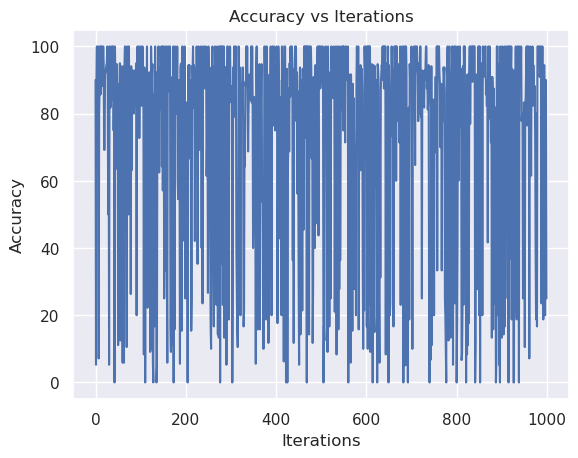

In [50]:
import matplotlib.pyplot as plt
iters = np.arange(1000)
plt.plot(iters, accs[1])
plt.title('Accuracy vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

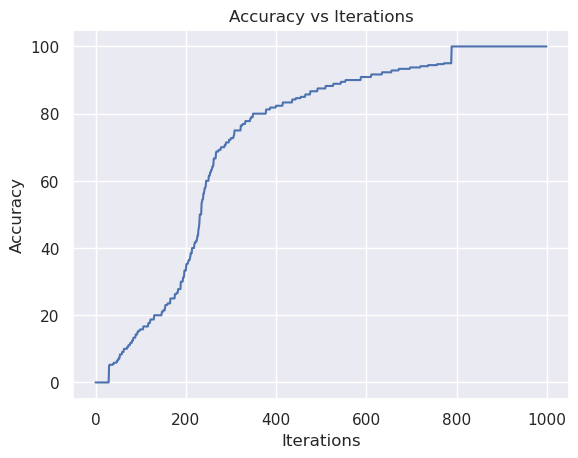

In [51]:
import matplotlib.pyplot as plt
iters = np.arange(1000)
accs[1].sort()
plt.plot(iters, accs[1])
plt.title('Accuracy vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()